In [1]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')

# for saving
import os

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

from src import setup
# setup.use_gpu()

In [2]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    order_rules,
    random_unitary,
    simulation)

from Scripts import simulation_CLI as cleo

In [3]:
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors 

import matplotlib.animation as animation
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '../..')
import h5py
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from src import ket as ket
from src import density_matrix as DM

In [4]:
#pick={therm,inhomov1,inhomov2,pure} pick one of these to properly store images with the correct labels
dataset_label = "inhomo"

In [5]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/greedy")

In [5]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/random")

In [7]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/landscape_maximizes")

In [8]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/mimic")

In [6]:
newdata1 = dict(h5py.File("../data/random/random.hdf5"))
newdata2 = dict(h5py.File("../data/greedy/greedy.hdf5"))
newdata3 = dict(h5py.File("../data/mimic/mimic.hdf5"))
newdata4 = dict(h5py.File("../data/landscape_maximizes/landscape_maximizes.hdf5"))

In [7]:
def get_pops(data, n_qubits, connectivity,update_rule):
    #dimension 0 is each trial
    #dimension 1 is each time step
    #dimension 2 is each qubit
    result = []
    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['pops'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        dat = np.array([np.array([dat[k][subkey][()] for subkey in sorted(dat[k])]) for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

def get_2_qbit_dms(data, n_qubits, connectivity,update_rule):
    basis = ket.canonical_basis(2)
    #dimension 0 is each trial
    #dimension 1 is each time step (recall that sampling step is 5 by default)
    #dimension 2 is qubit pair
    #dimension 3 and 4 is the 2 qubit density matrix
    result = []
    
    def to_tuple(string):
        tuple_elements = string.strip('()').split(',')
        return tuple(int(elem.strip()) for elem in tuple_elements)

    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['two_qubit_dms'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        
        dat = np.array([{to_tuple(subkey):DM.DensityMatrix(dat[k][subkey],basis) for subkey in sorted(dat[k])} for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

In [8]:
#Finds the pops data for each rule, all the trials
num=8 #insert num of qubits

In [9]:
pops_random_c2 = get_pops(newdata1, num, "c2_2local", "random")
pops_random_c4 = get_pops(newdata1, num, "c4_2local", "random")
pops_random_c5 = get_pops(newdata1, num, "c5_2local", "random")
pops_random_c6 = get_pops(newdata1, num, "c6_2local", "random")
pops_random_cn = get_pops(newdata1, num, "cN_2local", "random")

In [10]:
pops_greedy_c2 = get_pops(newdata2, num, "c2_2local", "greedy")
pops_greedy_c4 = get_pops(newdata2, num, "c4_2local", "greedy")
pops_greedy_c5 = get_pops(newdata2, num, "c5_2local", "greedy")
pops_greedy_c6 = get_pops(newdata2, num, "c6_2local", "greedy")
pops_greedy_cn = get_pops(newdata2, num, "cN_2local", "greedy")

In [11]:
pops_mimic_c2 = get_pops(newdata3, num, "c2_2local", "mimic")
pops_mimic_c4 = get_pops(newdata3, num, "c4_2local", "mimic")
pops_mimic_c5 = get_pops(newdata3, num, "c5_2local", "mimic")
pops_mimic_c6 = get_pops(newdata3, num, "c6_2local", "mimic")
pops_mimic_cn = get_pops(newdata3, num, "cN_2local", "mimic")

In [12]:
pops_landscape_maximizes_c2 = get_pops(newdata4, num, "c2_2local", "landscape_maximizes")
pops_landscape_maximizes_c4 = get_pops(newdata4, num, "c4_2local", "landscape_maximizes")
pops_landscape_maximizes_c5 = get_pops(newdata4, num, "c5_2local", "landscape_maximizes")
pops_landscape_maximizes_c6 = get_pops(newdata4, num, "c6_2local", "landscape_maximizes")
pops_landscape_maximizes_cn = get_pops(newdata4, num, "cN_2local", "landscape_maximizes")

In [ ]:
#Ensemble average across 100 data sets

In [13]:
def ensemble_averaged_one_point_measures_mean_std(datasets):
    # Assuming datasets is a list of 100 datasets, where each dataset is a 2D array of shape (100, N)
    # Stack datasets into a 3D array
    stacked_data = np.stack(datasets)  # Shape (100, 100, N)

    # Take the ensemble average along the first axis (averaging over all datasets)
    ensemble_average = np.mean(stacked_data, axis=0)  # Shape (100, N)

    # Calculate the standard deviation along the first axis
    ensemble_std = np.std(stacked_data, axis=0) 
    return (ensemble_average, ensemble_std)

In [43]:
pops_random_c2_ens_avg = ensemble_averaged_one_point_measures_mean_std(pops_random_c2)
pops_random_c4_ens_avg = ensemble_averaged_one_point_measures_mean_std(pops_random_c4)
pops_random_c5_ens_avg = ensemble_averaged_one_point_measures_mean_std(pops_random_c5)
pops_random_c6_ens_avg = ensemble_averaged_one_point_measures_mean_std(pops_random_c6)
pops_random_cn_ens_avg = ensemble_averaged_one_point_measures_mean_std(pops_random_cn)

In [44]:
pops_greedy_c2_ens_avg = ensemble_averaged_one_point_measures_mean_std(pops_greedy_c2)
pops_greedy_c4_ens_avg = ensemble_averaged_one_point_measures_mean_std(pops_greedy_c4)
pops_greedy_c5_ens_avg = ensemble_averaged_one_point_measures_mean_std(pops_greedy_c5)
pops_greedy_c6_ens_avg = ensemble_averaged_one_point_measures_mean_std(pops_greedy_c6)
pops_greedy_cn_ens_avg = ensemble_averaged_one_point_measures_mean_std(pops_greedy_cn)

In [45]:
pops_mimic_c2_ens_avg = ensemble_averaged_one_point_measures_mean_std(pops_mimic_c2)
pops_mimic_c4_ens_avg = ensemble_averaged_one_point_measures_mean_std(pops_mimic_c4)
pops_mimic_c5_ens_avg = ensemble_averaged_one_point_measures_mean_std(pops_mimic_c5)
pops_mimic_c6_ens_avg = ensemble_averaged_one_point_measures_mean_std(pops_mimic_c6)
pops_mimic_cn_ens_avg = ensemble_averaged_one_point_measures_mean_std(pops_mimic_cn)

In [46]:
pops_landscape_maximizes_c2_ens_avg = ensemble_averaged_one_point_measures_mean_std(pops_landscape_maximizes_c2)
pops_landscape_maximizes_c4_ens_avg = ensemble_averaged_one_point_measures_mean_std(pops_landscape_maximizes_c4)
pops_landscape_maximizes_c5_ens_avg = ensemble_averaged_one_point_measures_mean_std(pops_landscape_maximizes_c5)
pops_landscape_maximizes_c6_ens_avg = ensemble_averaged_one_point_measures_mean_std(pops_landscape_maximizes_c6)
pops_landscape_maximizes_cn_ens_avg = ensemble_averaged_one_point_measures_mean_std(pops_landscape_maximizes_cn)

In [32]:
def extractable_work_of_one_trial(pops,trial):
    return np.array([measure.extractable_work_of_each_qubit_from_pops(p) for p in pops[trial]])

In [20]:
def extractable_work_of_all_trials(pops):
    ext_work_all = []
    for trial in range(100):
        ext_work_all.append(extractable_work_of_one_trial(pops,trial))
    return ext_work_all

In [ ]:
#Ext work for all trials of a particular rule and connectivity

In [33]:
ext_work_all_random_c2 = extractable_work_of_all_trials(pops_random_c2)
ext_work_all_random_c4 = extractable_work_of_all_trials(pops_random_c4)
ext_work_all_random_c5 = extractable_work_of_all_trials(pops_random_c5)
ext_work_all_random_c6 = extractable_work_of_all_trials(pops_random_c6)
ext_work_all_random_cn = extractable_work_of_all_trials(pops_random_cn)

In [34]:
ext_work_all_greedy_c2 = extractable_work_of_all_trials(pops_greedy_c2)
ext_work_all_greedy_c4 = extractable_work_of_all_trials(pops_greedy_c4)
ext_work_all_greedy_c5 = extractable_work_of_all_trials(pops_greedy_c5)
ext_work_all_greedy_c6 = extractable_work_of_all_trials(pops_greedy_c6)
ext_work_all_greedy_cn = extractable_work_of_all_trials(pops_greedy_cn)

In [35]:
ext_work_all_mimic_c2 = extractable_work_of_all_trials(pops_mimic_c2)
ext_work_all_mimic_c4 = extractable_work_of_all_trials(pops_mimic_c4)
ext_work_all_mimic_c5 = extractable_work_of_all_trials(pops_mimic_c5)
ext_work_all_mimic_c6 = extractable_work_of_all_trials(pops_mimic_c6)
ext_work_all_mimic_cn = extractable_work_of_all_trials(pops_mimic_cn)

In [36]:
ext_work_all_landscape_maximizes_c2 = extractable_work_of_all_trials(pops_landscape_maximizes_c2)
ext_work_all_landscape_maximizes_c4 = extractable_work_of_all_trials(pops_landscape_maximizes_c4)
ext_work_all_landscape_maximizes_c5 = extractable_work_of_all_trials(pops_landscape_maximizes_c5)
ext_work_all_landscape_maximizes_c6 = extractable_work_of_all_trials(pops_landscape_maximizes_c6)
ext_work_all_landscape_maximizes_cn = extractable_work_of_all_trials(pops_landscape_maximizes_cn)

In [ ]:
#Extractable work of the ensembled average trial per connectivity per rule W(<p>) where p is the landscape

In [47]:
ext_work_of_ens_avg_random_c2 = extractable_work_of_one_trial(pops_random_c2_ens_avg,0)
ext_work_of_ens_avg_random_c4 = extractable_work_of_one_trial(pops_random_c4_ens_avg,0)
ext_work_of_ens_avg_random_c5 = extractable_work_of_one_trial(pops_random_c5_ens_avg,0)
ext_work_of_ens_avg_random_c6 = extractable_work_of_one_trial(pops_random_c6_ens_avg,0)
ext_work_of_ens_avg_random_cn = extractable_work_of_one_trial(pops_random_cn_ens_avg,0)

In [61]:
ext_work_of_ens_avg_greedy_c2 = extractable_work_of_one_trial(pops_random_c2_ens_avg,0)
ext_work_of_ens_avg_greedy_c4 = extractable_work_of_one_trial(pops_random_c4_ens_avg,0)
ext_work_of_ens_avg_greedy_c5 = extractable_work_of_one_trial(pops_random_c5_ens_avg,0)
ext_work_of_ens_avg_greedy_c6 = extractable_work_of_one_trial(pops_random_c6_ens_avg,0)
ext_work_of_ens_avg_greedy_cn = extractable_work_of_one_trial(pops_random_cn_ens_avg,0)

In [49]:
ext_work_of_ens_avg_mimic_c2 = extractable_work_of_one_trial(pops_mimic_c2_ens_avg,0)
ext_work_of_ens_avg_mimic_c4 = extractable_work_of_one_trial(pops_mimic_c4_ens_avg,0)
ext_work_of_ens_avg_mimic_c5 = extractable_work_of_one_trial(pops_mimic_c5_ens_avg,0)
ext_work_of_ens_avg_mimic_c6 = extractable_work_of_one_trial(pops_mimic_c6_ens_avg,0)
ext_work_of_ens_avg_mimic_cn = extractable_work_of_one_trial(pops_mimic_cn_ens_avg,0)

In [50]:
ext_work_of_ens_avg_landscape_maximizes_c2 = extractable_work_of_one_trial(pops_landscape_maximizes_c2_ens_avg,0)
ext_work_of_ens_avg_landscape_maximizes_c4 = extractable_work_of_one_trial(pops_landscape_maximizes_c4_ens_avg,0)
ext_work_of_ens_avg_landscape_maximizes_c5 = extractable_work_of_one_trial(pops_landscape_maximizes_c5_ens_avg,0)
ext_work_of_ens_avg_landscape_maximizes_c6 = extractable_work_of_one_trial(pops_landscape_maximizes_c6_ens_avg,0)
ext_work_of_ens_avg_landscape_maximizes_cn = extractable_work_of_one_trial(pops_landscape_maximizes_cn_ens_avg,0)

In [ ]:
#Ensemble average of extractable work computed for each trial per connectivity per rule <W(p)> where p is the landscape

In [51]:
ens_avg_ext_work_random_c2 = ensemble_averaged_one_point_measures_mean_std(ext_work_all_random_c2)[0]
ens_avg_ext_work_random_c4 = ensemble_averaged_one_point_measures_mean_std(ext_work_all_random_c4)[0]
ens_avg_ext_work_random_c5 = ensemble_averaged_one_point_measures_mean_std(ext_work_all_random_c5)[0]
ens_avg_ext_work_random_c6 = ensemble_averaged_one_point_measures_mean_std(ext_work_all_random_c6)[0]
ens_avg_ext_work_random_cn = ensemble_averaged_one_point_measures_mean_std(ext_work_all_random_cn)[0]

In [52]:
ens_avg_ext_work_greedy_c2 = ensemble_averaged_one_point_measures_mean_std(ext_work_all_greedy_c2)[0]
ens_avg_ext_work_greedy_c4 = ensemble_averaged_one_point_measures_mean_std(ext_work_all_greedy_c4)[0]
ens_avg_ext_work_greedy_c5 = ensemble_averaged_one_point_measures_mean_std(ext_work_all_greedy_c5)[0]
ens_avg_ext_work_greedy_c6 = ensemble_averaged_one_point_measures_mean_std(ext_work_all_greedy_c6)[0]
ens_avg_ext_work_greedy_cn = ensemble_averaged_one_point_measures_mean_std(ext_work_all_greedy_cn)[0]

In [53]:
ens_avg_ext_work_mimic_c2 = ensemble_averaged_one_point_measures_mean_std(ext_work_all_mimic_c2)[0]
ens_avg_ext_work_mimic_c4 = ensemble_averaged_one_point_measures_mean_std(ext_work_all_mimic_c4)[0]
ens_avg_ext_work_mimic_c5 = ensemble_averaged_one_point_measures_mean_std(ext_work_all_mimic_c5)[0]
ens_avg_ext_work_mimic_c6 = ensemble_averaged_one_point_measures_mean_std(ext_work_all_mimic_c6)[0]
ens_avg_ext_work_mimic_cn = ensemble_averaged_one_point_measures_mean_std(ext_work_all_mimic_cn)[0]

In [54]:
ens_avg_ext_work_landscape_maximizes_c2 = ensemble_averaged_one_point_measures_mean_std(ext_work_all_landscape_maximizes_c2)[0]
ens_avg_ext_work_landscape_maximizes_c4 = ensemble_averaged_one_point_measures_mean_std(ext_work_all_landscape_maximizes_c4)[0]
ens_avg_ext_work_landscape_maximizes_c5 = ensemble_averaged_one_point_measures_mean_std(ext_work_all_landscape_maximizes_c5)[0]
ens_avg_ext_work_landscape_maximizes_c6 = ensemble_averaged_one_point_measures_mean_std(ext_work_all_landscape_maximizes_c6)[0]
ens_avg_ext_work_landscape_maximizes_cn = ensemble_averaged_one_point_measures_mean_std(ext_work_all_landscape_maximizes_cn)[0]

In [ ]:
#Plot ext work per qubit as a function of time 

In [ ]:
#Ensembled average ext work <W(p)>

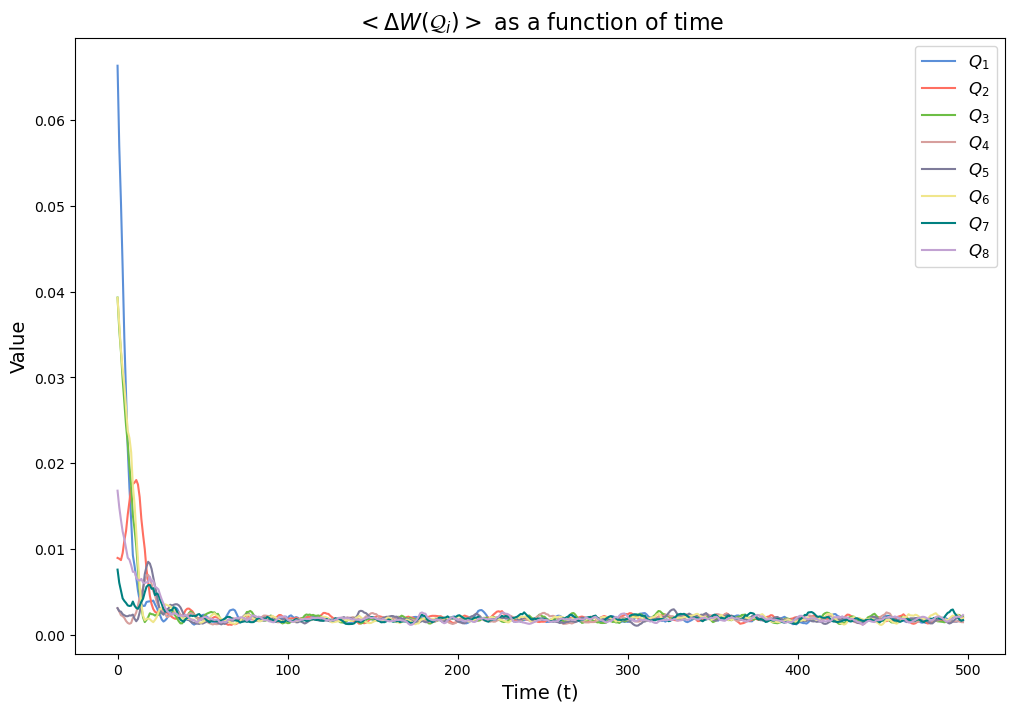

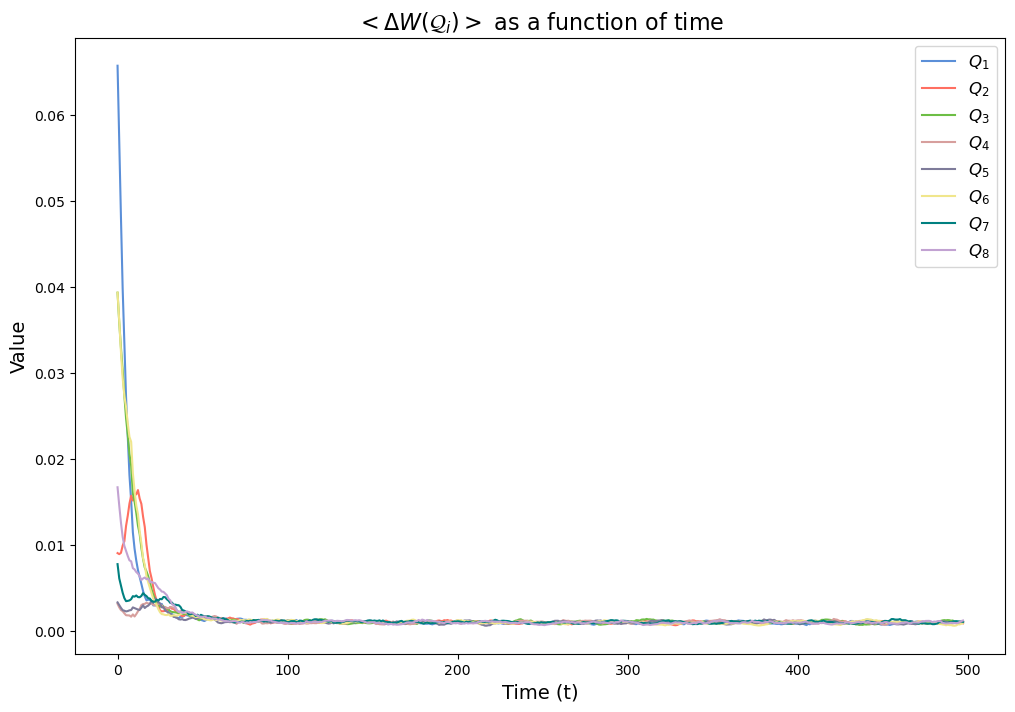

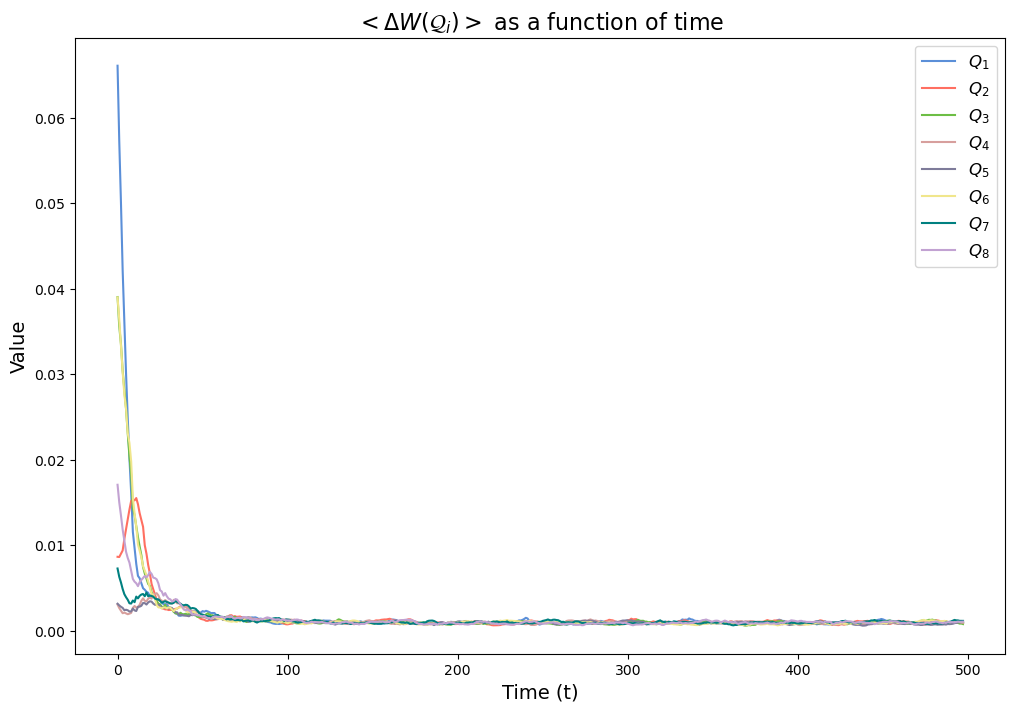

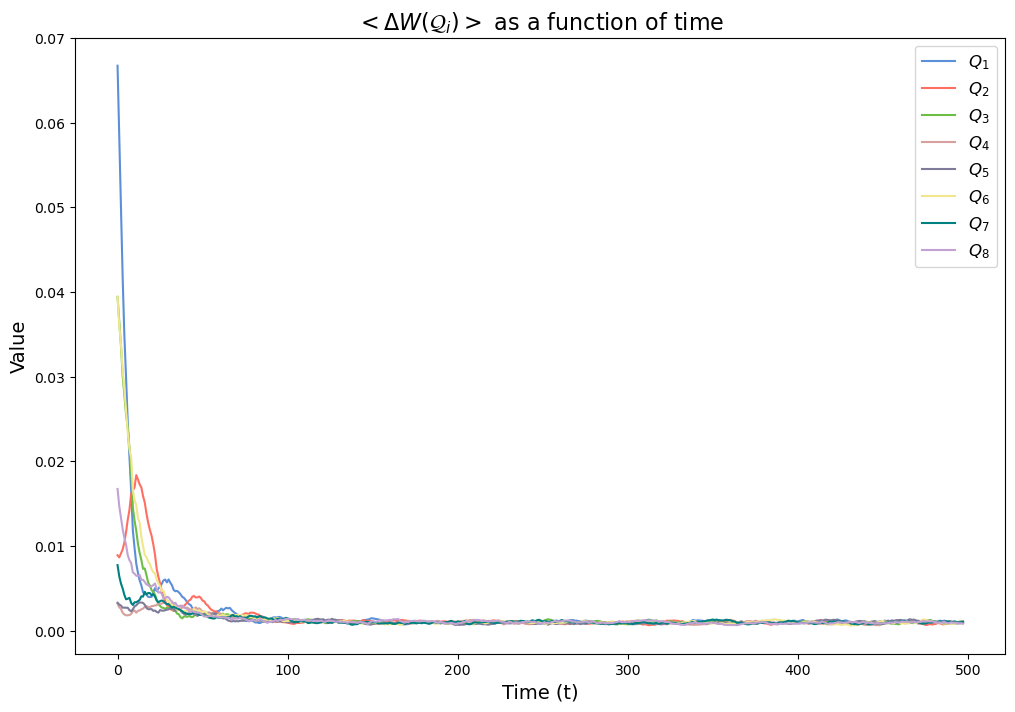

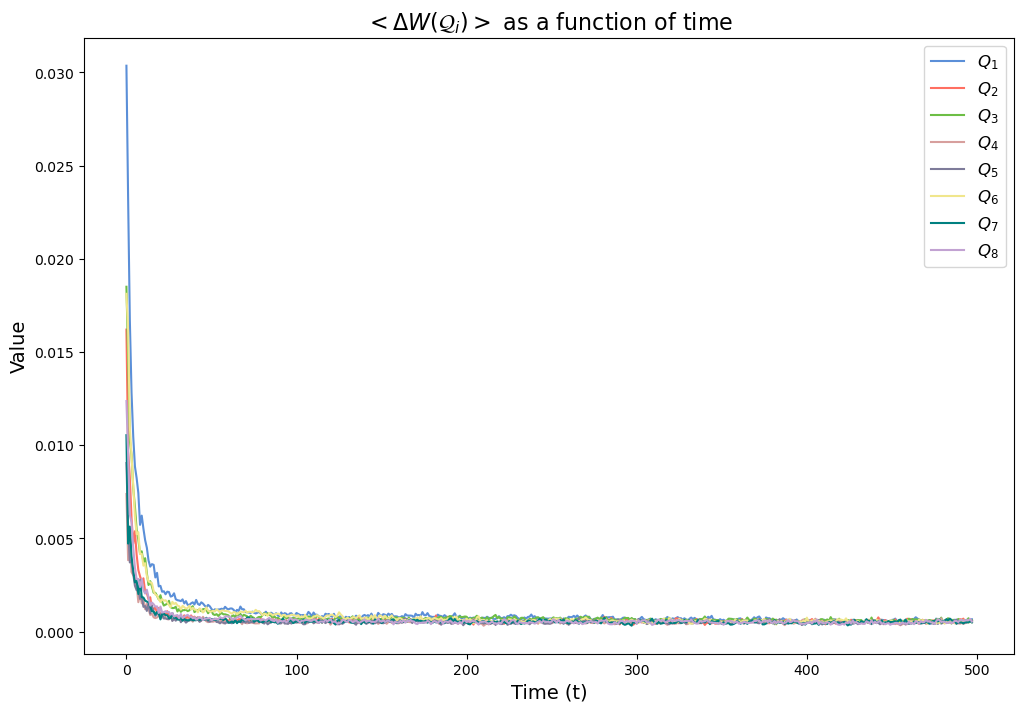

In [55]:
#random
# Define a list of colors (you can choose any color names or hex codes)
#for 8Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2']
#for 10 Q
colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF']
#for 12 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C']
#for 14Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C', '#C4BEB5', '#8E7BBA']
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[ens_avg_ext_work_random_c2,ens_avg_ext_work_random_c4,ens_avg_ext_work_random_c5,ens_avg_ext_work_random_c6,ens_avg_ext_work_random_cn]


for data,conn in zip(datas, dataset_names):
    num_time_steps = len(data)-2  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    
    data=np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]
    
    plt.figure(figsize=(12, 8))
    #change this when analyzing pure dataset
    #plt.axhline(y=ytherm10, color='r', linestyle='--', label=f'y = {ytherm10}')

    # Plot each number as a function of t with specified colors
    for i, y_values in enumerate(data_transposed):
        color = colors[i % len(colors)]  # Cycle through the color list
        plt.plot(t, y_values, label=f'$Q_{i+1}$', color=color)
    
    # Add labels and legend
    plt.xlabel('Time (t)',fontsize=14)
    plt.ylabel('Value',fontsize=14)
    plt.title('$<\Delta W(\mathcal{Q}_i) >$ as a function of time',fontsize=16)
    plt.legend(fontsize=12)
    
    # Show the plot
    plt.savefig(f'Ensemble averaged extractable work of network {num}q_conn_{conn}_rule_R1_{dataset_label}.pdf', format='pdf', bbox_inches='tight')

    plt.show()

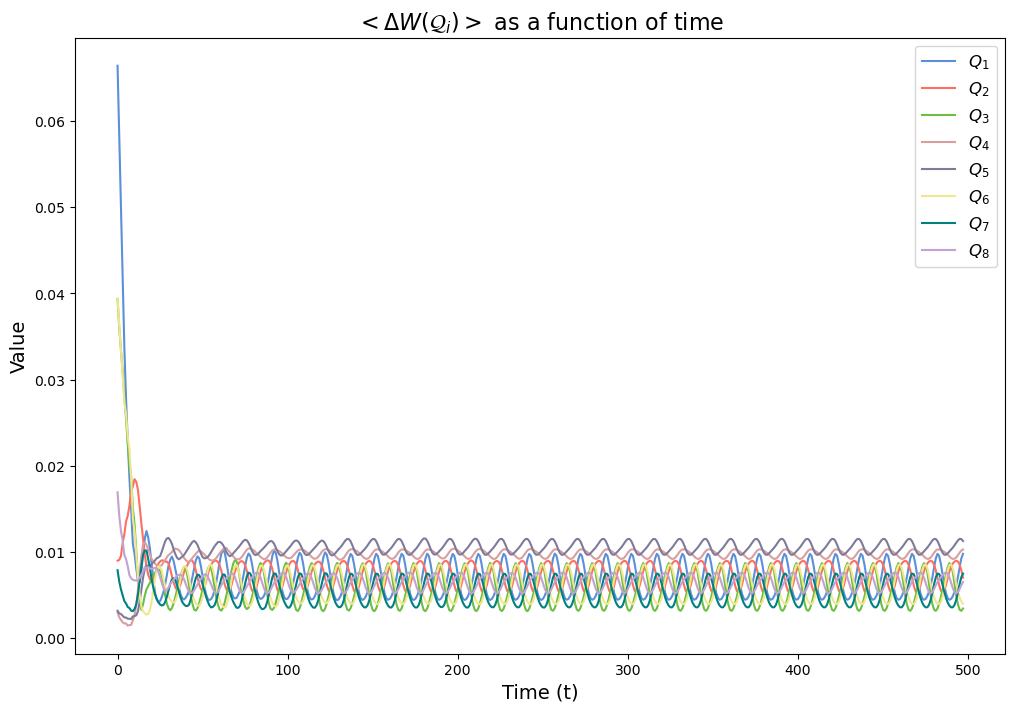

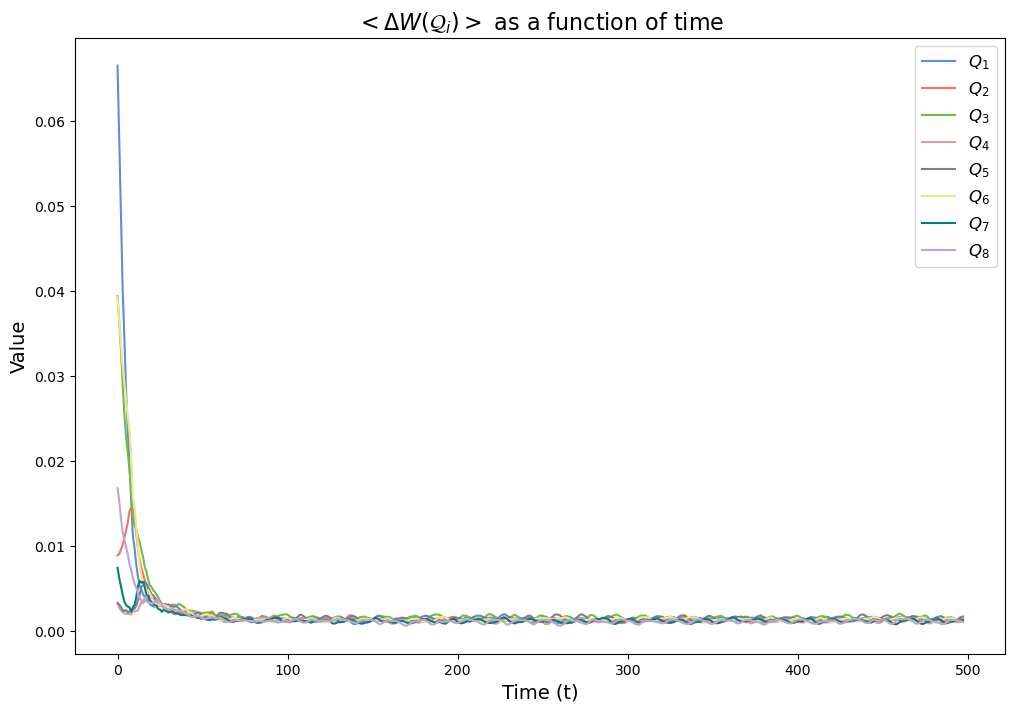

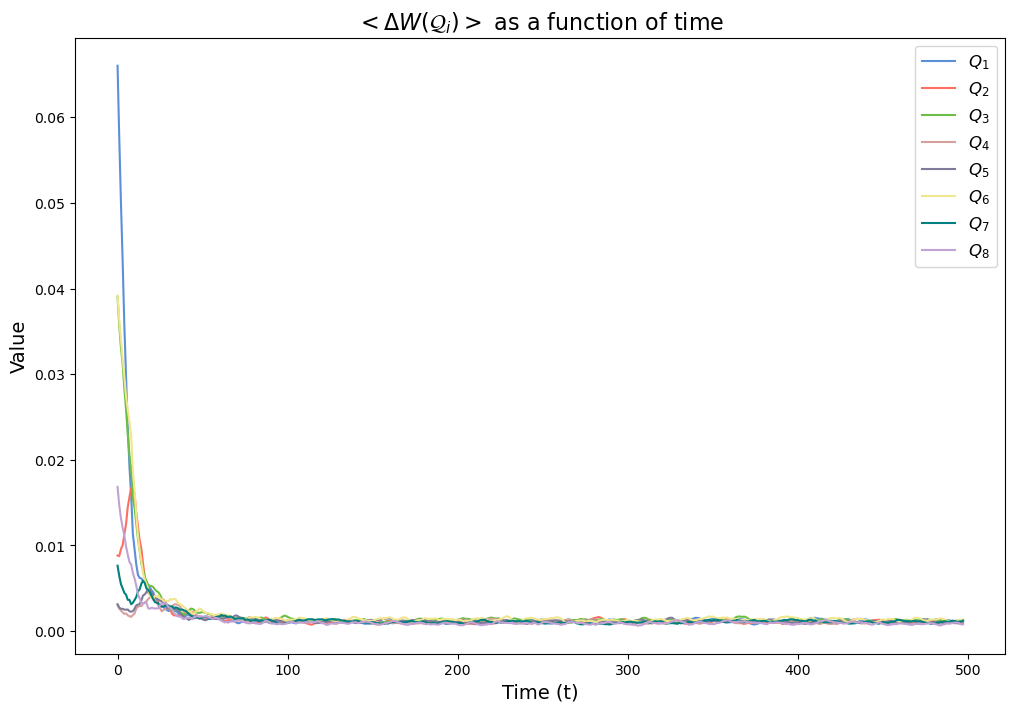

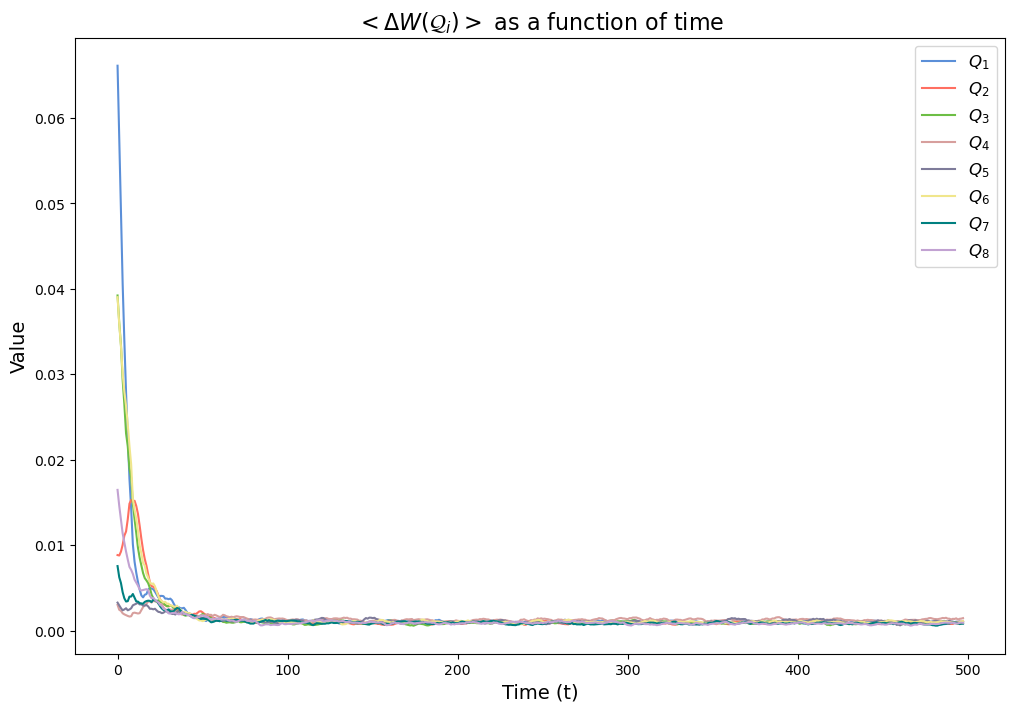

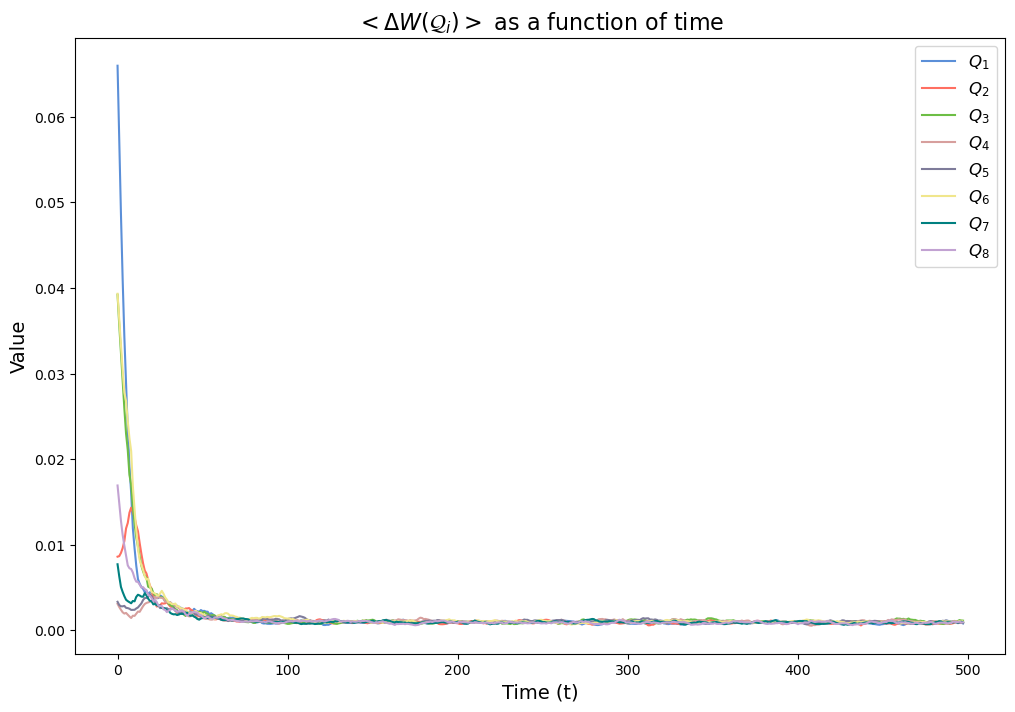

In [56]:
#greedy
# Define a list of colors (you can choose any color names or hex codes)
#for 8Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2']
#for 10 Q
colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF']
#for 12 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C']
#for 14Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C', '#C4BEB5', '#8E7BBA']
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[ens_avg_ext_work_greedy_c2,ens_avg_ext_work_greedy_c4,ens_avg_ext_work_greedy_c5,ens_avg_ext_work_greedy_c6,ens_avg_ext_work_greedy_cn]


for data,conn in zip(datas, dataset_names):
    num_time_steps = len(data)-2  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    
    data=np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]
    
    plt.figure(figsize=(12, 8))
    #change this when analyzing pure dataset
    #plt.axhline(y=ytherm10, color='r', linestyle='--', label=f'y = {ytherm10}')

    # Plot each number as a function of t with specified colors
    for i, y_values in enumerate(data_transposed):
        color = colors[i % len(colors)]  # Cycle through the color list
        plt.plot(t, y_values, label=f'$Q_{i+1}$', color=color)
    
    # Add labels and legend
    plt.xlabel('Time (t)',fontsize=14)
    plt.ylabel('Value',fontsize=14)
    plt.title('$<\Delta W(\mathcal{Q}_i) >$ as a function of time',fontsize=16)
    plt.legend(fontsize=12)
    
    # Show the plot
    plt.savefig(f'Ensemble averaged extractable work of network {num}q_conn_{conn}_rule_R2_{dataset_label}.pdf', format='pdf', bbox_inches='tight')

    plt.show()

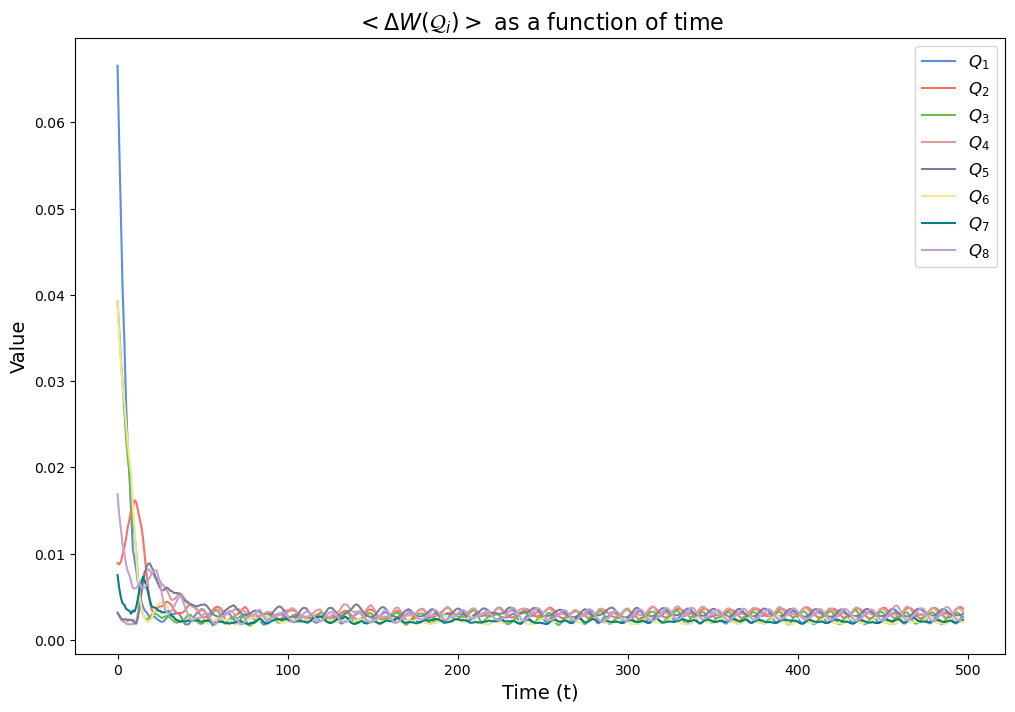

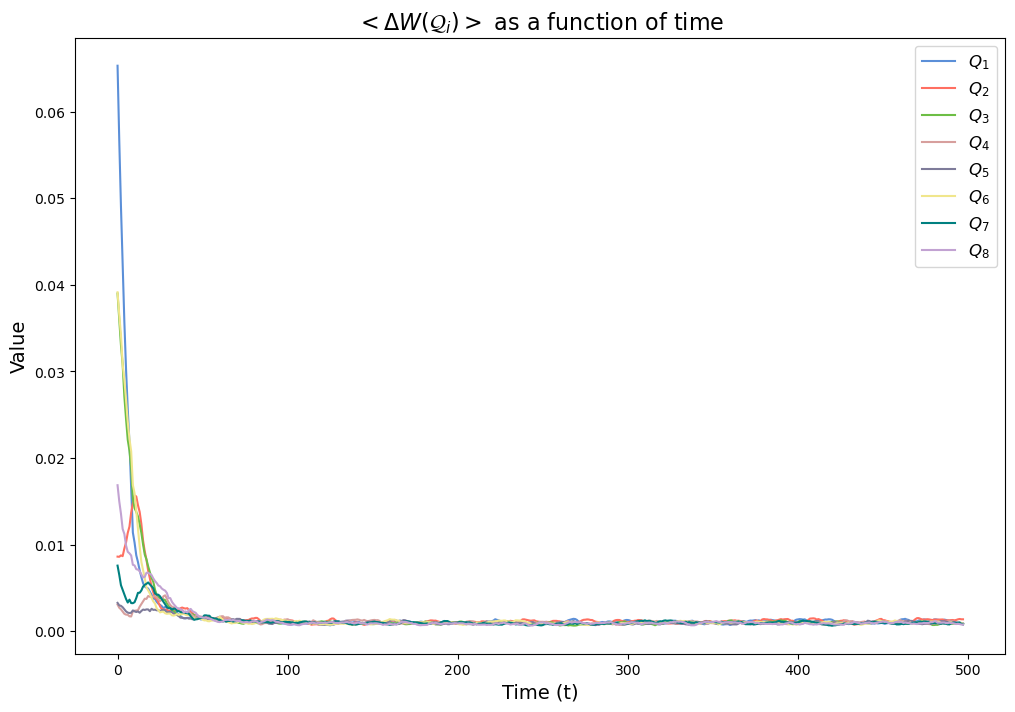

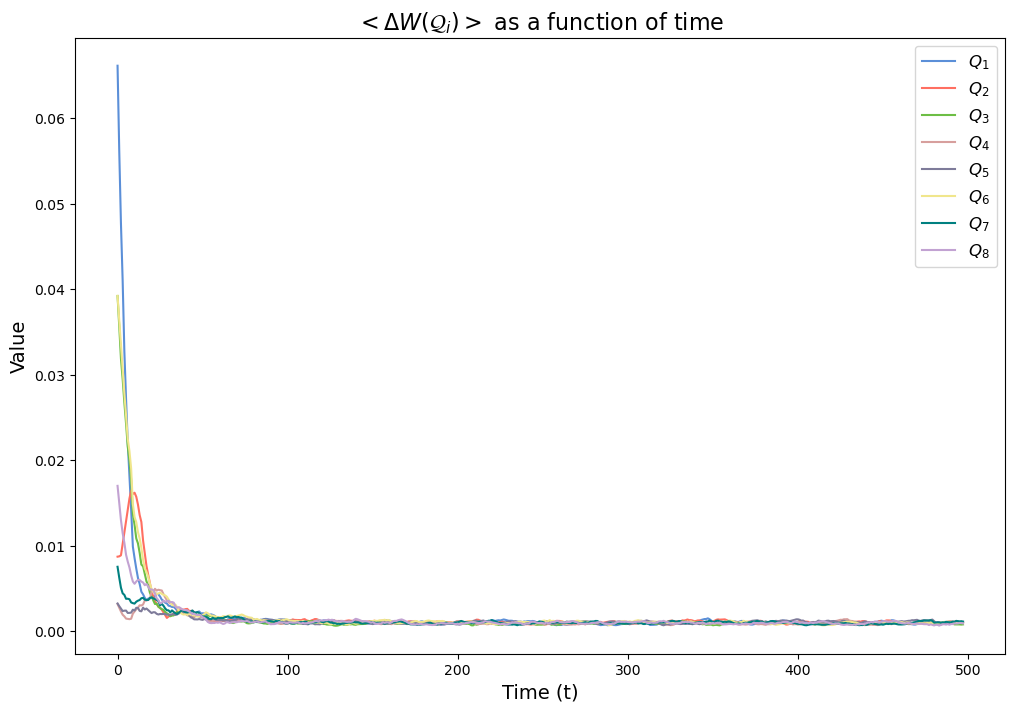

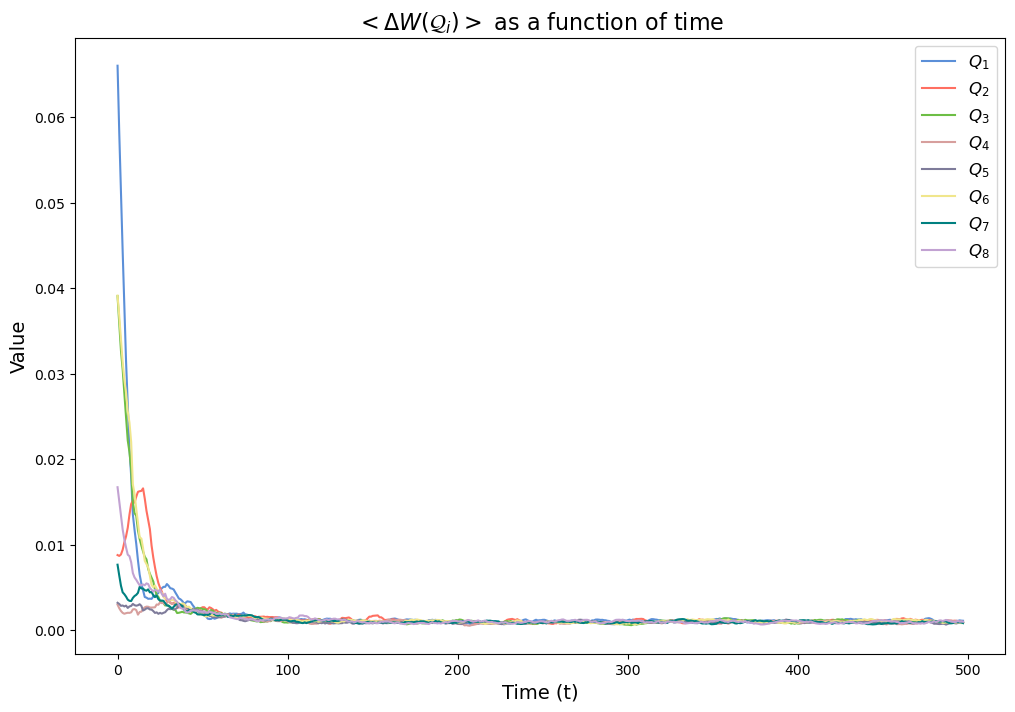

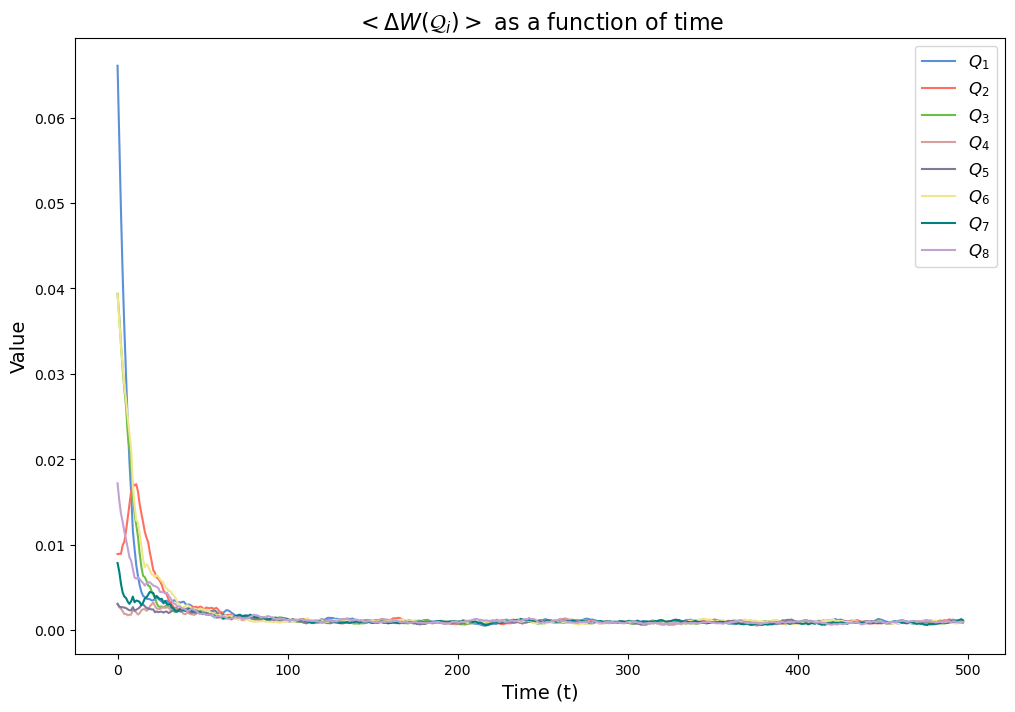

In [57]:
#mimic
# Define a list of colors (you can choose any color names or hex codes)
#for 8Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2']
#for 10 Q
colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF']
#for 12 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C']
#for 14Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C', '#C4BEB5', '#8E7BBA']
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[ens_avg_ext_work_mimic_c2,ens_avg_ext_work_mimic_c4,ens_avg_ext_work_mimic_c5,ens_avg_ext_work_mimic_c6,ens_avg_ext_work_mimic_cn]


for data,conn in zip(datas, dataset_names):
    num_time_steps = len(data)-2  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    
    data=np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]
    
    plt.figure(figsize=(12, 8))
    #change this when analyzing pure dataset
    #plt.axhline(y=ytherm10, color='r', linestyle='--', label=f'y = {ytherm10}')

    # Plot each number as a function of t with specified colors
    for i, y_values in enumerate(data_transposed):
        color = colors[i % len(colors)]  # Cycle through the color list
        plt.plot(t, y_values, label=f'$Q_{i+1}$', color=color)
    
    # Add labels and legend
    plt.xlabel('Time (t)',fontsize=14)
    plt.ylabel('Value',fontsize=14)
    plt.title('$<\Delta W(\mathcal{Q}_i) >$ as a function of time',fontsize=16)
    plt.legend(fontsize=12)
    
    # Show the plot
    plt.savefig(f'Ensemble averaged extractable work of network {num}q_conn_{conn}_rule_R3_{dataset_label}.pdf', format='pdf', bbox_inches='tight')

    plt.show()

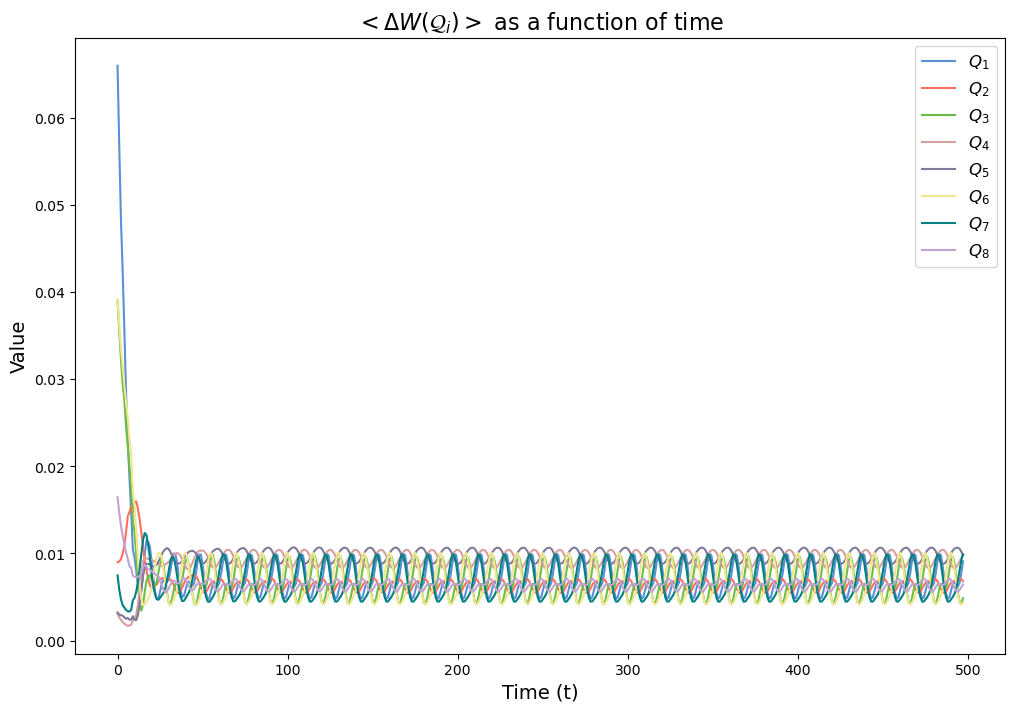

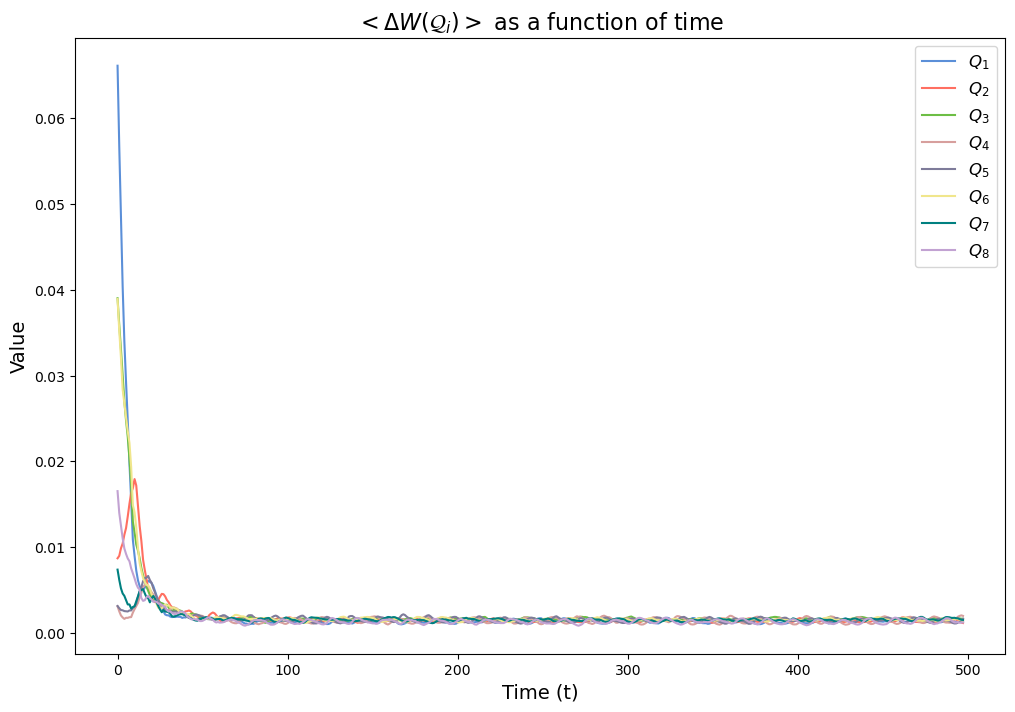

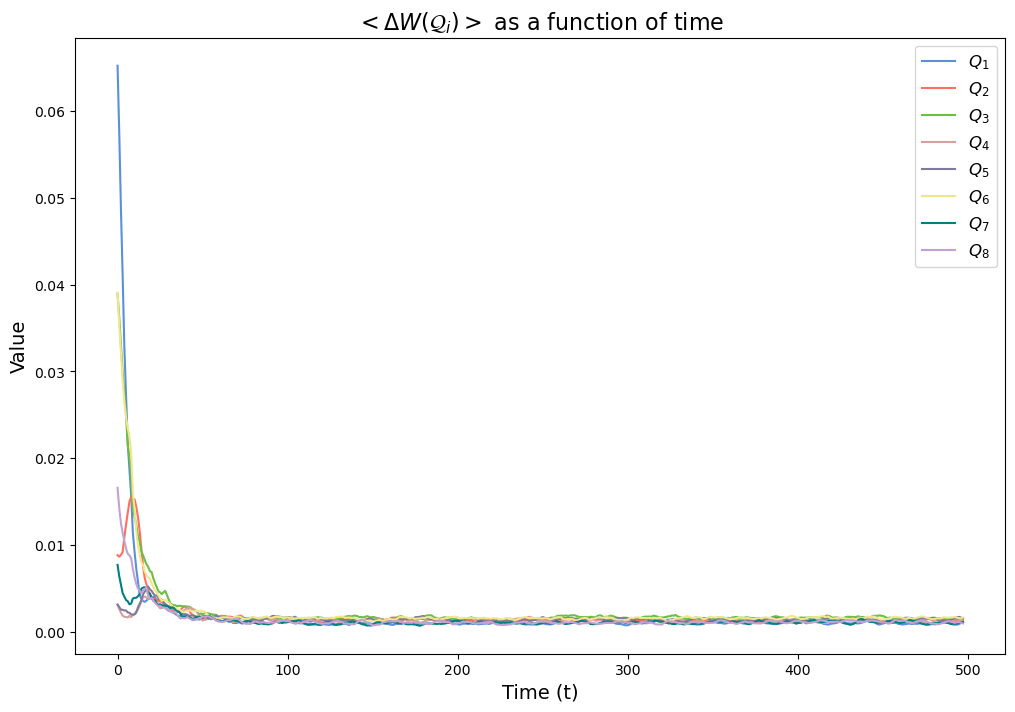

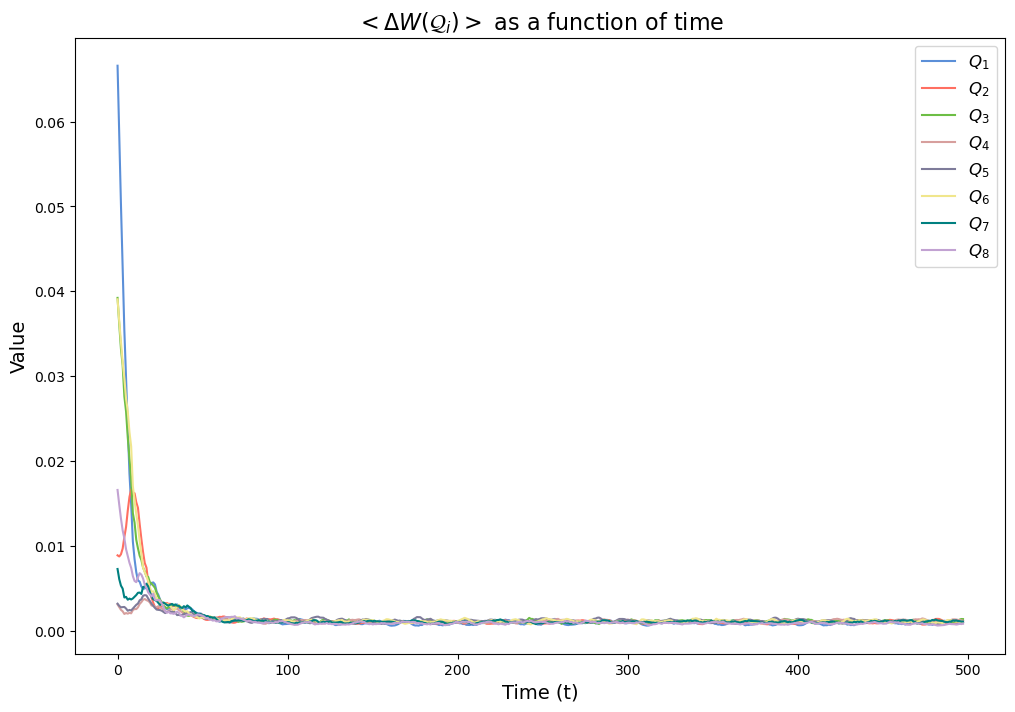

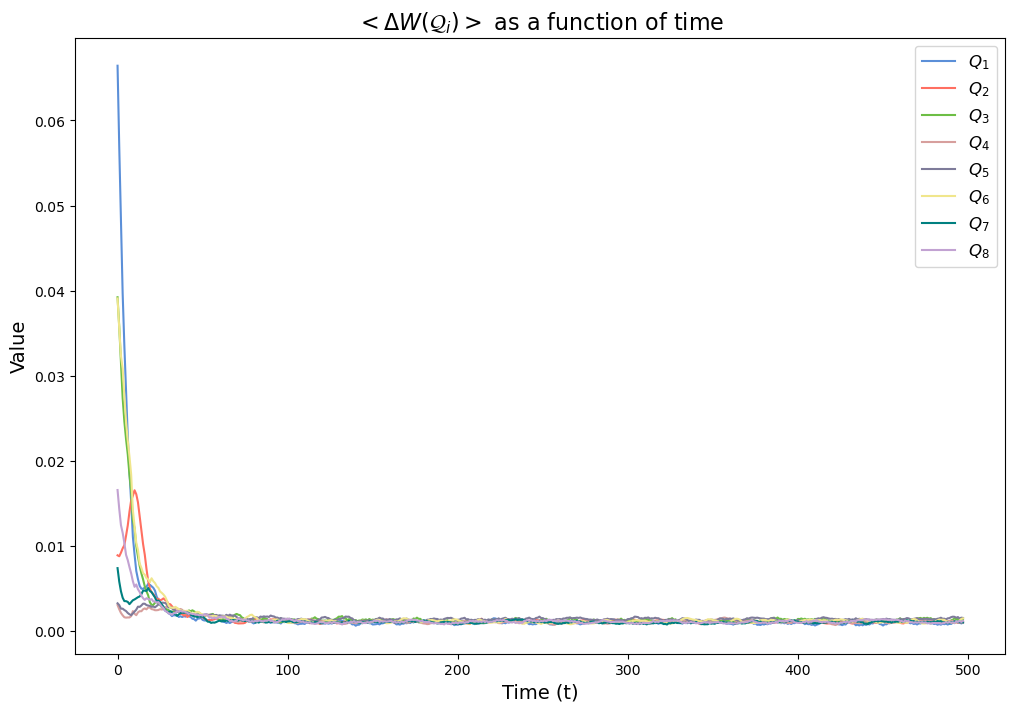

In [58]:
#landmax
# Define a list of colors (you can choose any color names or hex codes)
#for 8Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2']
#for 10 Q
colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF']
#for 12 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C']
#for 14Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C', '#C4BEB5', '#8E7BBA']
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[ens_avg_ext_work_landscape_maximizes_c2,ens_avg_ext_work_landscape_maximizes_c4,ens_avg_ext_work_landscape_maximizes_c5,ens_avg_ext_work_landscape_maximizes_c6,ens_avg_ext_work_landscape_maximizes_cn]


for data,conn in zip(datas, dataset_names):
    num_time_steps = len(data)-2  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    
    data=np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]
    
    plt.figure(figsize=(12, 8))
    #change this when analyzing pure dataset
    #plt.axhline(y=ytherm10, color='r', linestyle='--', label=f'y = {ytherm10}')

    # Plot each number as a function of t with specified colors
    for i, y_values in enumerate(data_transposed):
        color = colors[i % len(colors)]  # Cycle through the color list
        plt.plot(t, y_values, label=f'$Q_{i+1}$', color=color)
    
    # Add labels and legend
    plt.xlabel('Time (t)',fontsize=14)
    plt.ylabel('Value',fontsize=14)
    plt.title('$<\Delta W(\mathcal{Q}_i) >$ as a function of time',fontsize=16)
    plt.legend(fontsize=12)
    
    # Show the plot
    plt.savefig(f'Ensemble averaged extractable work of network {num}q_conn_{conn}_rule_R4_{dataset_label}.pdf', format='pdf', bbox_inches='tight')

    plt.show()

In [ ]:
#Ext Work of ensemble average landscape pops

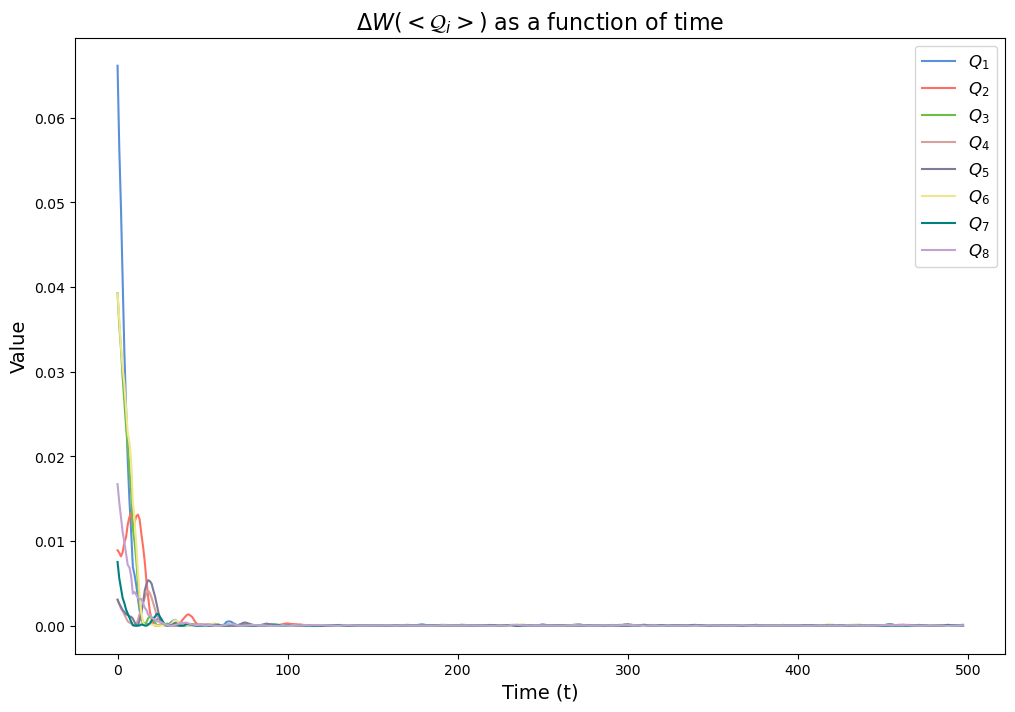

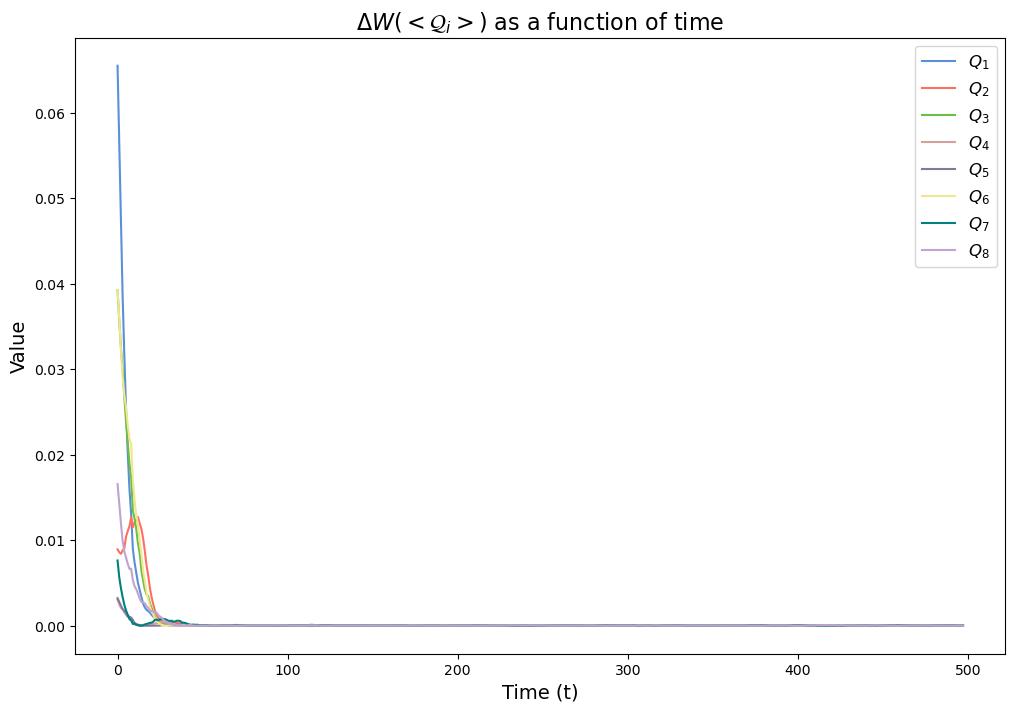

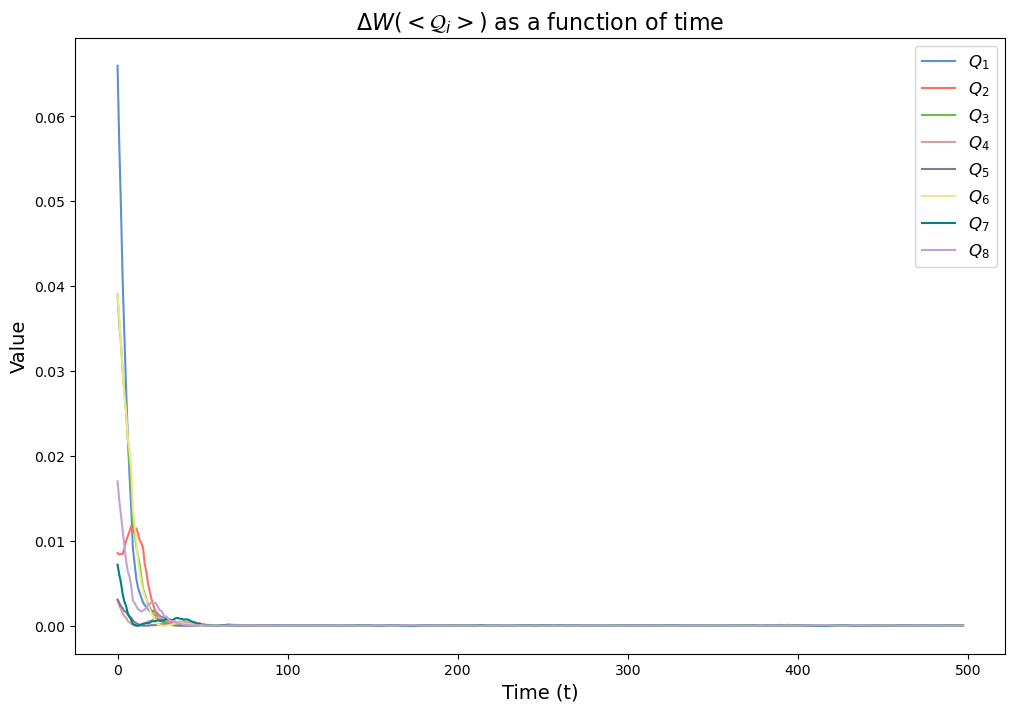

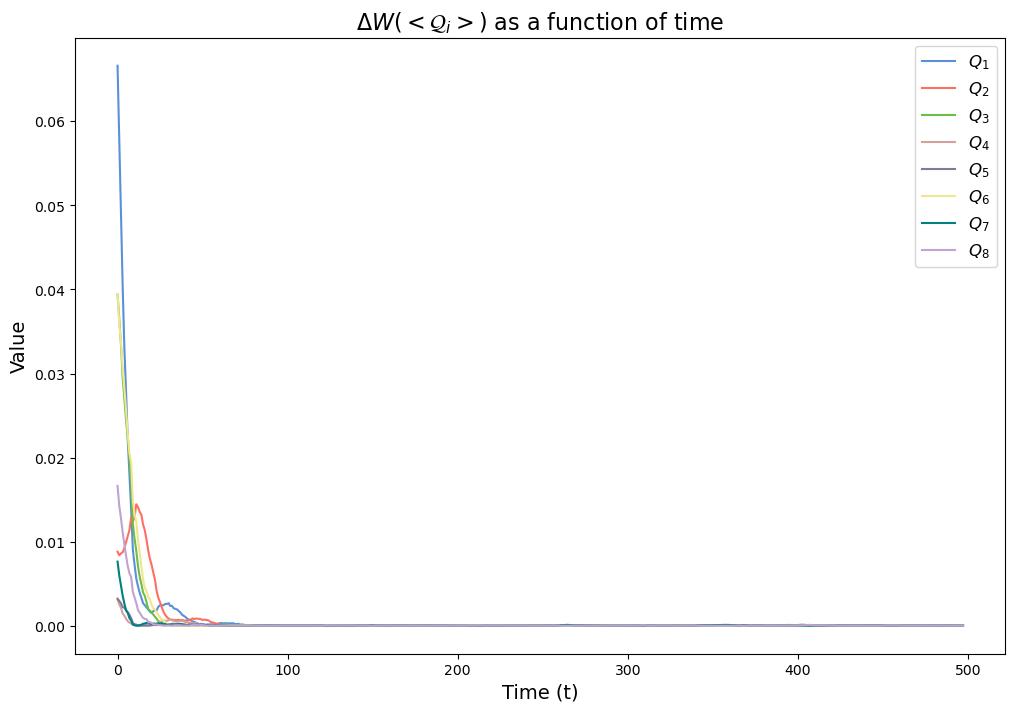

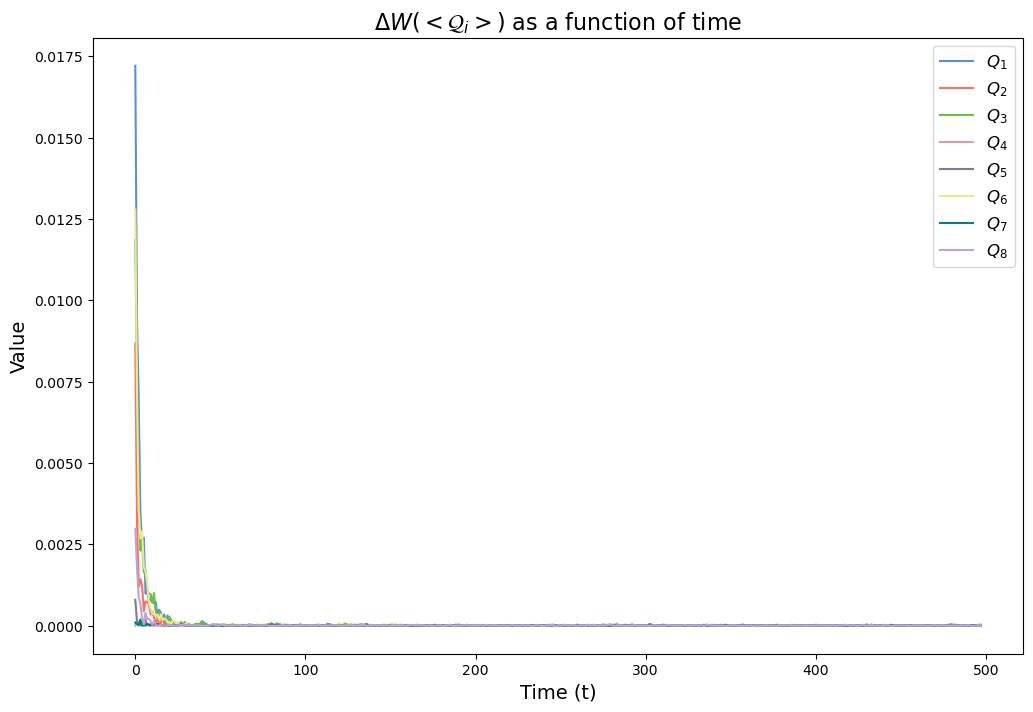

In [59]:
#random
# Define a list of colors (you can choose any color names or hex codes)
#for 8Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2']
#for 10 Q
colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF']
#for 12 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C']
#for 14Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C', '#C4BEB5', '#8E7BBA']
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[ext_work_of_ens_avg_random_c2,ext_work_of_ens_avg_random_c4,ext_work_of_ens_avg_random_c5,ext_work_of_ens_avg_random_c6,ext_work_of_ens_avg_random_cn]


for data,conn in zip(datas, dataset_names):
    num_time_steps = len(data)-2  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    
    data=np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]
    
    plt.figure(figsize=(12, 8))
    #change this when analyzing pure dataset
    #plt.axhline(y=ytherm10, color='r', linestyle='--', label=f'y = {ytherm10}')

    # Plot each number as a function of t with specified colors
    for i, y_values in enumerate(data_transposed):
        color = colors[i % len(colors)]  # Cycle through the color list
        plt.plot(t, y_values, label=f'$Q_{i+1}$', color=color)
    
    # Add labels and legend
    plt.xlabel('Time (t)',fontsize=14)
    plt.ylabel('Value',fontsize=14)
    plt.title('$\Delta W(<\mathcal{Q}_i >)$ as a function of time',fontsize=16)
    plt.legend(fontsize=12)
    
    # Show the plot
    plt.savefig(f'Extractable work of ensemble averaged network {num}q_conn_{conn}_rule_R1_{dataset_label}.pdf', format='pdf', bbox_inches='tight')

    plt.show()

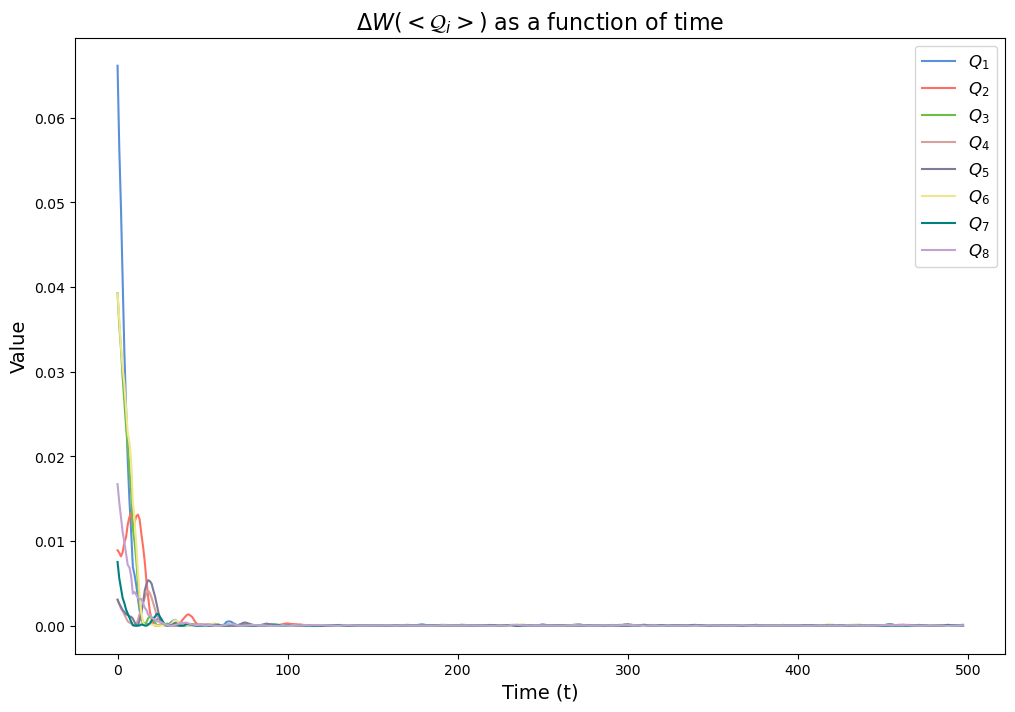

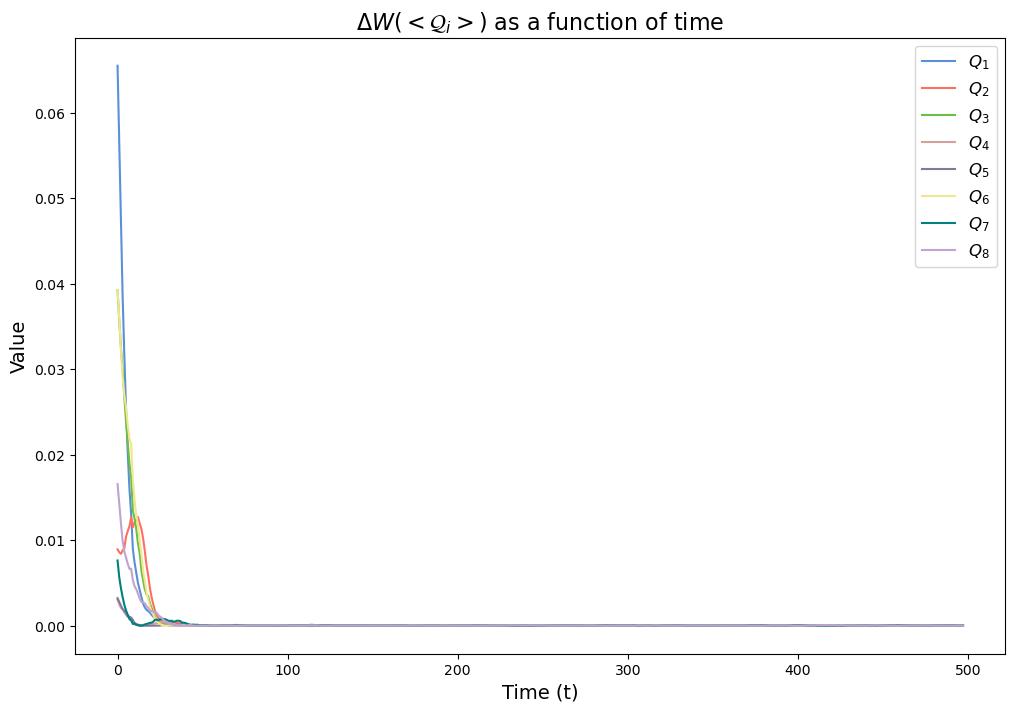

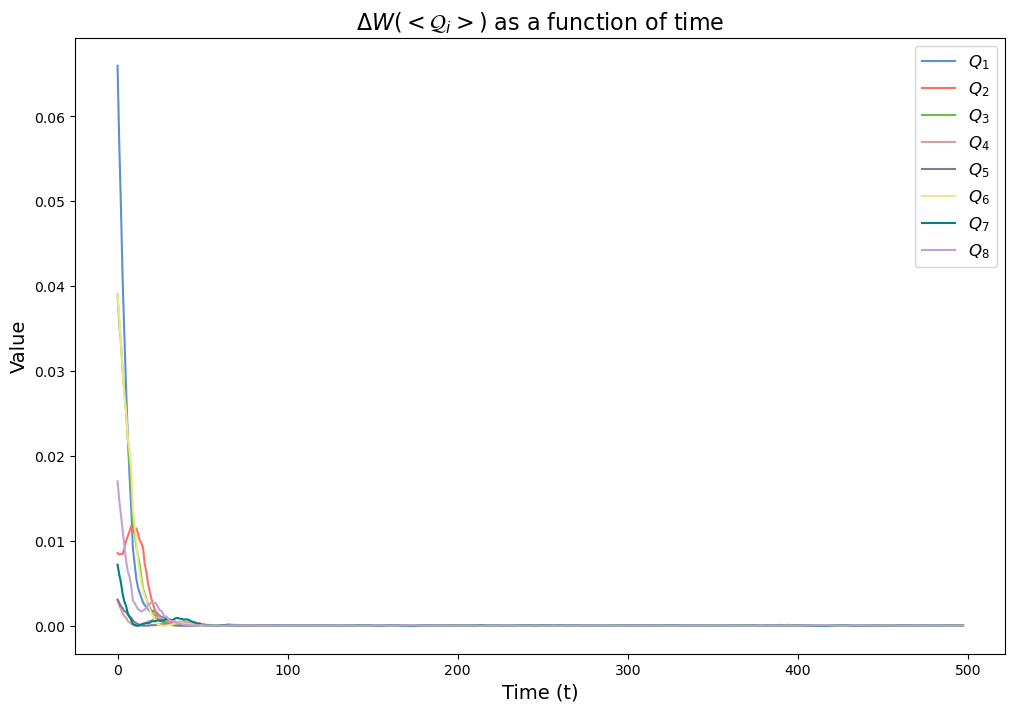

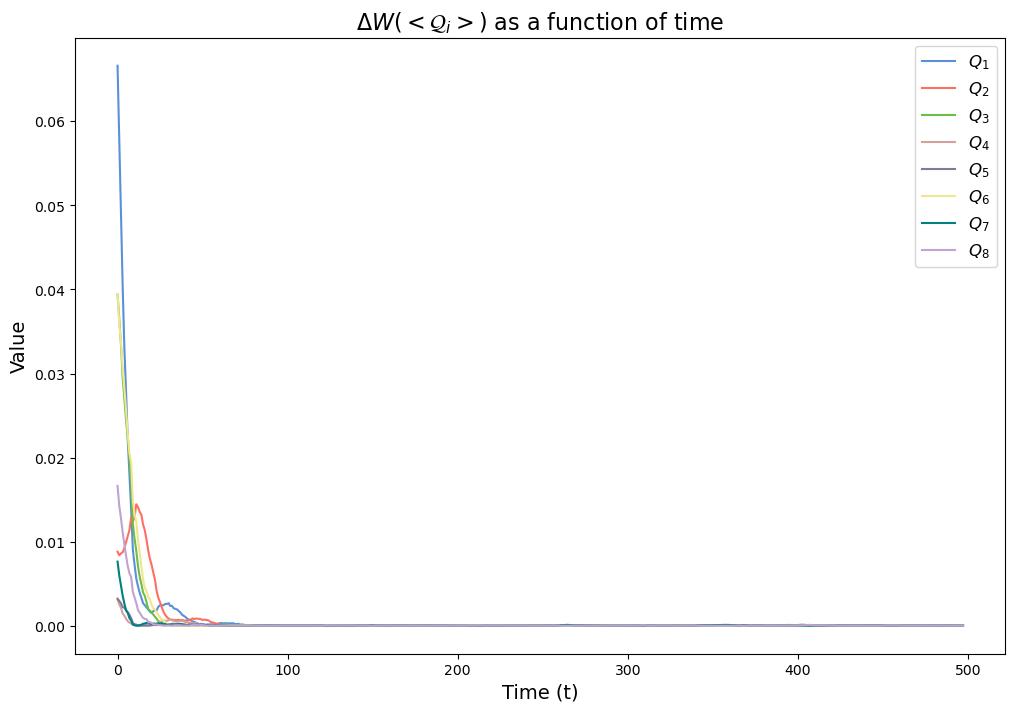

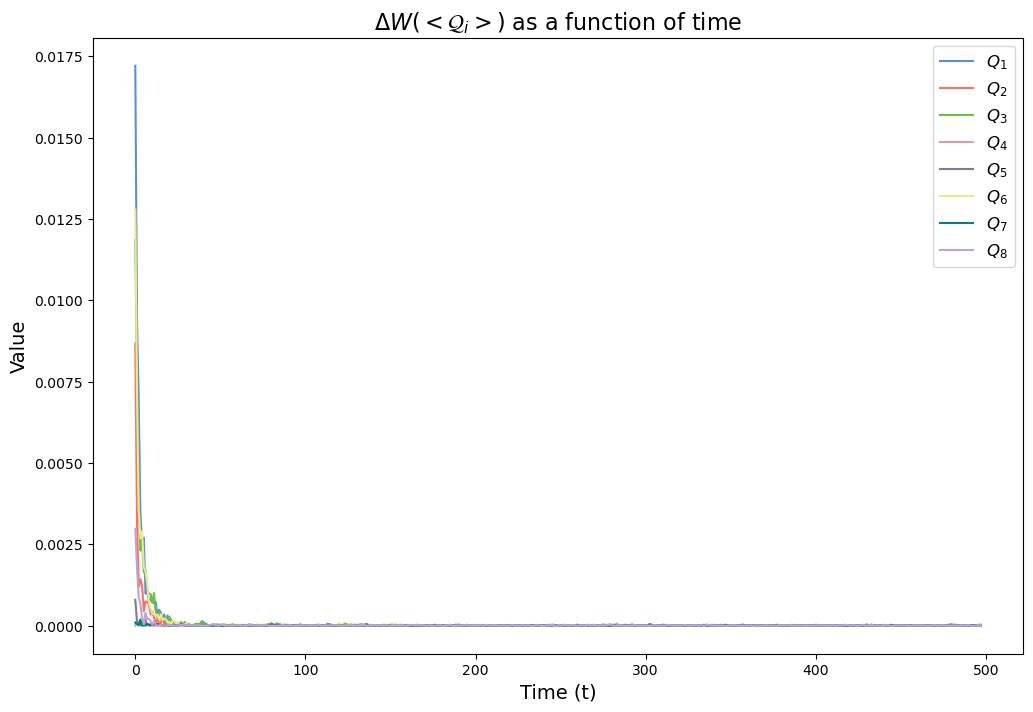

In [62]:
#greedy
# Define a list of colors (you can choose any color names or hex codes)
#for 8Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2']
#for 10 Q
colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF']
#for 12 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C']
#for 14Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C', '#C4BEB5', '#8E7BBA']
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[ext_work_of_ens_avg_greedy_c2,ext_work_of_ens_avg_greedy_c4,ext_work_of_ens_avg_greedy_c5,ext_work_of_ens_avg_greedy_c6,ext_work_of_ens_avg_greedy_cn]


for data,conn in zip(datas, dataset_names):
    num_time_steps = len(data)-2  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    
    data=np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]
    
    plt.figure(figsize=(12, 8))
    #change this when analyzing pure dataset
    #plt.axhline(y=ytherm10, color='r', linestyle='--', label=f'y = {ytherm10}')

    # Plot each number as a function of t with specified colors
    for i, y_values in enumerate(data_transposed):
        color = colors[i % len(colors)]  # Cycle through the color list
        plt.plot(t, y_values, label=f'$Q_{i+1}$', color=color)
    
    # Add labels and legend
    plt.xlabel('Time (t)',fontsize=14)
    plt.ylabel('Value',fontsize=14)
    plt.title('$\Delta W(<\mathcal{Q}_i >)$ as a function of time',fontsize=16)
    plt.legend(fontsize=12)
    
    # Show the plot
    plt.savefig(f'Extractable work of ensemble averaged network {num}q_conn_{conn}_rule_R2_{dataset_label}.pdf', format='pdf', bbox_inches='tight')

    plt.show()

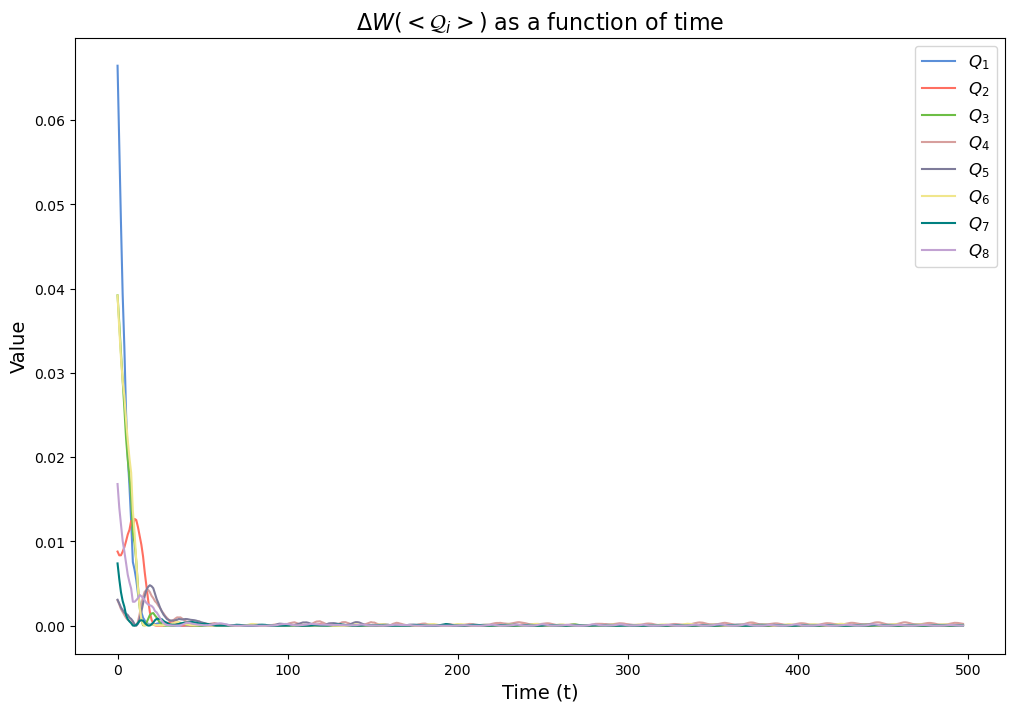

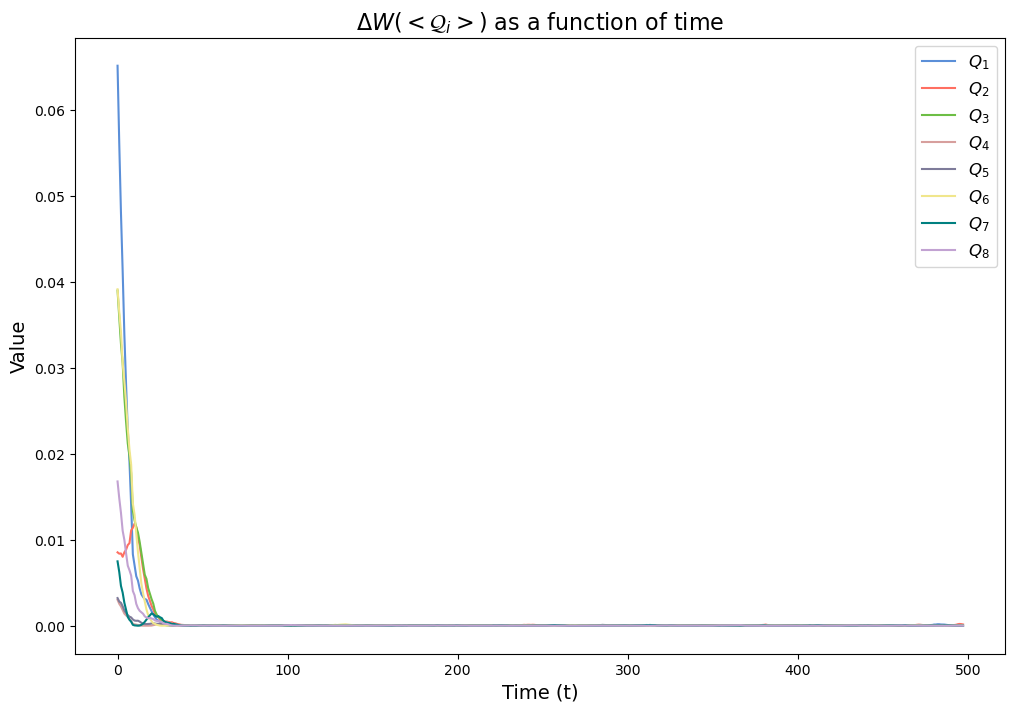

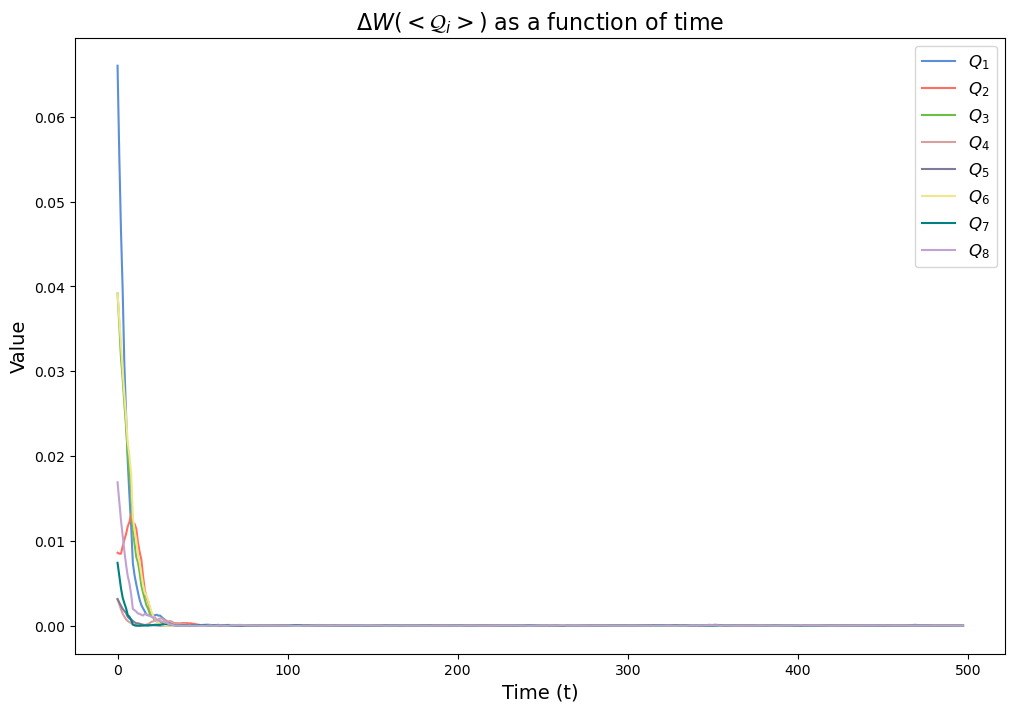

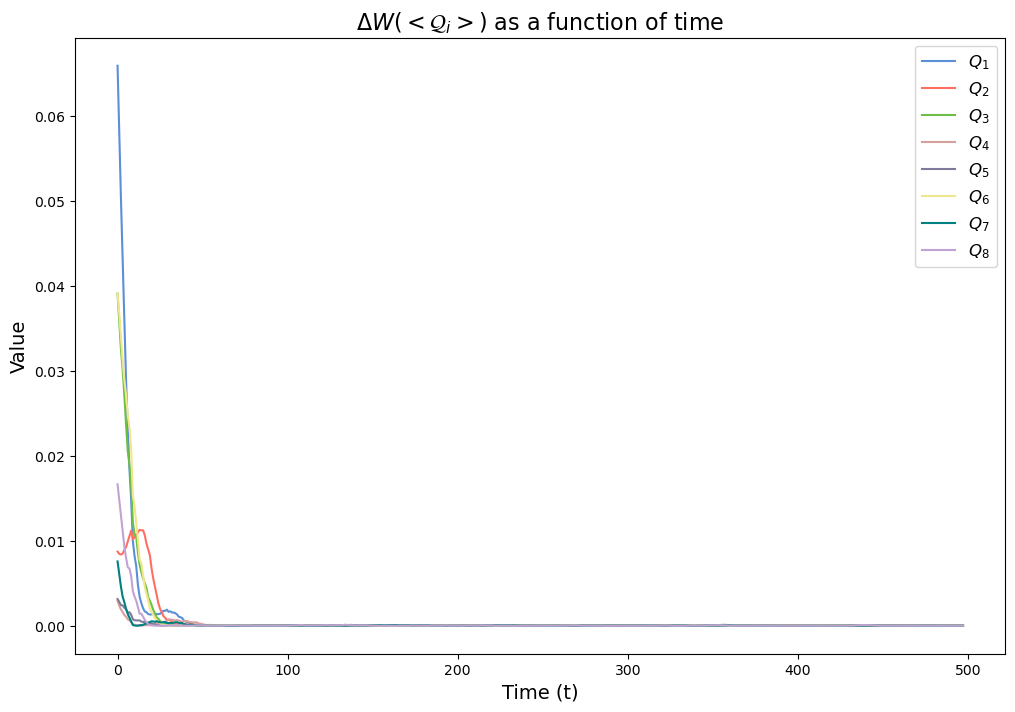

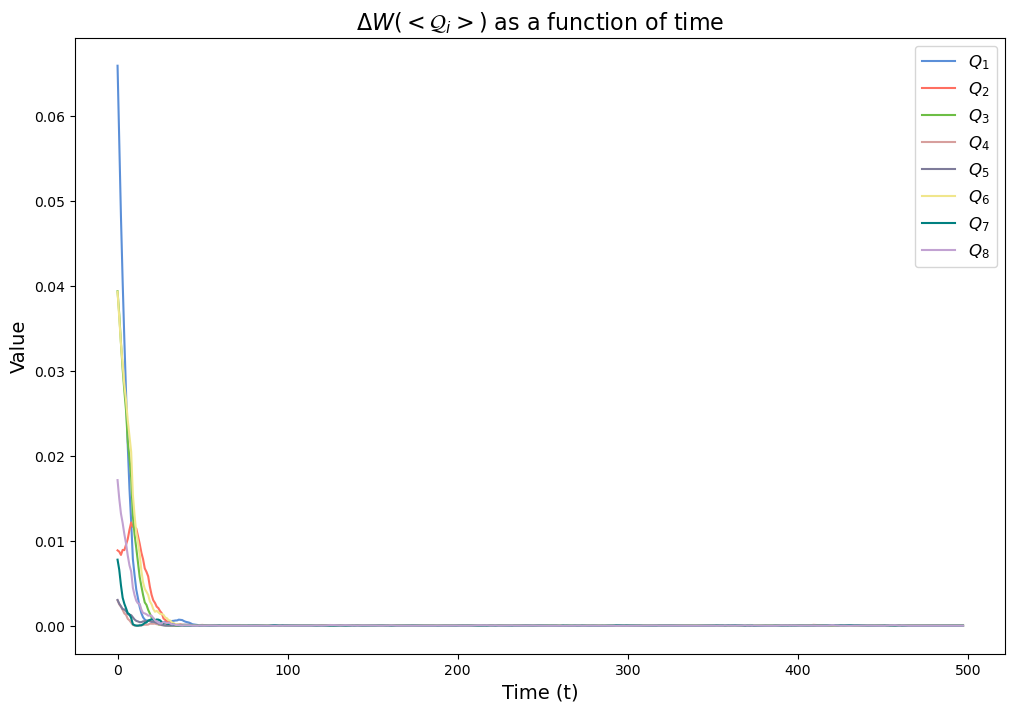

In [63]:
#mimic
# Define a list of colors (you can choose any color names or hex codes)
#for 8Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2']
#for 10 Q
colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF']
#for 12 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C']
#for 14Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C', '#C4BEB5', '#8E7BBA']
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[ext_work_of_ens_avg_mimic_c2,ext_work_of_ens_avg_mimic_c4,ext_work_of_ens_avg_mimic_c5,ext_work_of_ens_avg_mimic_c6,ext_work_of_ens_avg_mimic_cn]


for data,conn in zip(datas, dataset_names):
    num_time_steps = len(data)-2  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    
    data=np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]
    
    plt.figure(figsize=(12, 8))
    #change this when analyzing pure dataset
    #plt.axhline(y=ytherm10, color='r', linestyle='--', label=f'y = {ytherm10}')

    # Plot each number as a function of t with specified colors
    for i, y_values in enumerate(data_transposed):
        color = colors[i % len(colors)]  # Cycle through the color list
        plt.plot(t, y_values, label=f'$Q_{i+1}$', color=color)
    
    # Add labels and legend
    plt.xlabel('Time (t)',fontsize=14)
    plt.ylabel('Value',fontsize=14)
    plt.title('$\Delta W(<\mathcal{Q}_i >)$ as a function of time',fontsize=16)
    plt.legend(fontsize=12)
    
    # Show the plot
    plt.savefig(f'Extractable work of ensemble averaged network {num}q_conn_{conn}_rule_R3_{dataset_label}.pdf', format='pdf', bbox_inches='tight')

    plt.show()

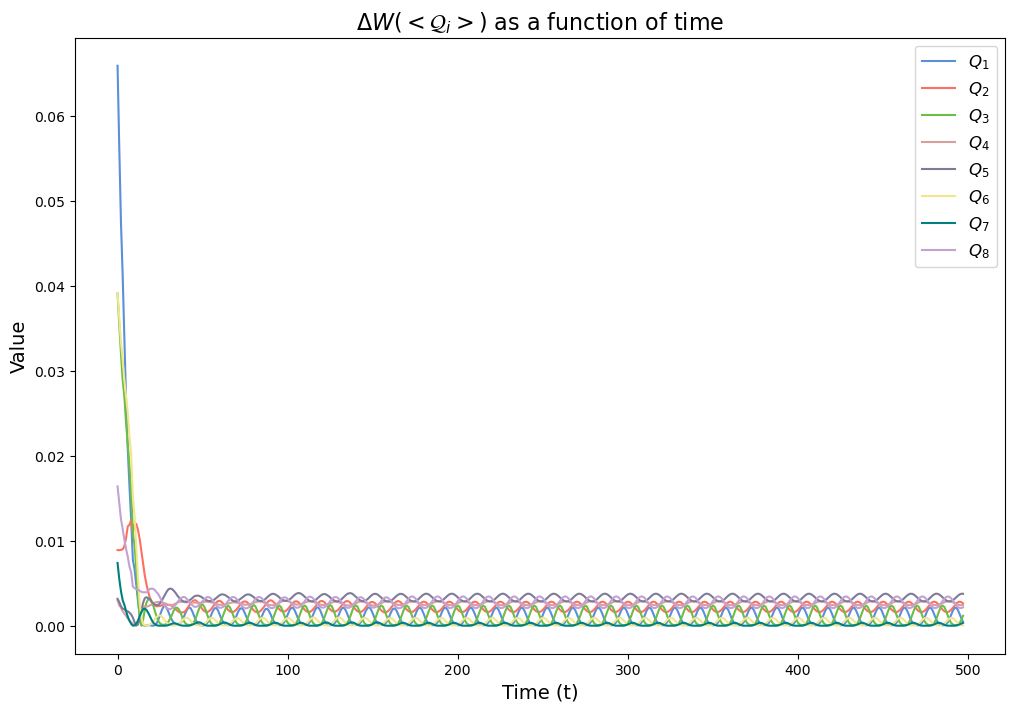

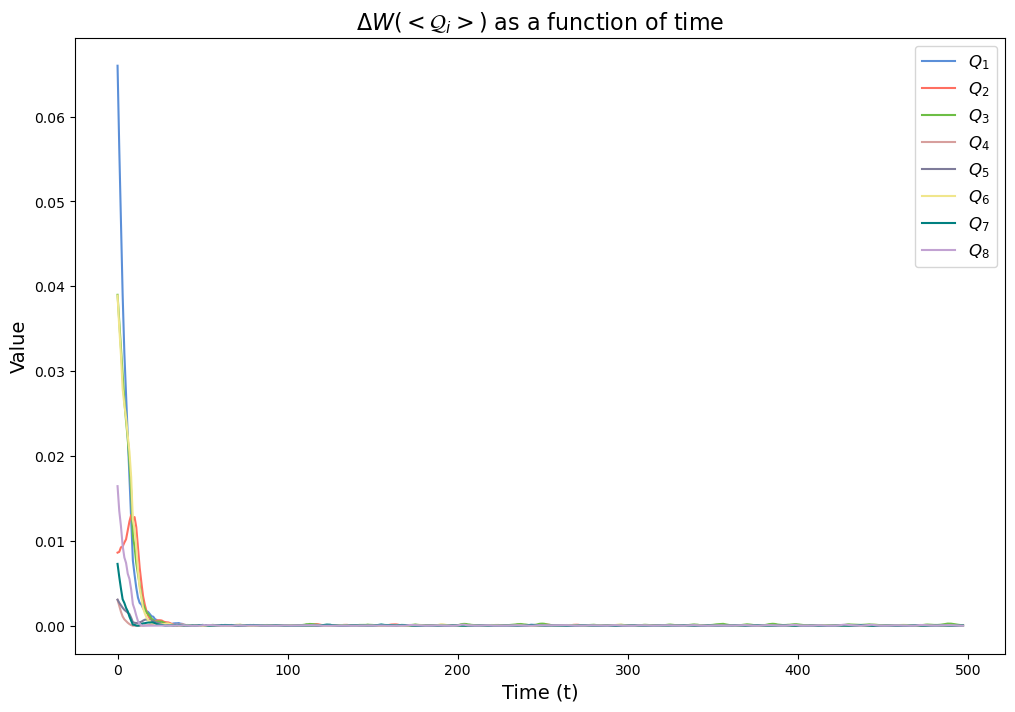

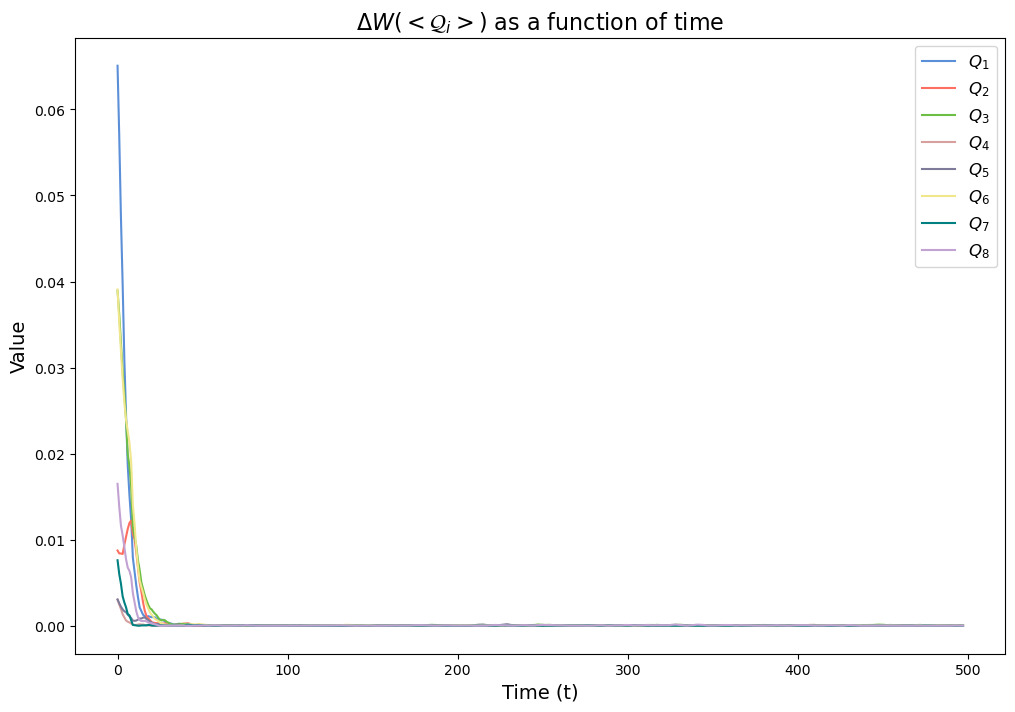

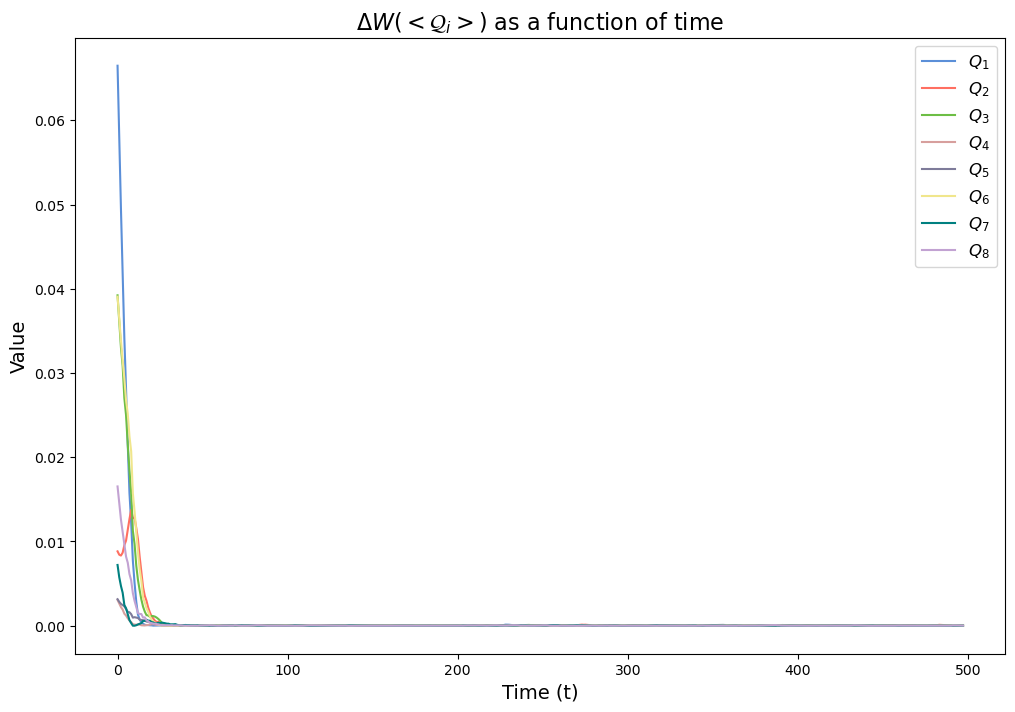

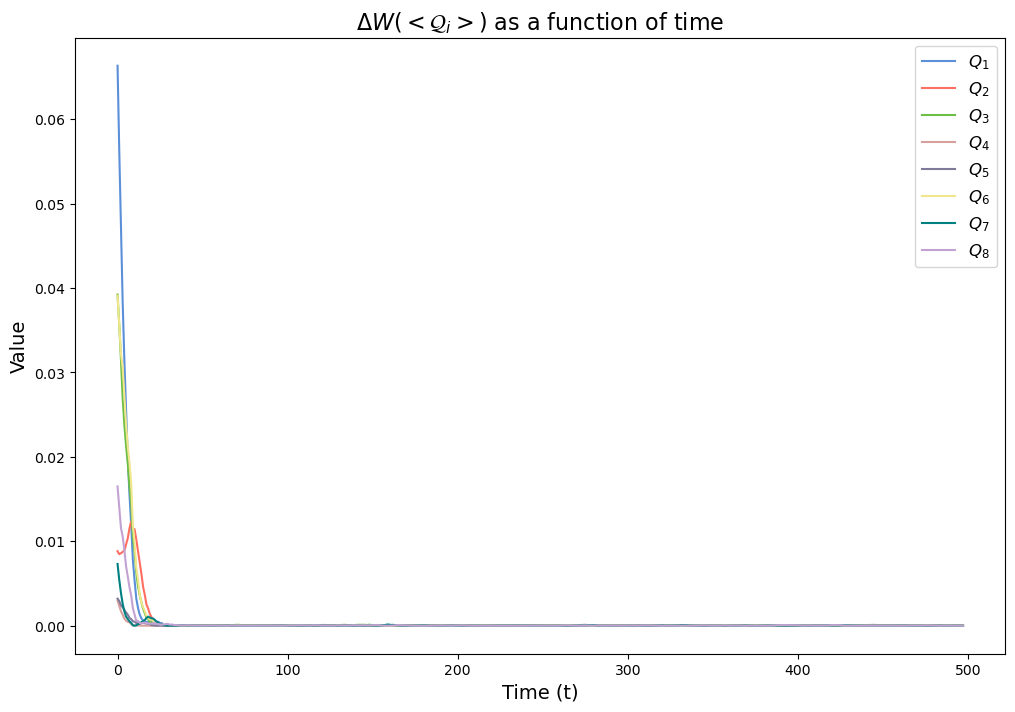

In [64]:
#landmax
# Define a list of colors (you can choose any color names or hex codes)
#for 8Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2']
#for 10 Q
colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF']
#for 12 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C']
#for 14Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C', '#C4BEB5', '#8E7BBA']
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[ext_work_of_ens_avg_landscape_maximizes_c2,ext_work_of_ens_avg_landscape_maximizes_c4,ext_work_of_ens_avg_landscape_maximizes_c5,ext_work_of_ens_avg_landscape_maximizes_c6,ext_work_of_ens_avg_landscape_maximizes_cn]


for data,conn in zip(datas, dataset_names):
    num_time_steps = len(data)-2  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    
    data=np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]
    
    plt.figure(figsize=(12, 8))
    #change this when analyzing pure dataset
    #plt.axhline(y=ytherm10, color='r', linestyle='--', label=f'y = {ytherm10}')

    # Plot each number as a function of t with specified colors
    for i, y_values in enumerate(data_transposed):
        color = colors[i % len(colors)]  # Cycle through the color list
        plt.plot(t, y_values, label=f'$Q_{i+1}$', color=color)
    
    # Add labels and legend
    plt.xlabel('Time (t)',fontsize=14)
    plt.ylabel('Value',fontsize=14)
    plt.title('$\Delta W(<\mathcal{Q}_i >)$ as a function of time',fontsize=16)
    plt.legend(fontsize=12)
    
    # Show the plot
    plt.savefig(f'Extractable work of ensemble averaged network {num}q_conn_{conn}_rule_R4_{dataset_label}.pdf', format='pdf', bbox_inches='tight')

    plt.show()

In [101]:
ext_work_of_ens_avg_landscape_maximizes_c2[10]-ext_work_of_ens_avg_landscape_maximizes_c2[9]

array([-0.00471577, -0.00151563, -0.00486374, -0.00017217, -0.00037407,
       -0.00502049, -0.00020432, -0.00170717])

In [102]:
def change_in_ext_work(ext_work_one_trial):
    return np.diff(ext_work_one_trial,axis = 0)

def change_in_ext_work_all_trials(ext_work_all_trial):
    change_in_ext_all =[]
    for trial in range(100):
        change_in_ext_all.append(np.diff(ext_work_all_trial[trial],axis = 0))
    return change_in_ext_all

In [ ]:
#Change in extractable work

In [ ]:
#Ensembled average change in extractable work

In [103]:
ens_avg_change_in_ext_work_random_c2=ensemble_averaged_one_point_measures_mean_std(change_in_ext_work_all_trials(ext_work_all_random_c2))[0]
ens_avg_change_in_ext_work_random_c4=ensemble_averaged_one_point_measures_mean_std(change_in_ext_work_all_trials(ext_work_all_random_c4))[0]
ens_avg_change_in_ext_work_random_c5=ensemble_averaged_one_point_measures_mean_std(change_in_ext_work_all_trials(ext_work_all_random_c5))[0]
ens_avg_change_in_ext_work_random_c6=ensemble_averaged_one_point_measures_mean_std(change_in_ext_work_all_trials(ext_work_all_random_c6))[0]
ens_avg_change_in_ext_work_random_cn=ensemble_averaged_one_point_measures_mean_std(change_in_ext_work_all_trials(ext_work_all_random_cn))[0]

In [104]:
ens_avg_change_in_ext_work_greedy_c2=ensemble_averaged_one_point_measures_mean_std(change_in_ext_work_all_trials(ext_work_all_greedy_c2))[0]
ens_avg_change_in_ext_work_greedy_c4=ensemble_averaged_one_point_measures_mean_std(change_in_ext_work_all_trials(ext_work_all_greedy_c4))[0]
ens_avg_change_in_ext_work_greedy_c5=ensemble_averaged_one_point_measures_mean_std(change_in_ext_work_all_trials(ext_work_all_greedy_c5))[0]
ens_avg_change_in_ext_work_greedy_c6=ensemble_averaged_one_point_measures_mean_std(change_in_ext_work_all_trials(ext_work_all_greedy_c6))[0]
ens_avg_change_in_ext_work_greedy_cn=ensemble_averaged_one_point_measures_mean_std(change_in_ext_work_all_trials(ext_work_all_greedy_cn))[0]

In [105]:
ens_avg_change_in_ext_work_mimic_c2=ensemble_averaged_one_point_measures_mean_std(change_in_ext_work_all_trials(ext_work_all_mimic_c2))[0]
ens_avg_change_in_ext_work_mimic_c4=ensemble_averaged_one_point_measures_mean_std(change_in_ext_work_all_trials(ext_work_all_mimic_c4))[0]
ens_avg_change_in_ext_work_mimic_c5=ensemble_averaged_one_point_measures_mean_std(change_in_ext_work_all_trials(ext_work_all_mimic_c5))[0]
ens_avg_change_in_ext_work_mimic_c6=ensemble_averaged_one_point_measures_mean_std(change_in_ext_work_all_trials(ext_work_all_mimic_c6))[0]
ens_avg_change_in_ext_work_mimic_cn=ensemble_averaged_one_point_measures_mean_std(change_in_ext_work_all_trials(ext_work_all_mimic_cn))[0]


In [106]:
ens_avg_change_in_ext_work_landscape_maximizes_c2=ensemble_averaged_one_point_measures_mean_std(change_in_ext_work_all_trials(ext_work_all_landscape_maximizes_c2))[0]
ens_avg_change_in_ext_work_landscape_maximizes_c4=ensemble_averaged_one_point_measures_mean_std(change_in_ext_work_all_trials(ext_work_all_landscape_maximizes_c4))[0]
ens_avg_change_in_ext_work_landscape_maximizes_c5=ensemble_averaged_one_point_measures_mean_std(change_in_ext_work_all_trials(ext_work_all_landscape_maximizes_c5))[0]
ens_avg_change_in_ext_work_landscape_maximizes_c6=ensemble_averaged_one_point_measures_mean_std(change_in_ext_work_all_trials(ext_work_all_landscape_maximizes_c6))[0]
ens_avg_change_in_ext_work_landscape_maximizes_cn=ensemble_averaged_one_point_measures_mean_std(change_in_ext_work_all_trials(ext_work_all_landscape_maximizes_cn))[0]

In [107]:
#Plot ensembled average change in extractable work

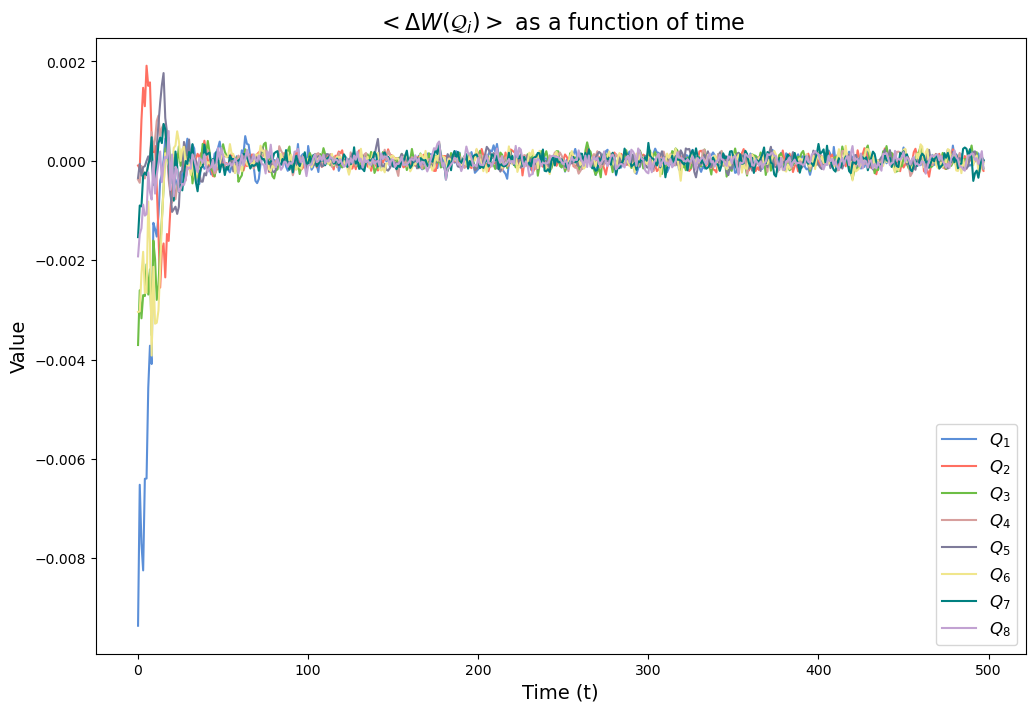

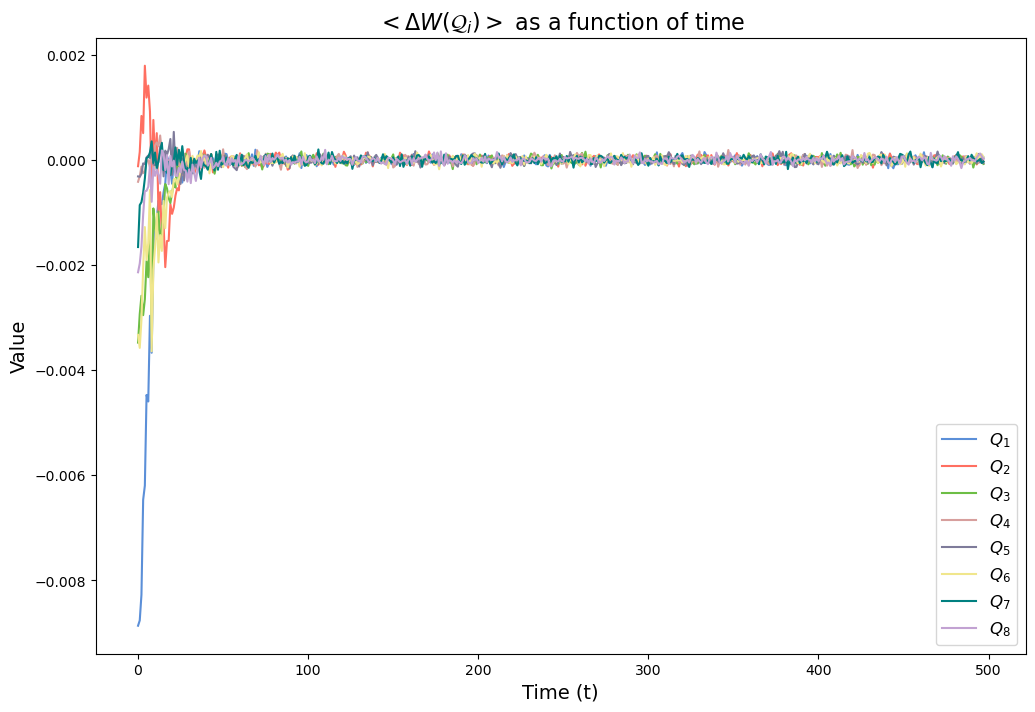

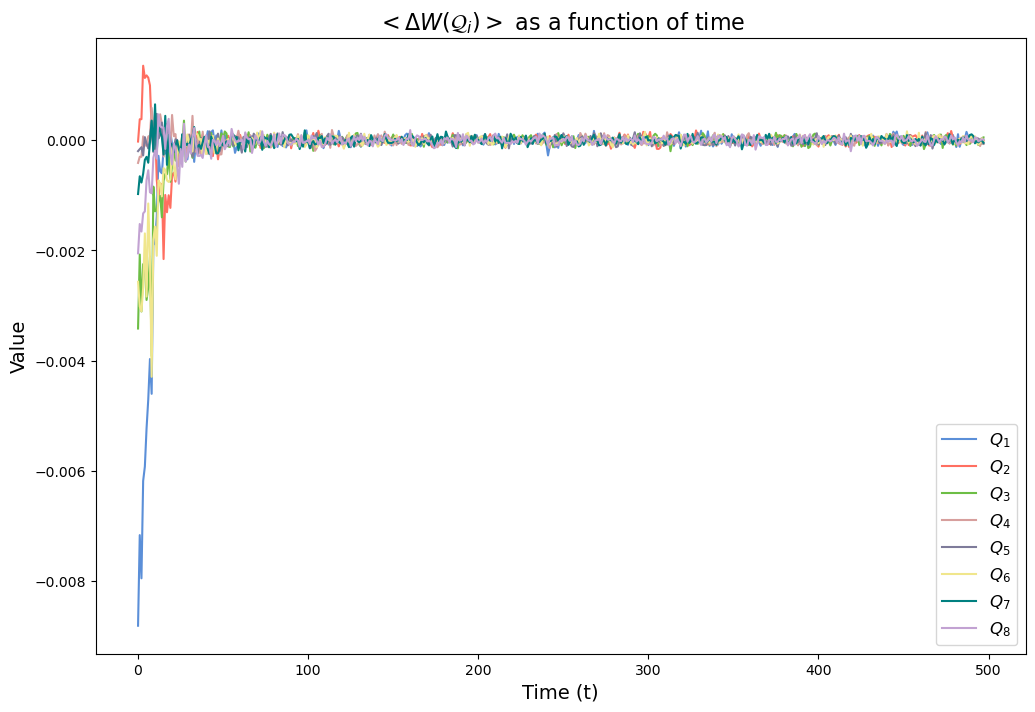

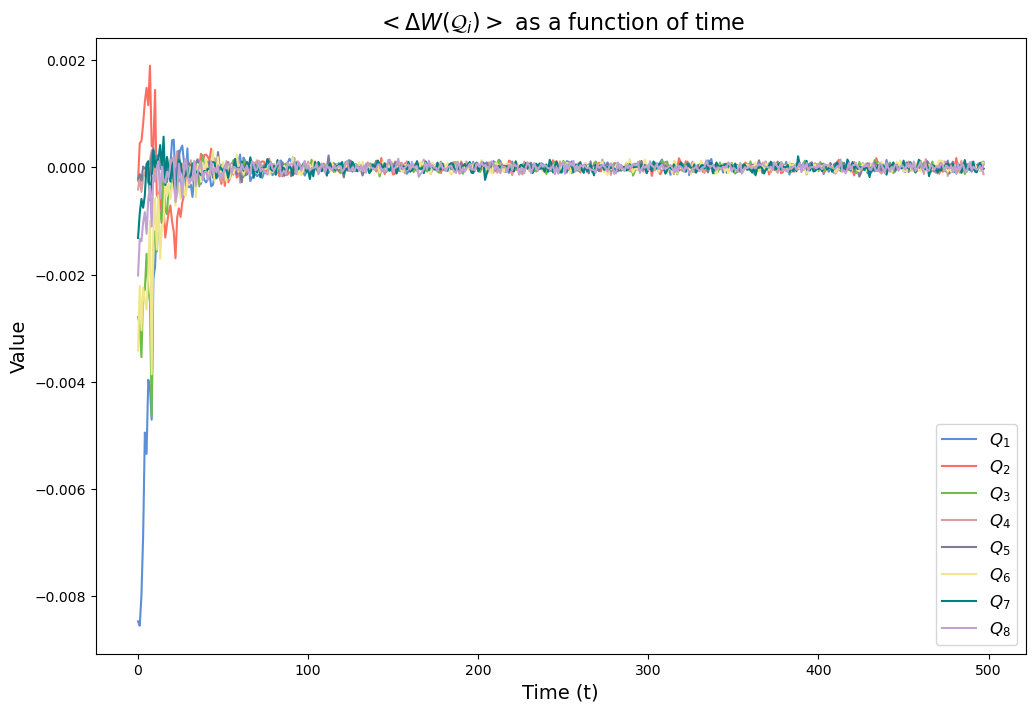

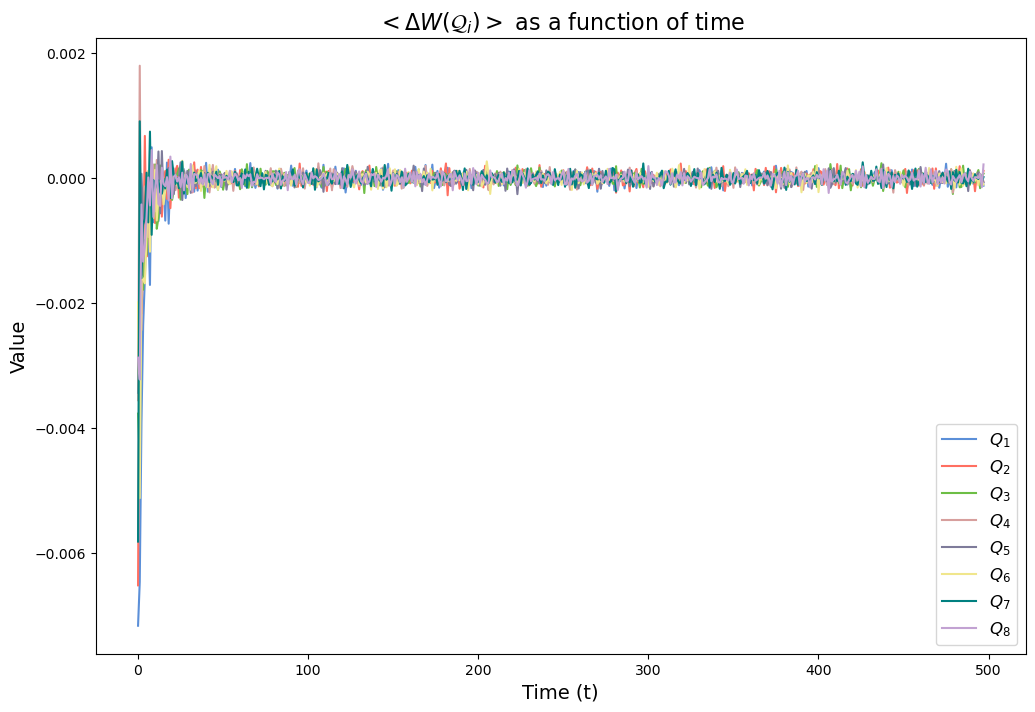

In [109]:
#random
# Define a list of colors (you can choose any color names or hex codes)
#for 8Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2']
#for 10 Q
colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF']
#for 12 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C']
#for 14Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C', '#C4BEB5', '#8E7BBA']
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[ens_avg_change_in_ext_work_random_c2,ens_avg_change_in_ext_work_random_c4,ens_avg_change_in_ext_work_random_c5,ens_avg_change_in_ext_work_random_c6,ens_avg_change_in_ext_work_random_cn]


for data,conn in zip(datas, dataset_names):
    num_time_steps = len(data)-1  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    
    data=np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]
    
    plt.figure(figsize=(12, 8))
    #change this when analyzing pure dataset
    #plt.axhline(y=ytherm10, color='r', linestyle='--', label=f'y = {ytherm10}')

    # Plot each number as a function of t with specified colors
    for i, y_values in enumerate(data_transposed):
        color = colors[i % len(colors)]  # Cycle through the color list
        plt.plot(t, y_values, label=f'$Q_{i+1}$', color=color)
    
    # Add labels and legend
    plt.xlabel('Time (t)',fontsize=14)
    plt.ylabel('Value',fontsize=14)
    plt.title('$<\Delta W(\mathcal{Q}_i) >$ as a function of time',fontsize=16)
    plt.legend(fontsize=12)
    
    # Show the plot
    plt.savefig(f'Ensemble averaged change extractable work of network {num}q_conn_{conn}_rule_R1_{dataset_label}.pdf', format='pdf', bbox_inches='tight')

    plt.show()

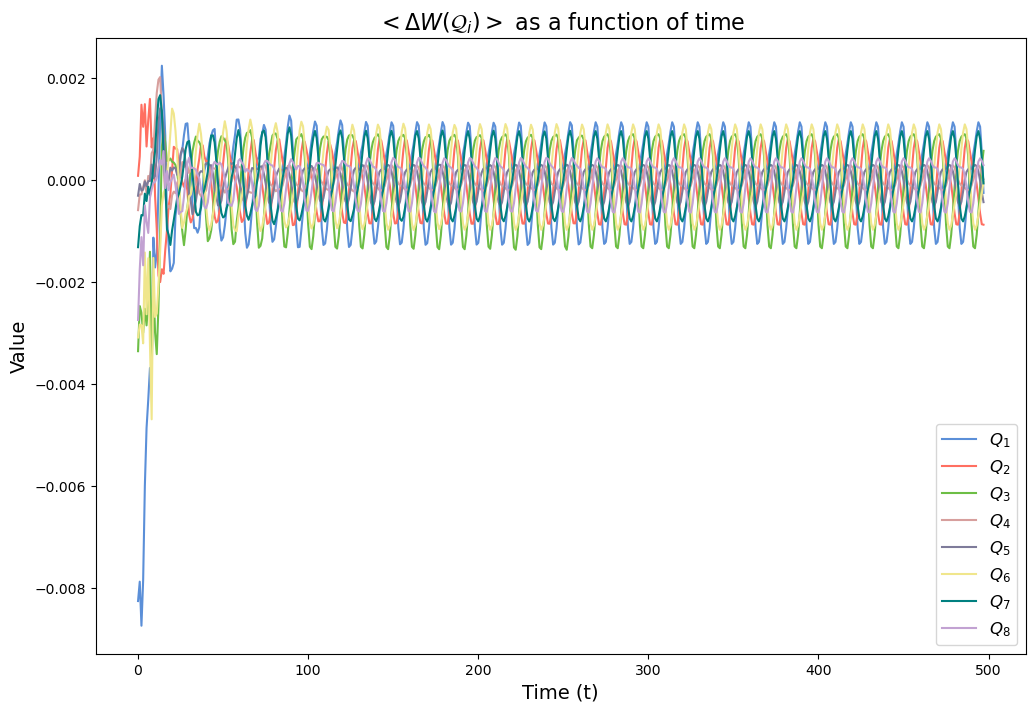

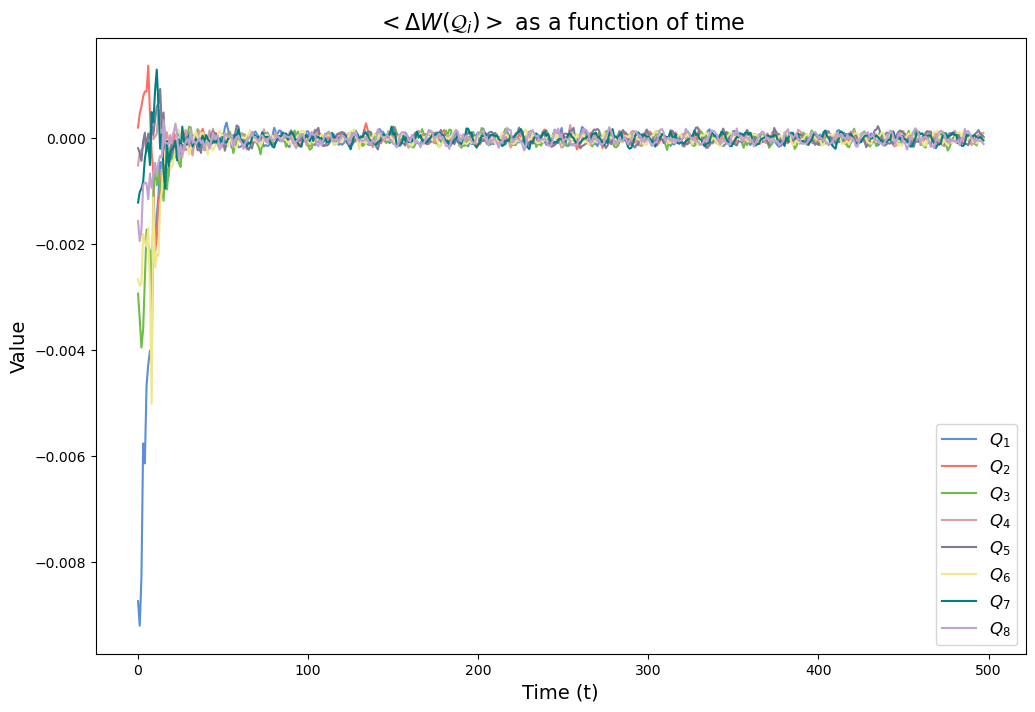

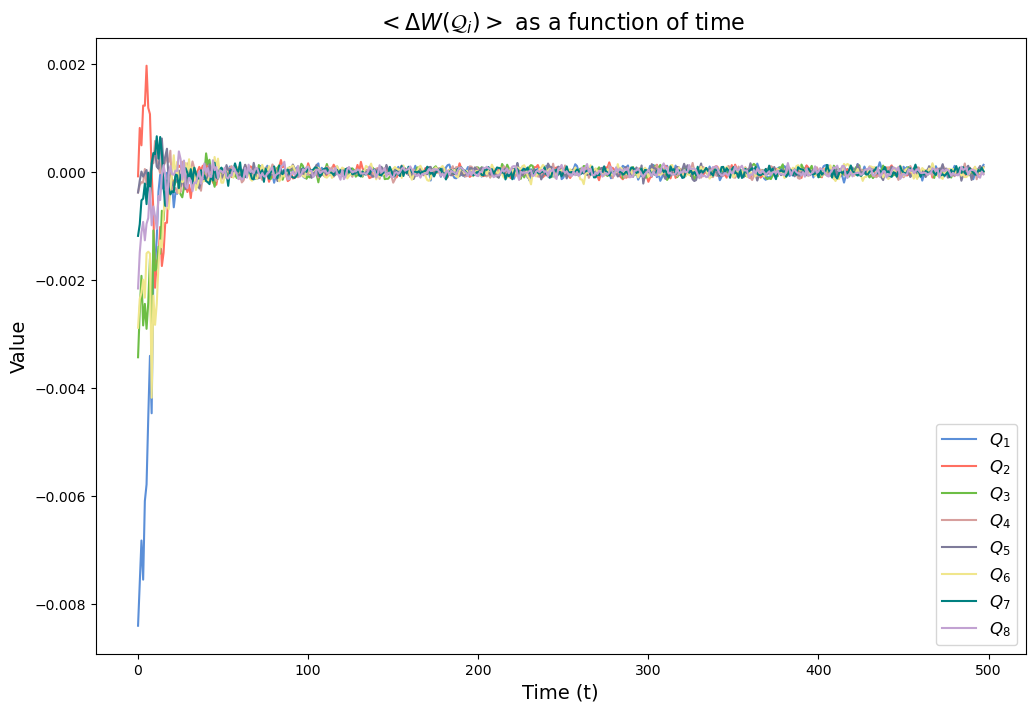

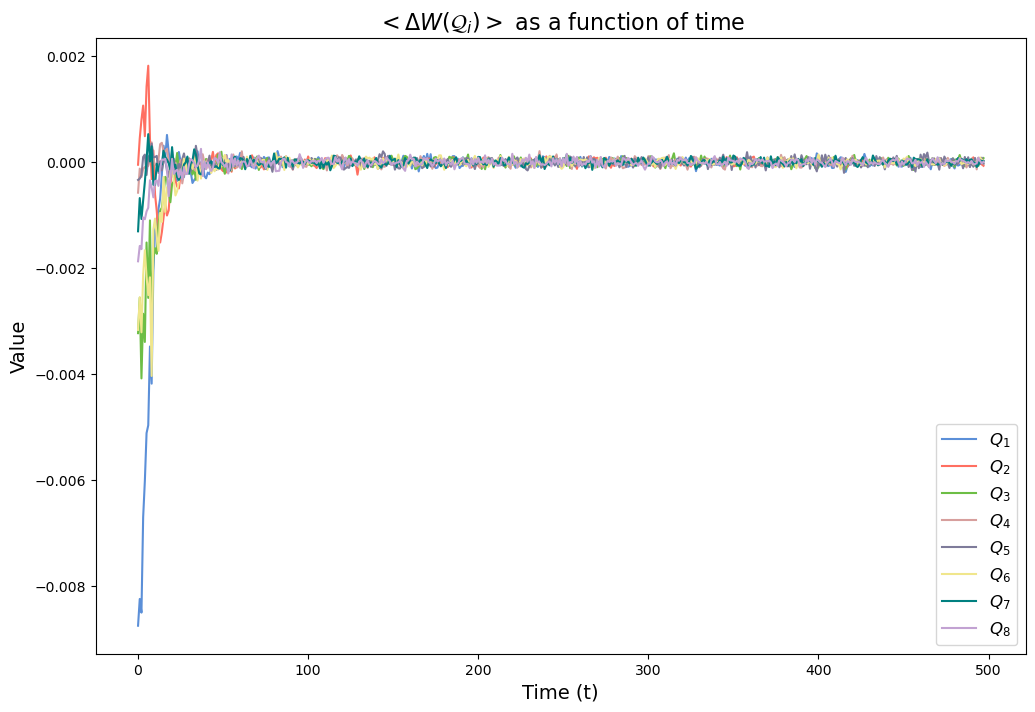

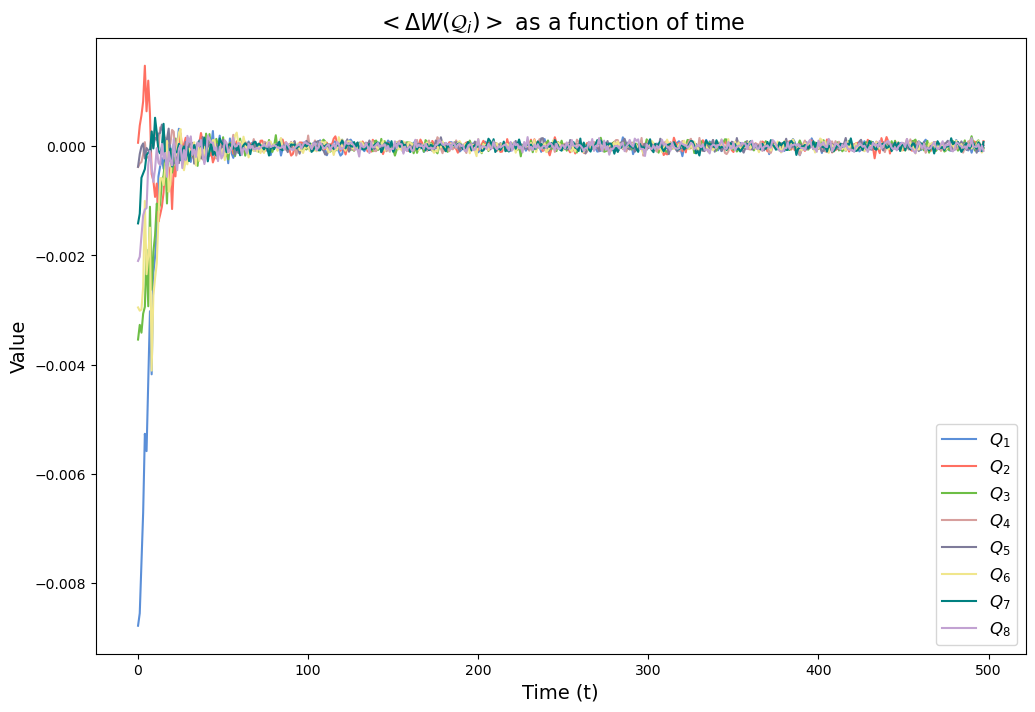

In [110]:
#greedy
# Define a list of colors (you can choose any color names or hex codes)
#for 8Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2']
#for 10 Q
colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF']
#for 12 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C']
#for 14Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C', '#C4BEB5', '#8E7BBA']
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[ens_avg_change_in_ext_work_greedy_c2,ens_avg_change_in_ext_work_greedy_c4,ens_avg_change_in_ext_work_greedy_c5,ens_avg_change_in_ext_work_greedy_c6,ens_avg_change_in_ext_work_greedy_cn]


for data,conn in zip(datas, dataset_names):
    num_time_steps = len(data)-1  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    
    data=np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]
    
    plt.figure(figsize=(12, 8))
    #change this when analyzing pure dataset
    #plt.axhline(y=ytherm10, color='r', linestyle='--', label=f'y = {ytherm10}')

    # Plot each number as a function of t with specified colors
    for i, y_values in enumerate(data_transposed):
        color = colors[i % len(colors)]  # Cycle through the color list
        plt.plot(t, y_values, label=f'$Q_{i+1}$', color=color)
    
    # Add labels and legend
    plt.xlabel('Time (t)',fontsize=14)
    plt.ylabel('Value',fontsize=14)
    plt.title('$<\Delta W(\mathcal{Q}_i) >$ as a function of time',fontsize=16)
    plt.legend(fontsize=12)
    
    # Show the plot
    plt.savefig(f'Ensemble averaged change extractable work of network {num}q_conn_{conn}_rule_R2_{dataset_label}.pdf', format='pdf', bbox_inches='tight')

    plt.show()

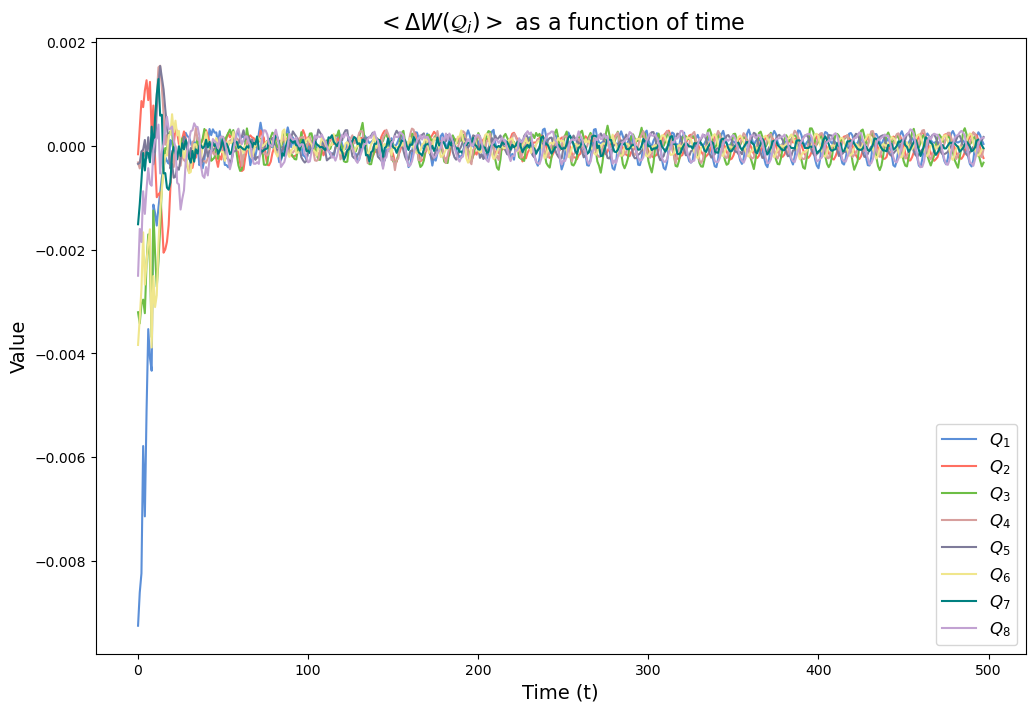

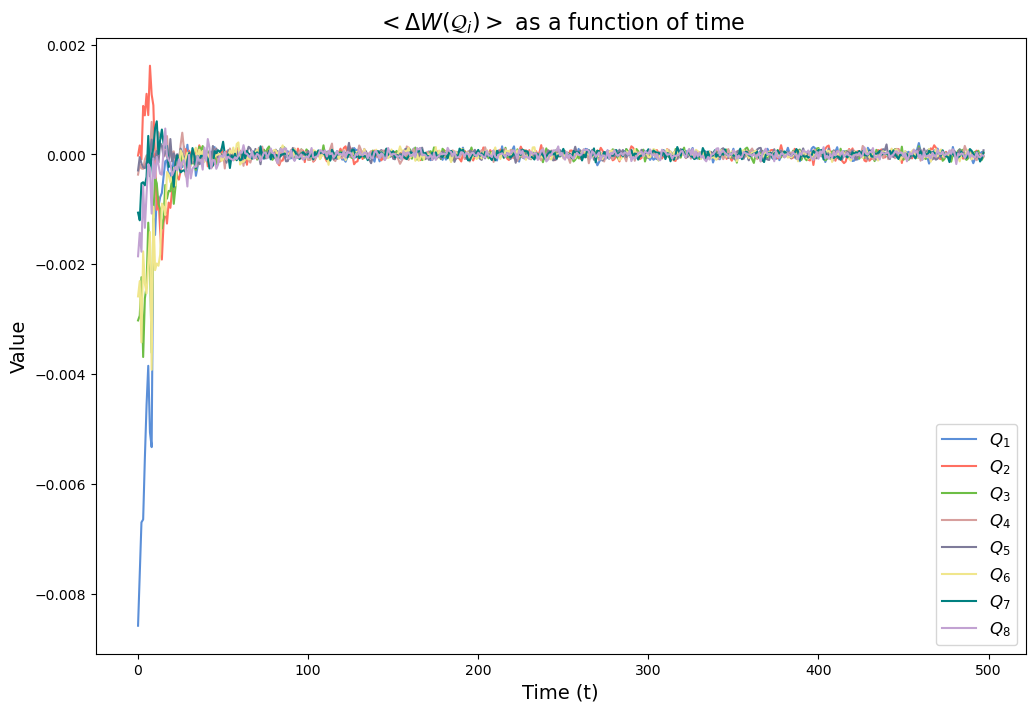

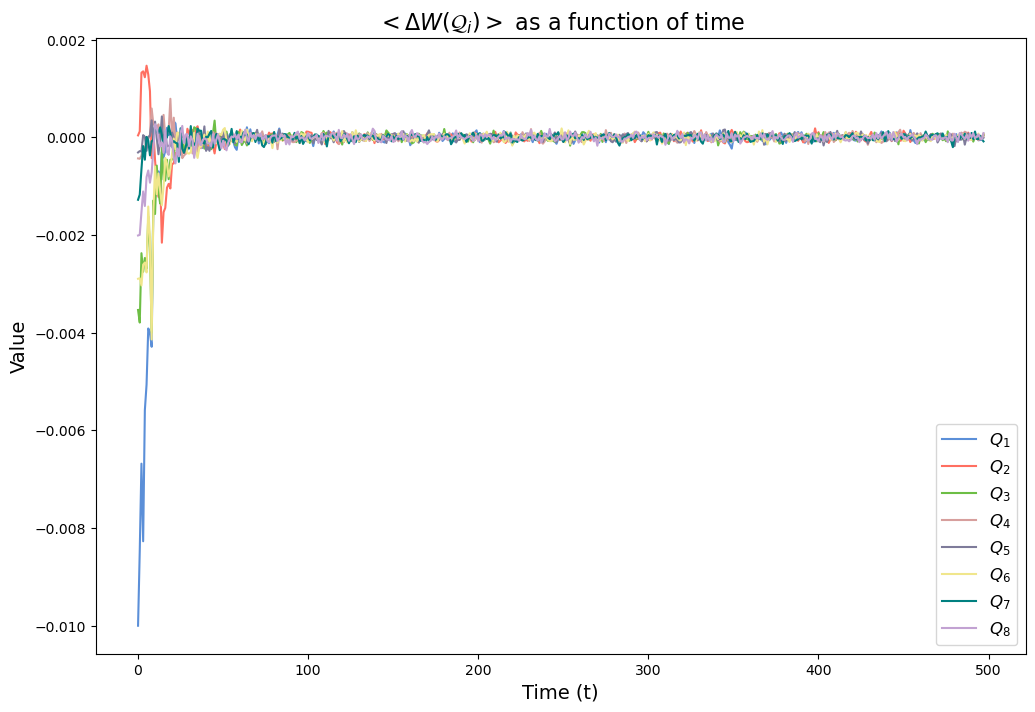

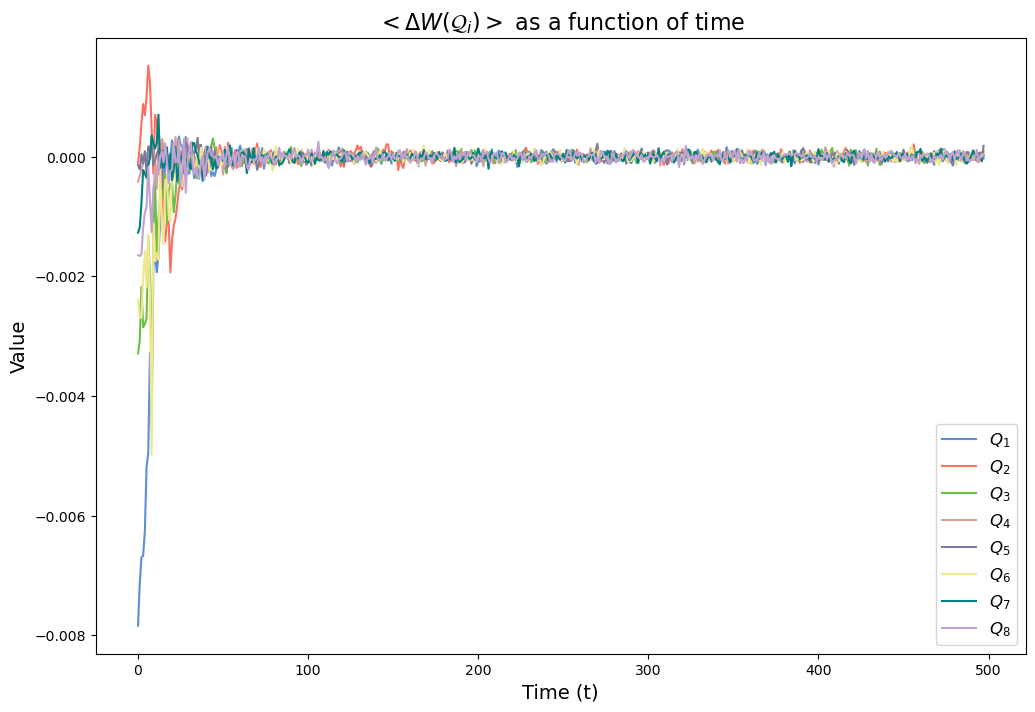

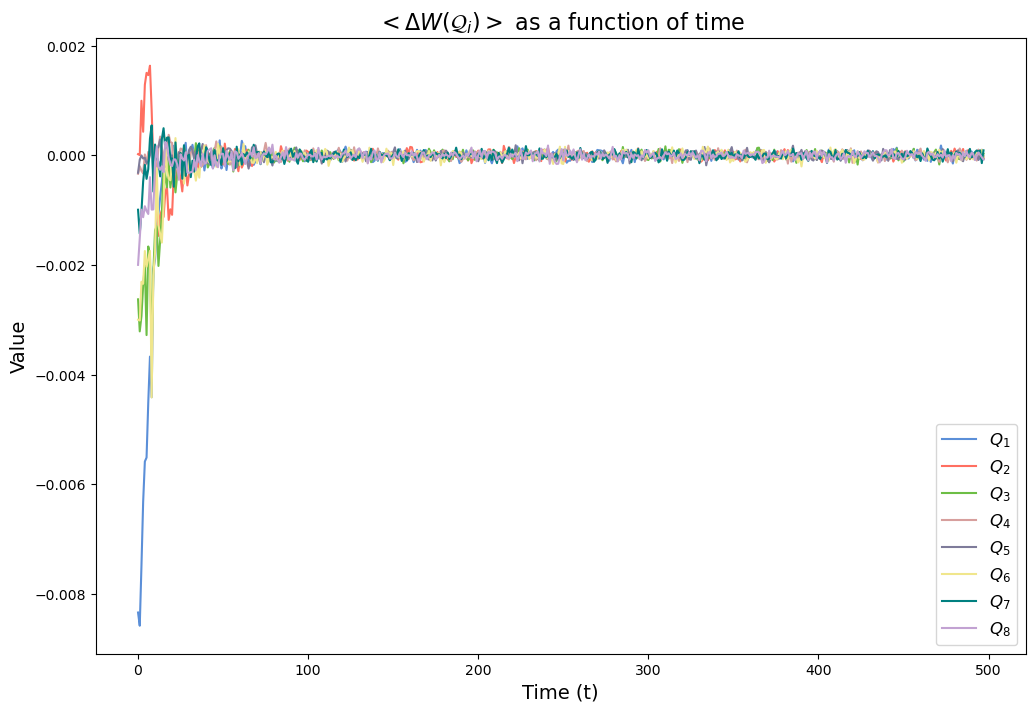

In [111]:
#mimic
# Define a list of colors (you can choose any color names or hex codes)
#for 8Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2']
#for 10 Q
colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF']
#for 12 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C']
#for 14Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C', '#C4BEB5', '#8E7BBA']
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[ens_avg_change_in_ext_work_mimic_c2,ens_avg_change_in_ext_work_mimic_c4,ens_avg_change_in_ext_work_mimic_c5,ens_avg_change_in_ext_work_mimic_c6,ens_avg_change_in_ext_work_mimic_cn]


for data,conn in zip(datas, dataset_names):
    num_time_steps = len(data)-1  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    
    data=np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]
    
    plt.figure(figsize=(12, 8))
    #change this when analyzing pure dataset
    #plt.axhline(y=ytherm10, color='r', linestyle='--', label=f'y = {ytherm10}')

    # Plot each number as a function of t with specified colors
    for i, y_values in enumerate(data_transposed):
        color = colors[i % len(colors)]  # Cycle through the color list
        plt.plot(t, y_values, label=f'$Q_{i+1}$', color=color)
    
    # Add labels and legend
    plt.xlabel('Time (t)',fontsize=14)
    plt.ylabel('Value',fontsize=14)
    plt.title('$<\Delta W(\mathcal{Q}_i) >$ as a function of time',fontsize=16)
    plt.legend(fontsize=12)
    
    # Show the plot
    plt.savefig(f'Ensemble averaged change extractable work of network {num}q_conn_{conn}_rule_R3_{dataset_label}.pdf', format='pdf', bbox_inches='tight')

    plt.show()

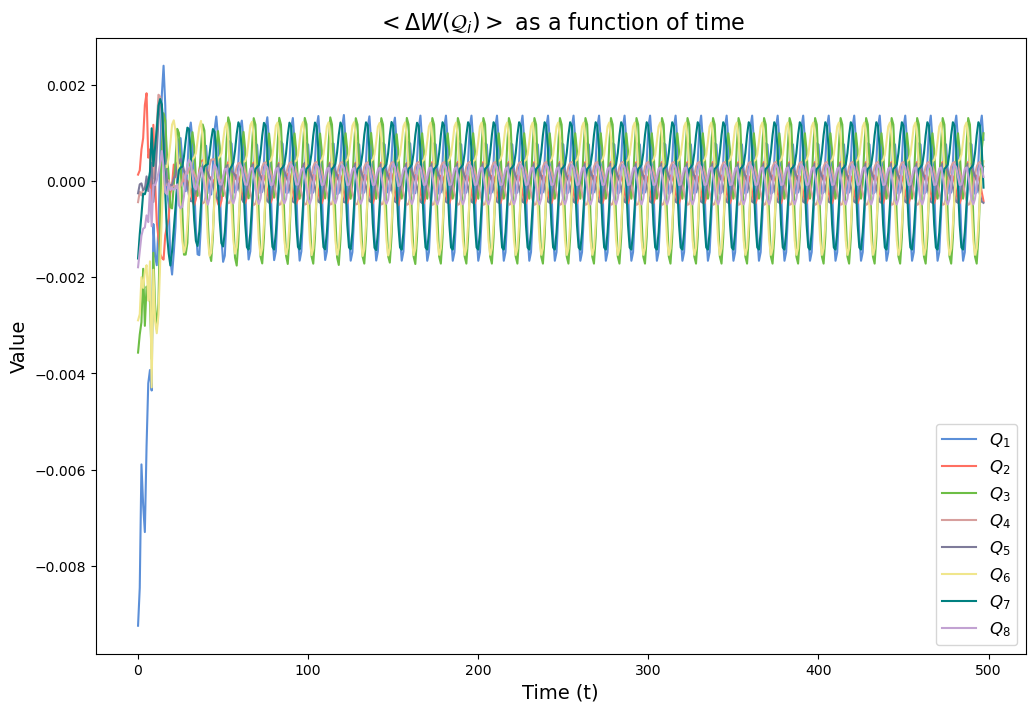

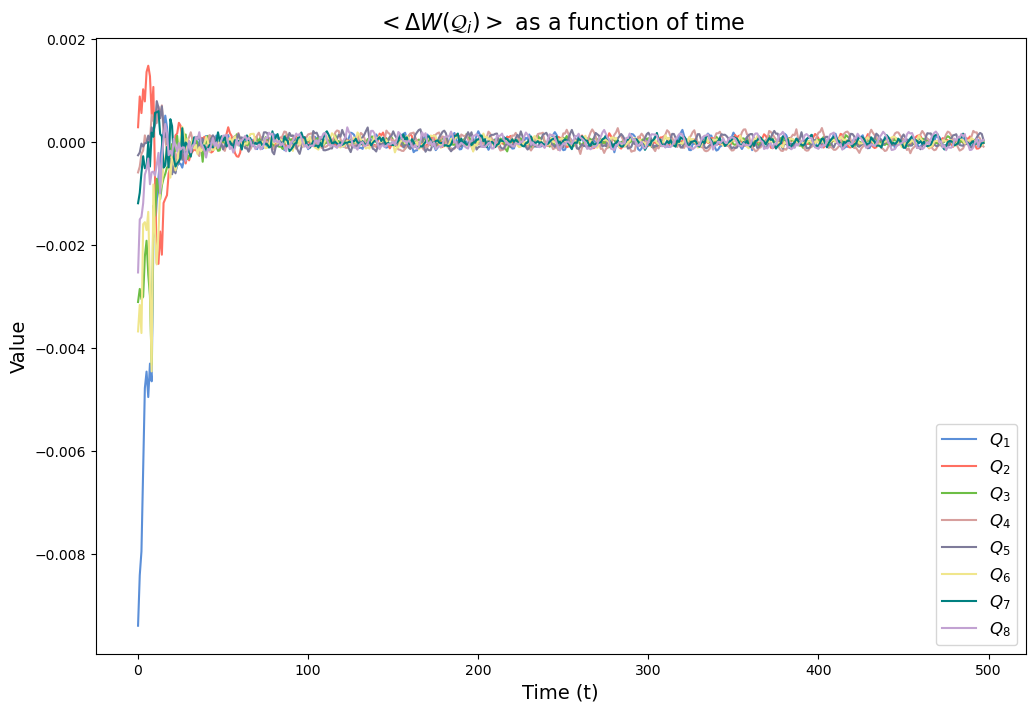

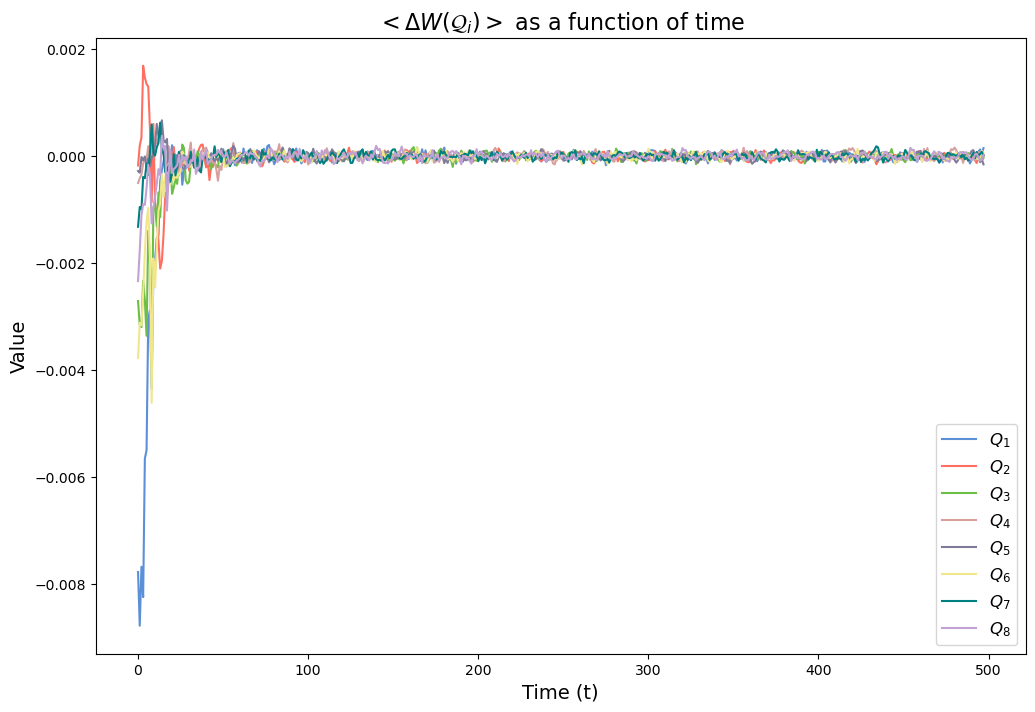

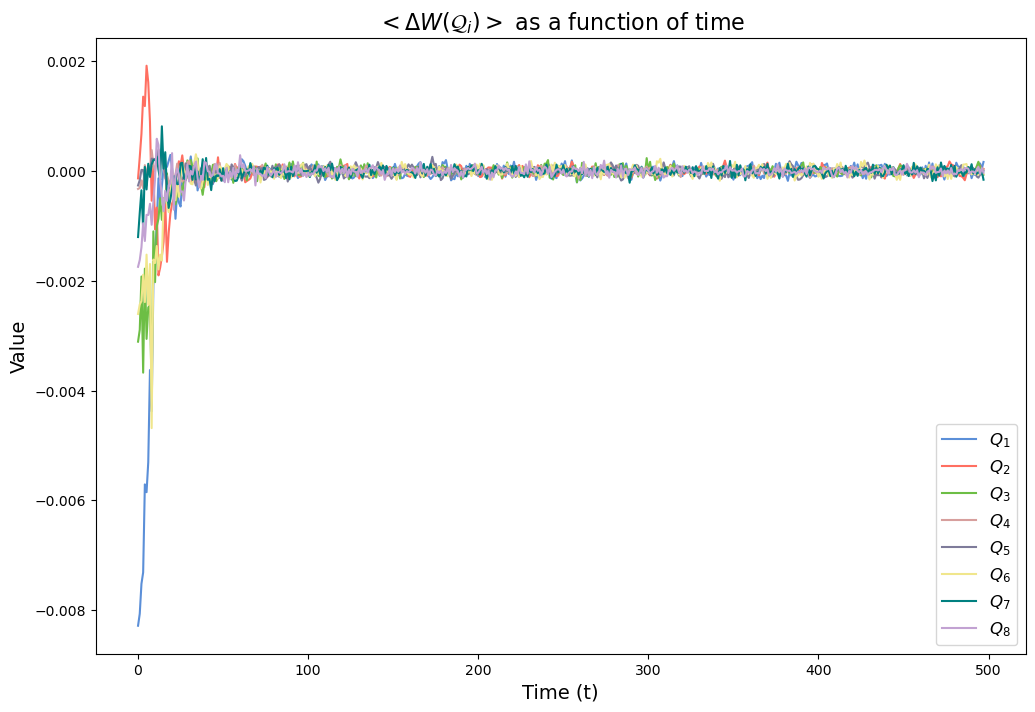

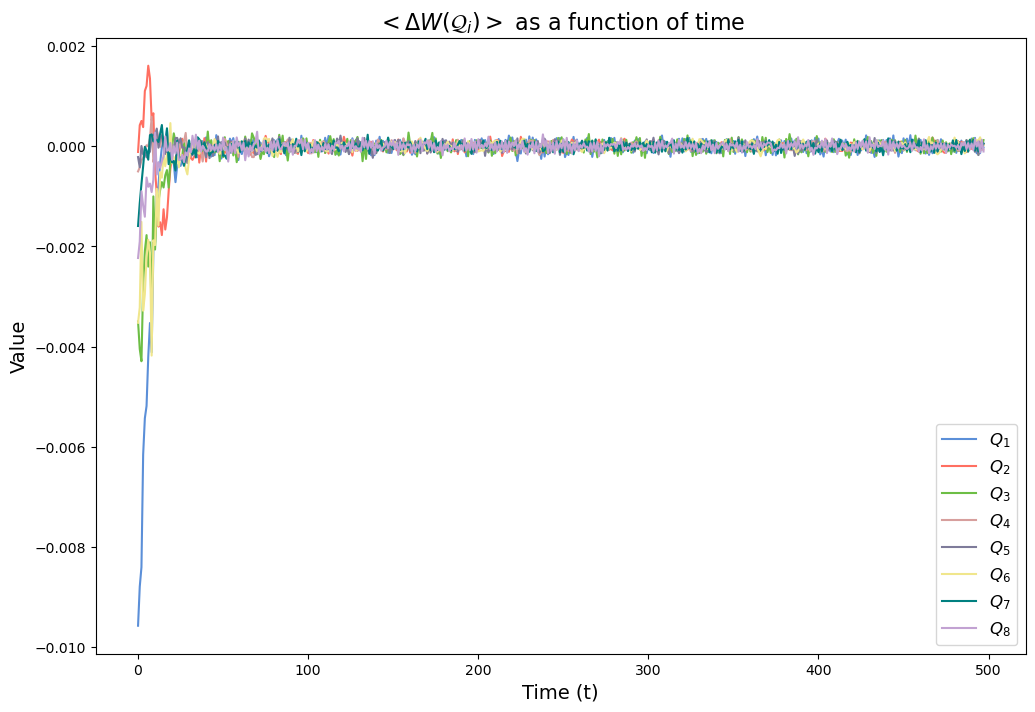

In [112]:
#landmax
# Define a list of colors (you can choose any color names or hex codes)
#for 8Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2']
#for 10 Q
colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF']
#for 12 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C']
#for 14Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C', '#C4BEB5', '#8E7BBA']
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[ens_avg_change_in_ext_work_landscape_maximizes_c2,ens_avg_change_in_ext_work_landscape_maximizes_c4,ens_avg_change_in_ext_work_landscape_maximizes_c5,ens_avg_change_in_ext_work_landscape_maximizes_c6,ens_avg_change_in_ext_work_landscape_maximizes_cn]


for data,conn in zip(datas, dataset_names):
    num_time_steps = len(data)-1  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    
    data=np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]
    
    plt.figure(figsize=(12, 8))
    #change this when analyzing pure dataset
    #plt.axhline(y=ytherm10, color='r', linestyle='--', label=f'y = {ytherm10}')

    # Plot each number as a function of t with specified colors
    for i, y_values in enumerate(data_transposed):
        color = colors[i % len(colors)]  # Cycle through the color list
        plt.plot(t, y_values, label=f'$Q_{i+1}$', color=color)
    
    # Add labels and legend
    plt.xlabel('Time (t)',fontsize=14)
    plt.ylabel('Value',fontsize=14)
    plt.title('$<\Delta W(\mathcal{Q}_i) >$ as a function of time',fontsize=16)
    plt.legend(fontsize=12)
    
    # Show the plot
    plt.savefig(f'Ensemble averaged change extractable work of network {num}q_conn_{conn}_rule_R4_{dataset_label}.pdf', format='pdf', bbox_inches='tight')

    plt.show()

In [ ]:
#Change in extractable work of ensembled average network

In [113]:
change_in_ext_work_ens_avg_random_c2=change_in_ext_work(ext_work_of_ens_avg_random_c2)
change_in_ext_work_ens_avg_random_c4=change_in_ext_work(ext_work_of_ens_avg_random_c4)
change_in_ext_work_ens_avg_random_c5=change_in_ext_work(ext_work_of_ens_avg_random_c5)
change_in_ext_work_ens_avg_random_c6=change_in_ext_work(ext_work_of_ens_avg_random_c6)
change_in_ext_work_ens_avg_random_cn=change_in_ext_work(ext_work_of_ens_avg_random_cn)

In [114]:
change_in_ext_work_ens_avg_greedy_c2=change_in_ext_work(ext_work_of_ens_avg_greedy_c2)
change_in_ext_work_ens_avg_greedy_c4=change_in_ext_work(ext_work_of_ens_avg_greedy_c4)
change_in_ext_work_ens_avg_greedy_c5=change_in_ext_work(ext_work_of_ens_avg_greedy_c5)
change_in_ext_work_ens_avg_greedy_c6=change_in_ext_work(ext_work_of_ens_avg_greedy_c6)
change_in_ext_work_ens_avg_greedy_cn=change_in_ext_work(ext_work_of_ens_avg_greedy_cn)


In [115]:
change_in_ext_work_ens_avg_mimic_c2=change_in_ext_work(ext_work_of_ens_avg_mimic_c2)
change_in_ext_work_ens_avg_mimic_c4=change_in_ext_work(ext_work_of_ens_avg_mimic_c4)
change_in_ext_work_ens_avg_mimic_c5=change_in_ext_work(ext_work_of_ens_avg_mimic_c5)
change_in_ext_work_ens_avg_mimic_c6=change_in_ext_work(ext_work_of_ens_avg_mimic_c6)
change_in_ext_work_ens_avg_mimic_cn=change_in_ext_work(ext_work_of_ens_avg_mimic_cn)


In [116]:
change_in_ext_work_ens_avg_landscape_maximizes_c2=change_in_ext_work(ext_work_of_ens_avg_landscape_maximizes_c2)
change_in_ext_work_ens_avg_landscape_maximizes_c4=change_in_ext_work(ext_work_of_ens_avg_landscape_maximizes_c4)
change_in_ext_work_ens_avg_landscape_maximizes_c5=change_in_ext_work(ext_work_of_ens_avg_landscape_maximizes_c5)
change_in_ext_work_ens_avg_landscape_maximizes_c6=change_in_ext_work(ext_work_of_ens_avg_landscape_maximizes_c6)
change_in_ext_work_ens_avg_landscape_maximizes_cn=change_in_ext_work(ext_work_of_ens_avg_landscape_maximizes_cn)


In [117]:
#Plot change in ext work of ens avg network

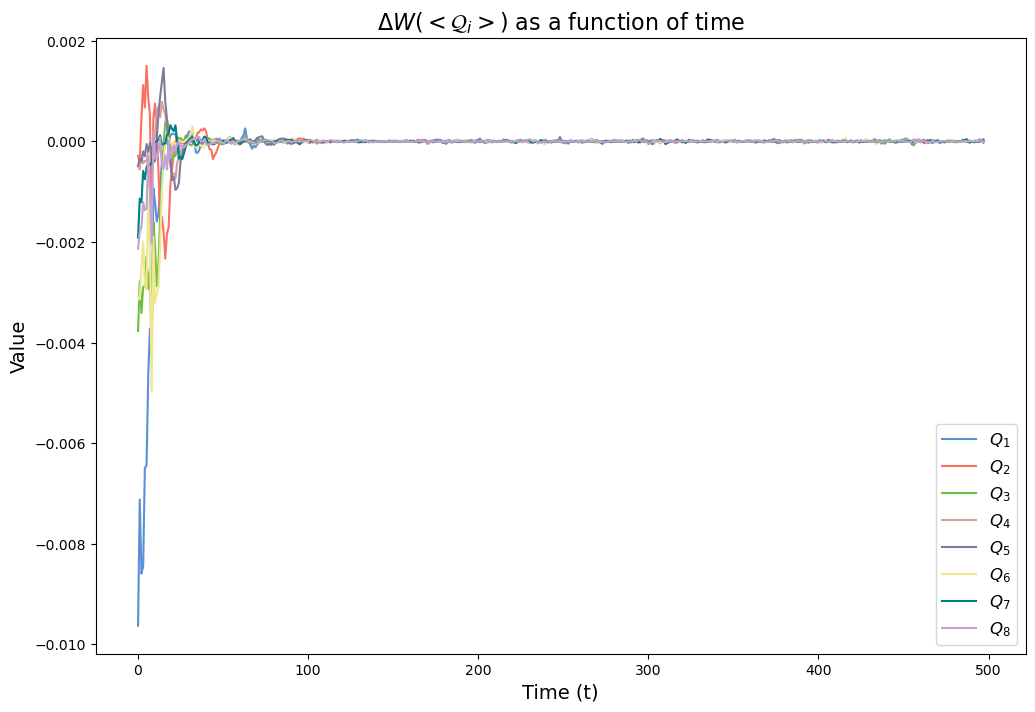

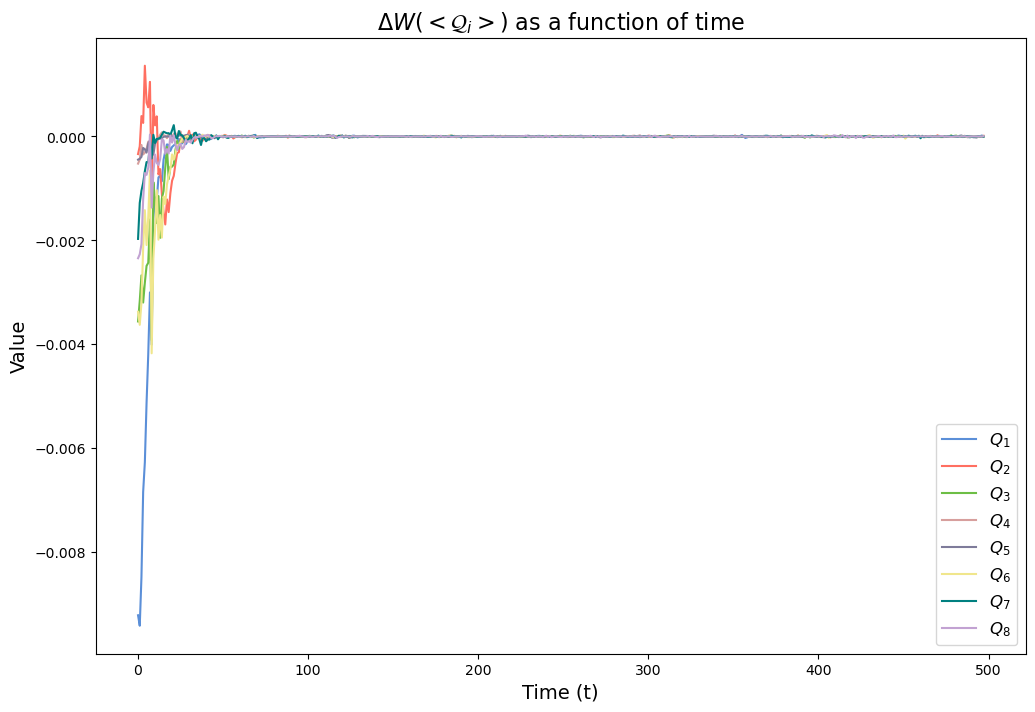

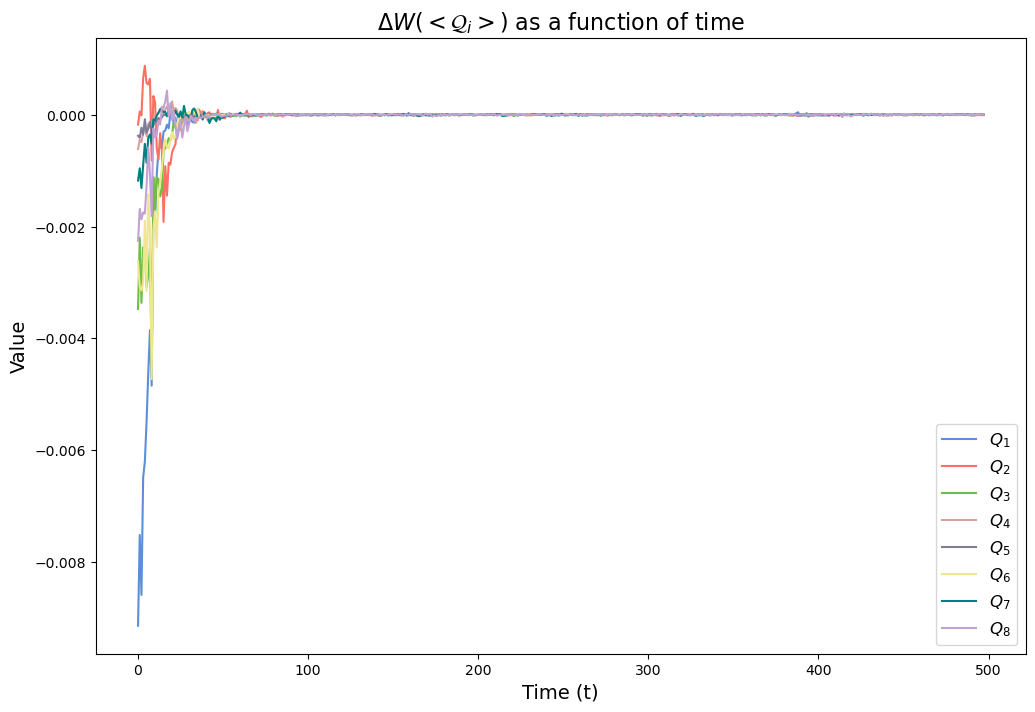

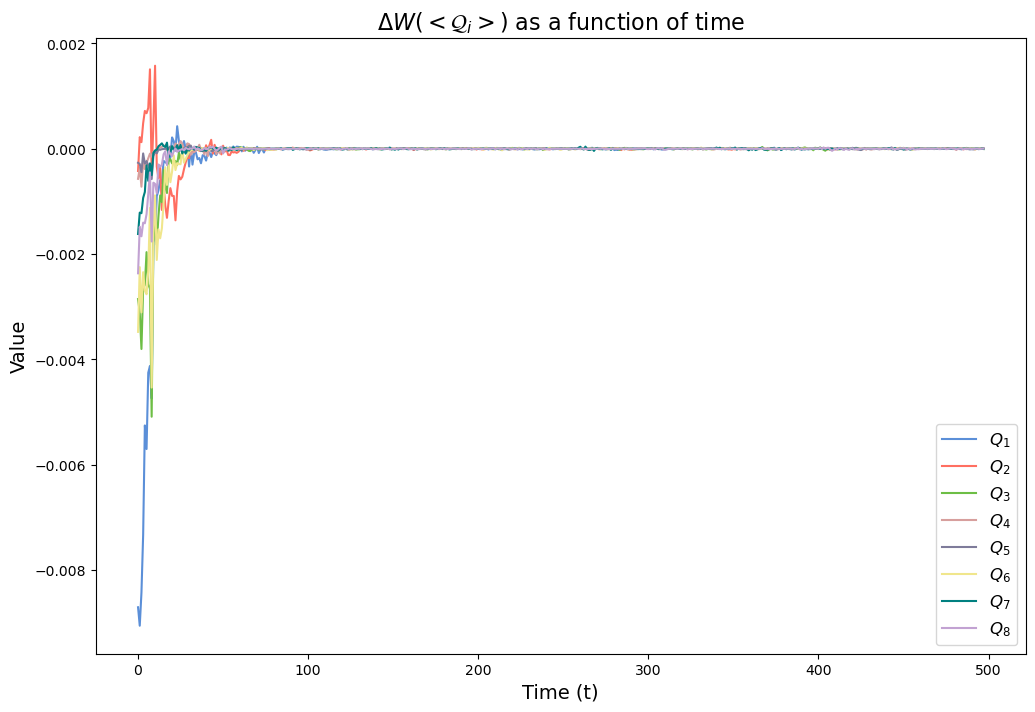

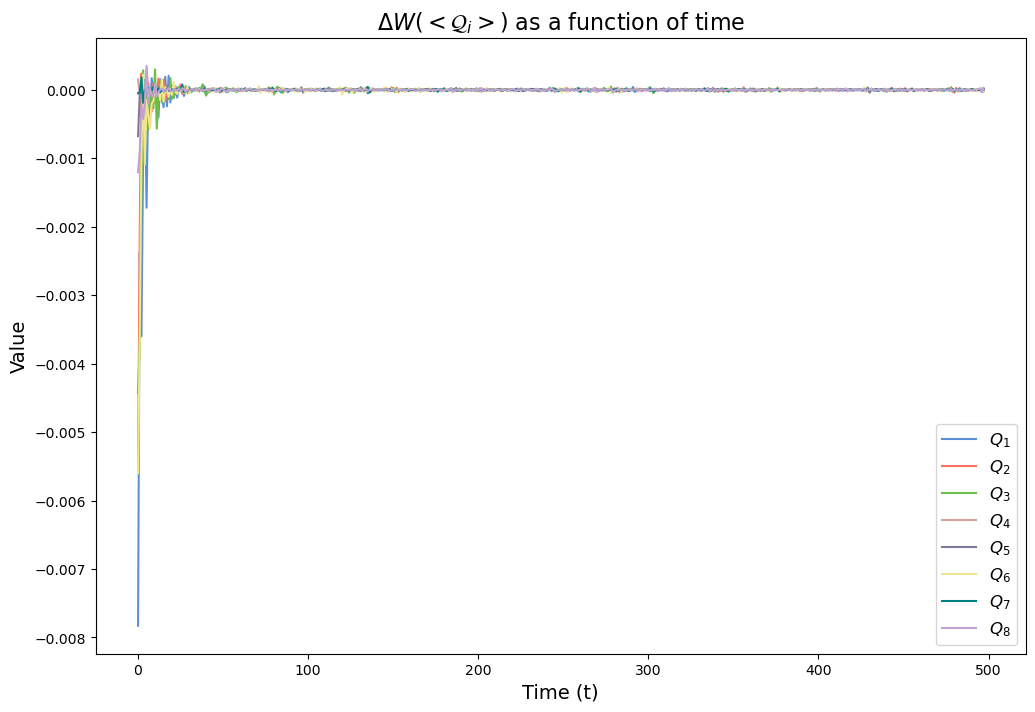

In [118]:
#random
# Define a list of colors (you can choose any color names or hex codes)
#for 8Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2']
#for 10 Q
colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF']
#for 12 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C']
#for 14Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C', '#C4BEB5', '#8E7BBA']
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[change_in_ext_work_ens_avg_random_c2,change_in_ext_work_ens_avg_random_c4,change_in_ext_work_ens_avg_random_c5,change_in_ext_work_ens_avg_random_c6,change_in_ext_work_ens_avg_random_cn]


for data,conn in zip(datas, dataset_names):
    num_time_steps = len(data)-1  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    
    data=np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]
    
    plt.figure(figsize=(12, 8))
    #change this when analyzing pure dataset
    #plt.axhline(y=ytherm10, color='r', linestyle='--', label=f'y = {ytherm10}')

    # Plot each number as a function of t with specified colors
    for i, y_values in enumerate(data_transposed):
        color = colors[i % len(colors)]  # Cycle through the color list
        plt.plot(t, y_values, label=f'$Q_{i+1}$', color=color)
    
    # Add labels and legend
    plt.xlabel('Time (t)',fontsize=14)
    plt.ylabel('Value',fontsize=14)
    plt.title('$\Delta W(<\mathcal{Q}_i >)$ as a function of time',fontsize=16)
    plt.legend(fontsize=12)
    
    # Show the plot
    plt.savefig(f'Change in extractable work of ensemble averaged network {num}q_conn_{conn}_rule_R1_{dataset_label}.pdf', format='pdf', bbox_inches='tight')

    plt.show()

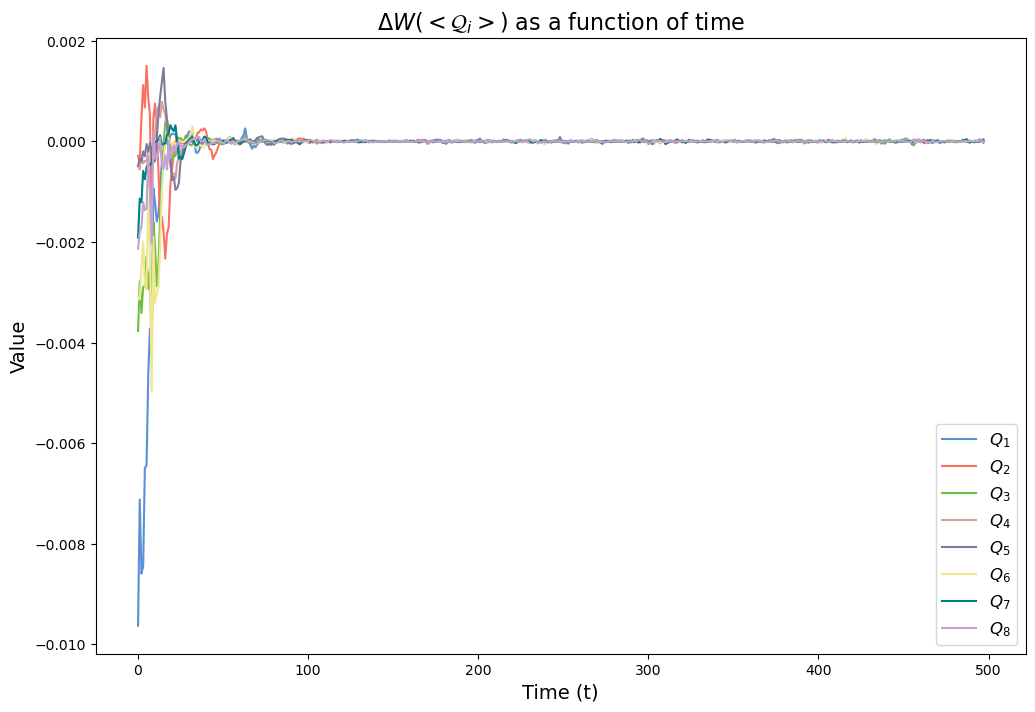

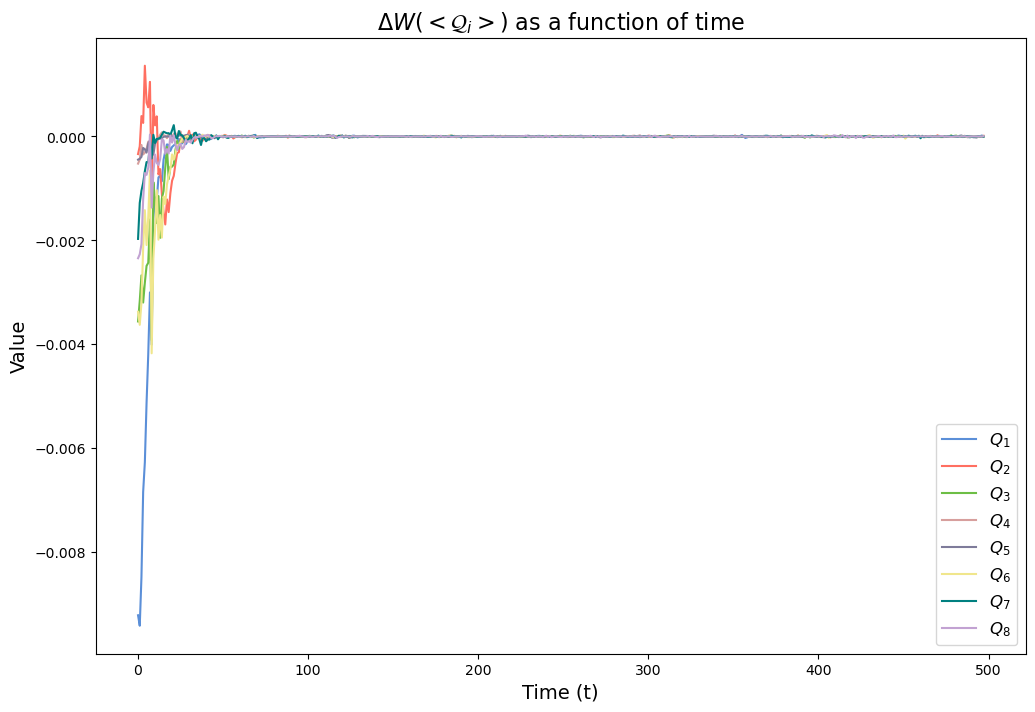

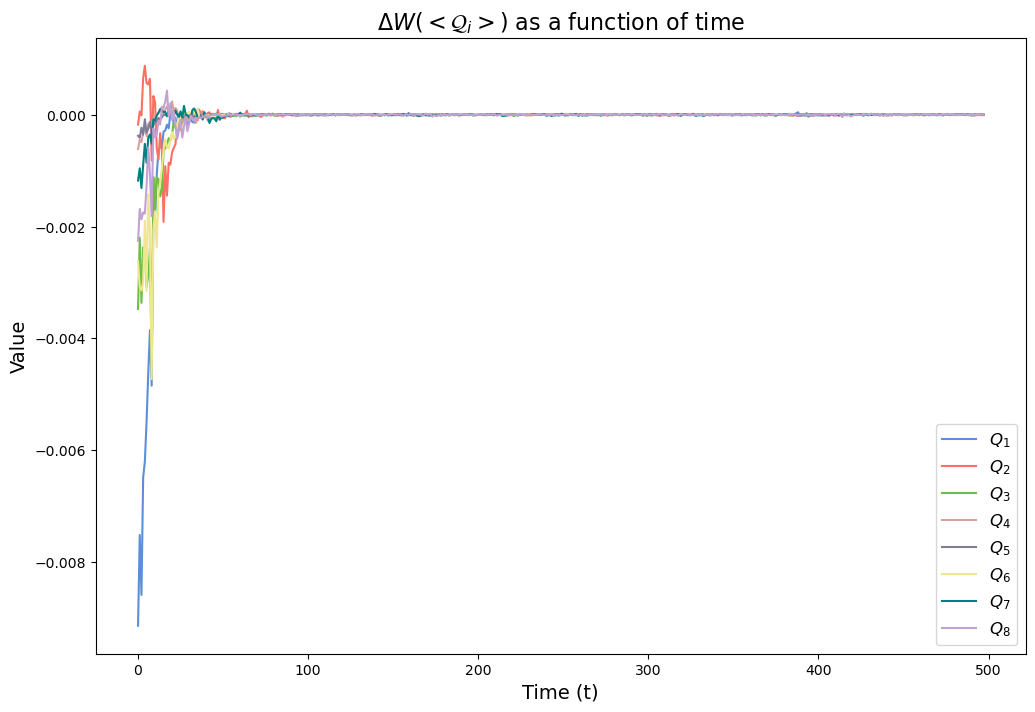

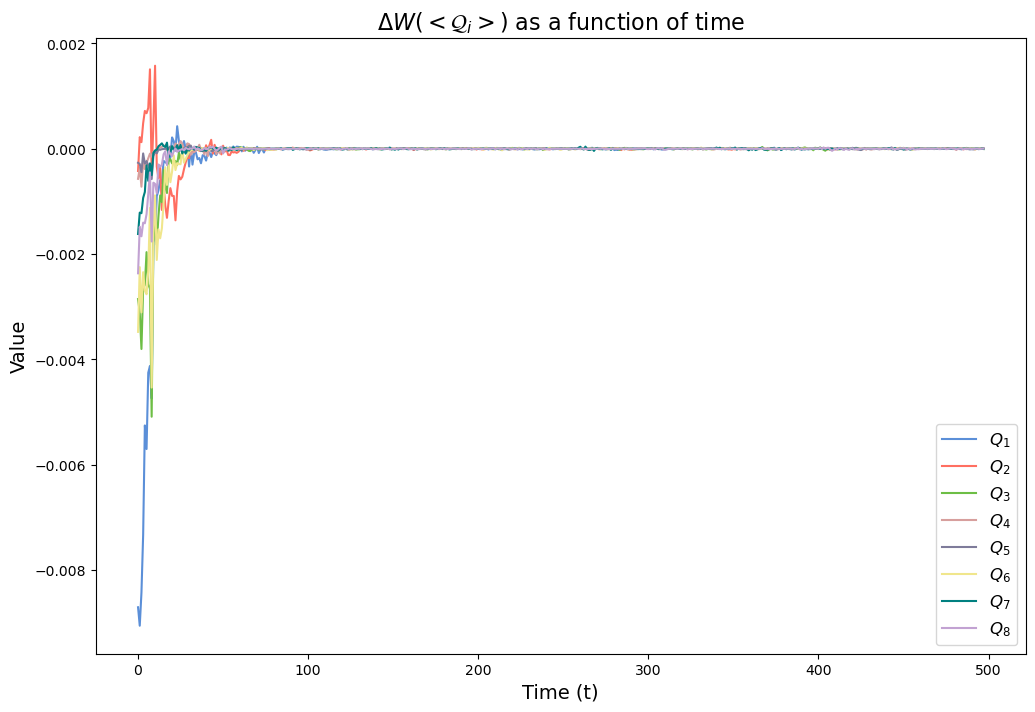

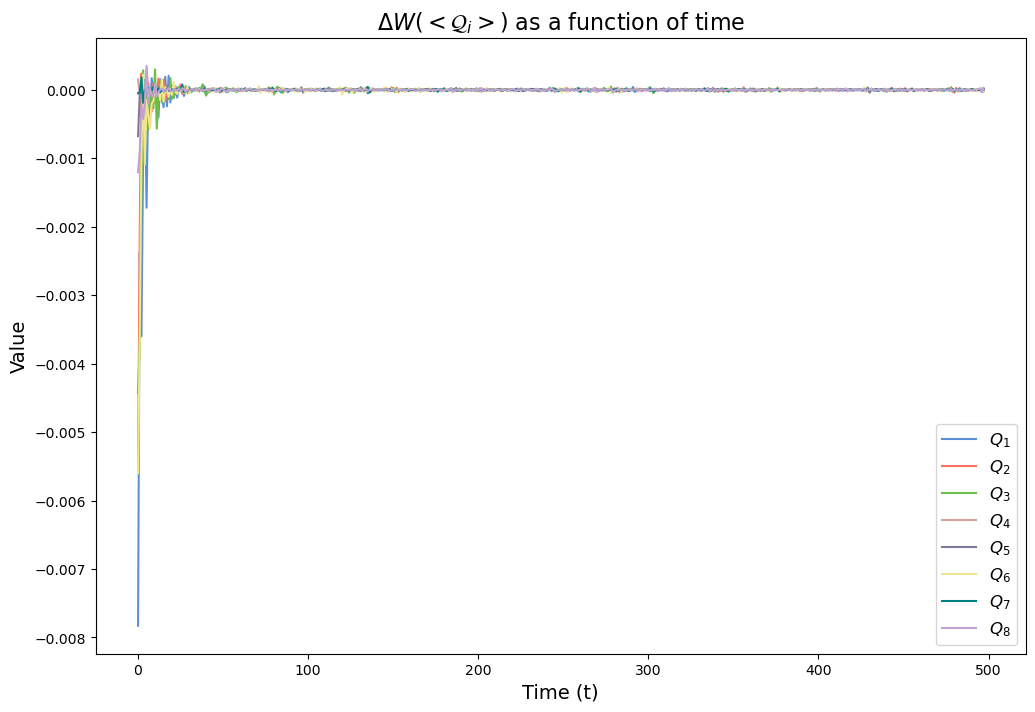

In [119]:
#greedy
# Define a list of colors (you can choose any color names or hex codes)
#for 8Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2']
#for 10 Q
colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF']
#for 12 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C']
#for 14Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C', '#C4BEB5', '#8E7BBA']
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[change_in_ext_work_ens_avg_greedy_c2,change_in_ext_work_ens_avg_greedy_c4,change_in_ext_work_ens_avg_greedy_c5,change_in_ext_work_ens_avg_greedy_c6,change_in_ext_work_ens_avg_greedy_cn]


for data,conn in zip(datas, dataset_names):
    num_time_steps = len(data)-1  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    
    data=np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]
    
    plt.figure(figsize=(12, 8))
    #change this when analyzing pure dataset
    #plt.axhline(y=ytherm10, color='r', linestyle='--', label=f'y = {ytherm10}')

    # Plot each number as a function of t with specified colors
    for i, y_values in enumerate(data_transposed):
        color = colors[i % len(colors)]  # Cycle through the color list
        plt.plot(t, y_values, label=f'$Q_{i+1}$', color=color)
    
    # Add labels and legend
    plt.xlabel('Time (t)',fontsize=14)
    plt.ylabel('Value',fontsize=14)
    plt.title('$\Delta W(<\mathcal{Q}_i >)$ as a function of time',fontsize=16)
    plt.legend(fontsize=12)
    
    # Show the plot
    plt.savefig(f'Change in extractable work of ensemble averaged network {num}q_conn_{conn}_rule_R2_{dataset_label}.pdf', format='pdf', bbox_inches='tight')

    plt.show()

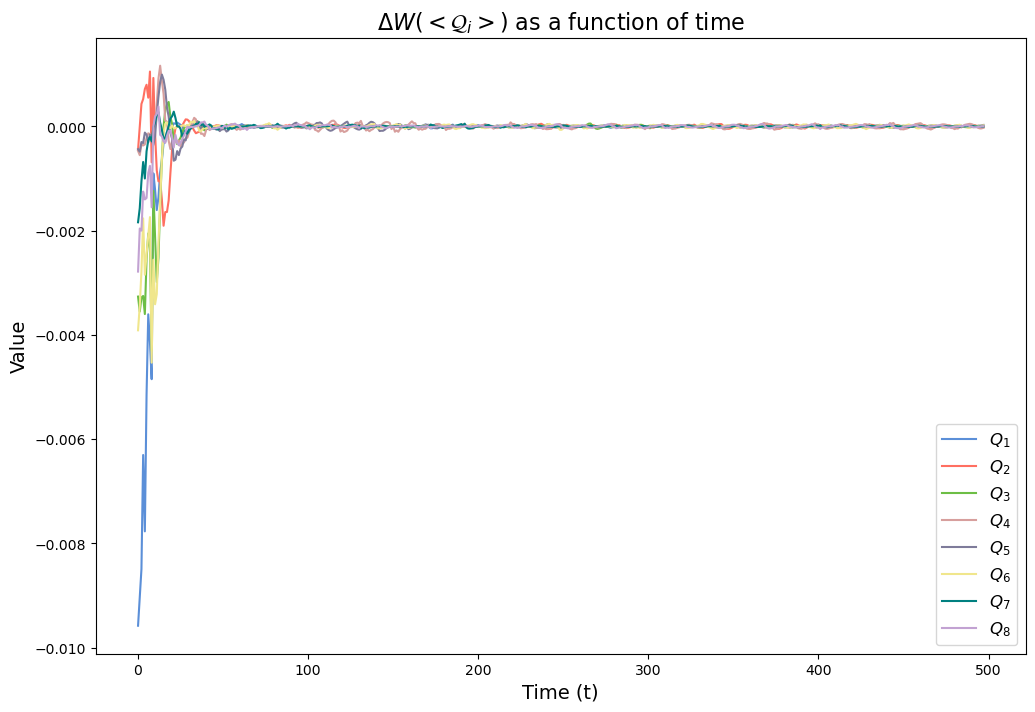

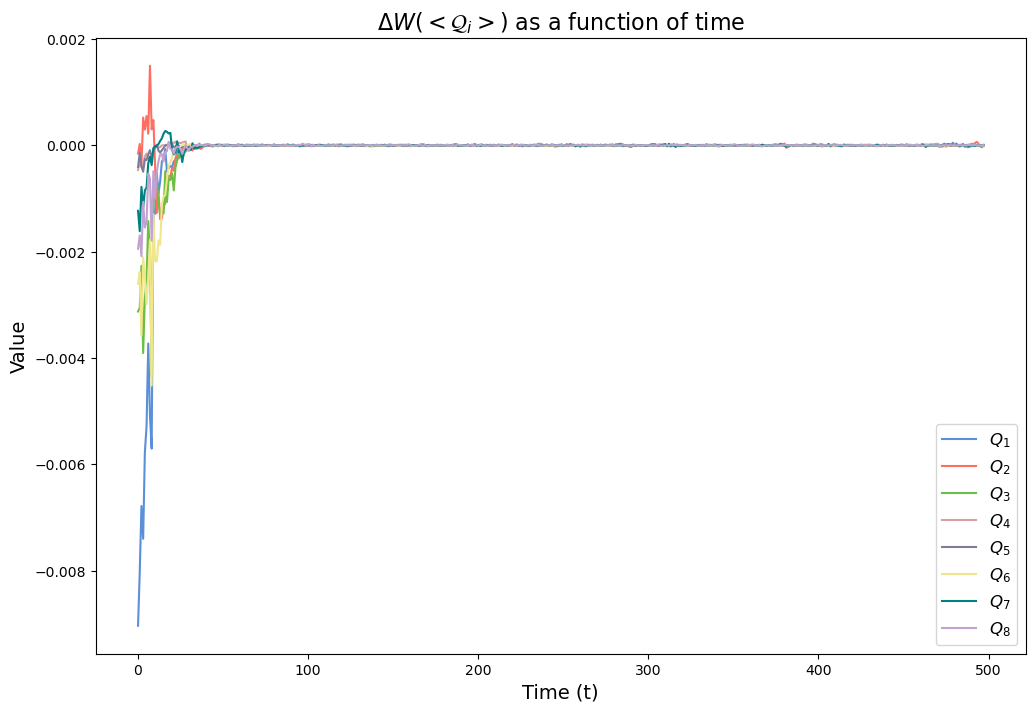

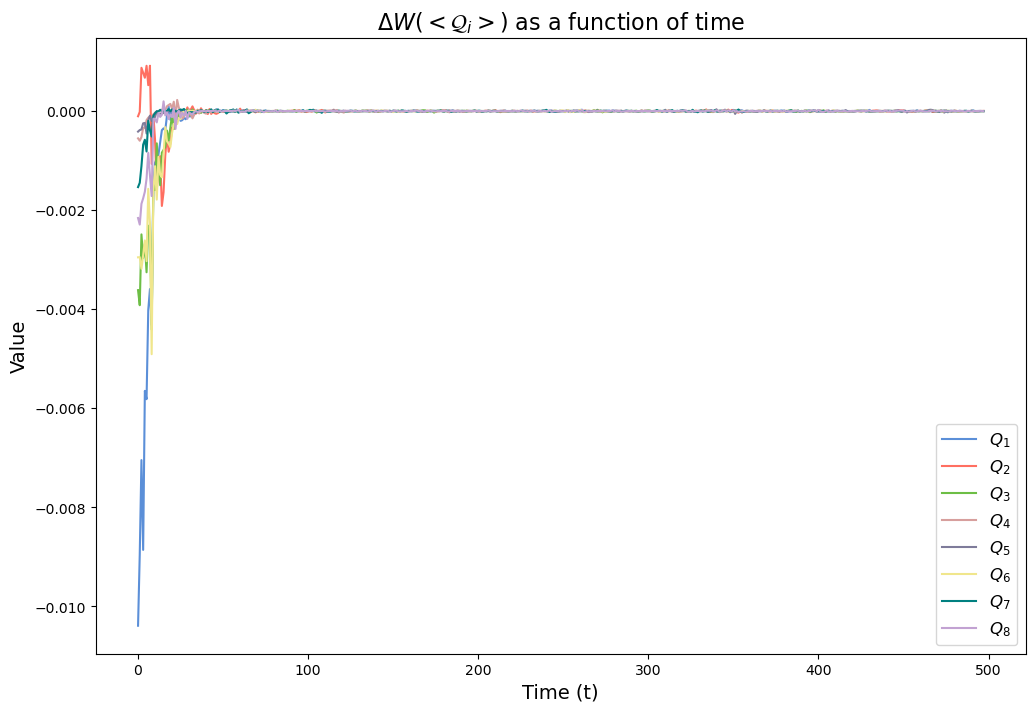

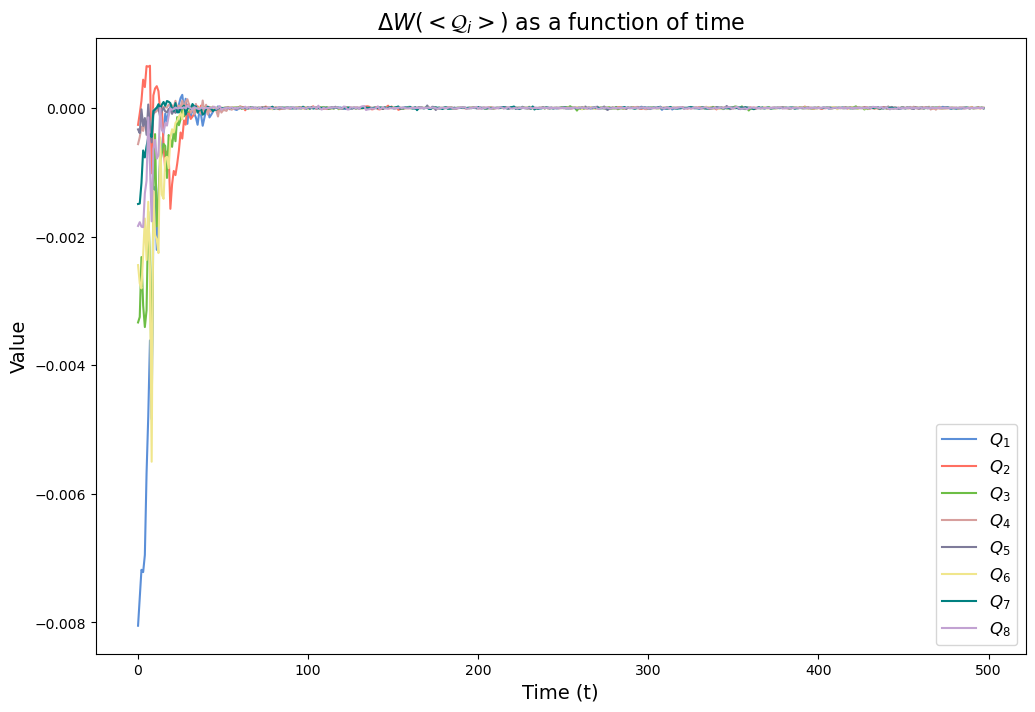

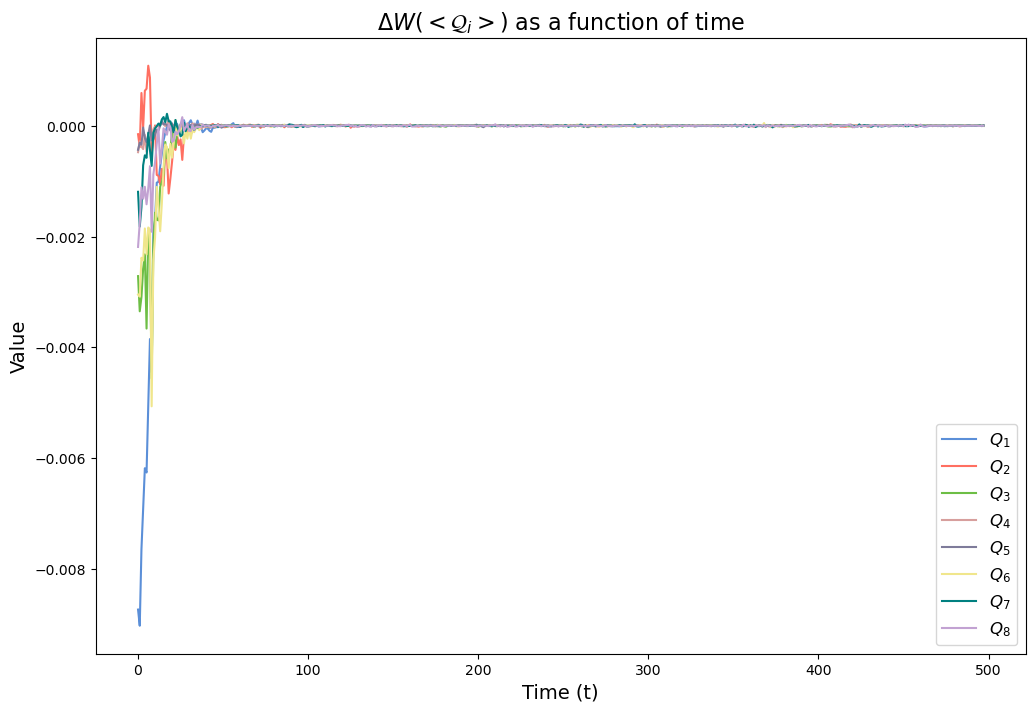

In [120]:
#mimic
# Define a list of colors (you can choose any color names or hex codes)
#for 8Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2']
#for 10 Q
colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF']
#for 12 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C']
#for 14Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C', '#C4BEB5', '#8E7BBA']
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[change_in_ext_work_ens_avg_mimic_c2,change_in_ext_work_ens_avg_mimic_c4,change_in_ext_work_ens_avg_mimic_c5,change_in_ext_work_ens_avg_mimic_c6,change_in_ext_work_ens_avg_mimic_cn]


for data,conn in zip(datas, dataset_names):
    num_time_steps = len(data)-1  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    
    data=np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]
    
    plt.figure(figsize=(12, 8))
    #change this when analyzing pure dataset
    #plt.axhline(y=ytherm10, color='r', linestyle='--', label=f'y = {ytherm10}')

    # Plot each number as a function of t with specified colors
    for i, y_values in enumerate(data_transposed):
        color = colors[i % len(colors)]  # Cycle through the color list
        plt.plot(t, y_values, label=f'$Q_{i+1}$', color=color)
    
    # Add labels and legend
    plt.xlabel('Time (t)',fontsize=14)
    plt.ylabel('Value',fontsize=14)
    plt.title('$\Delta W(<\mathcal{Q}_i >)$ as a function of time',fontsize=16)
    plt.legend(fontsize=12)
    
    # Show the plot
    plt.savefig(f'Change in extractable work of ensemble averaged network {num}q_conn_{conn}_rule_R3_{dataset_label}.pdf', format='pdf', bbox_inches='tight')

    plt.show()

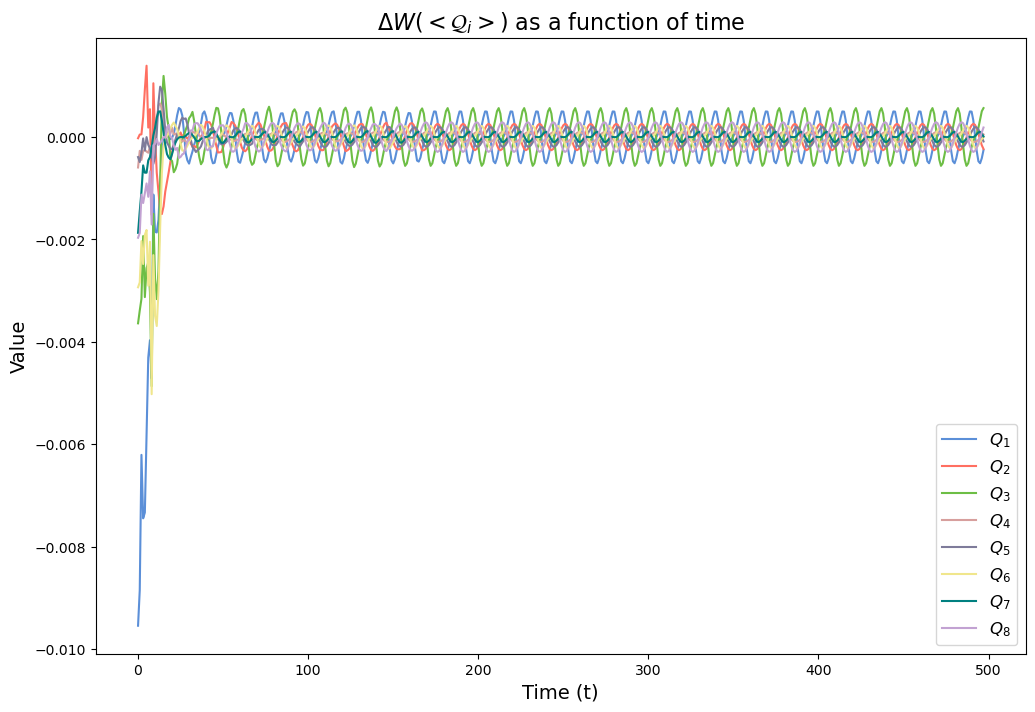

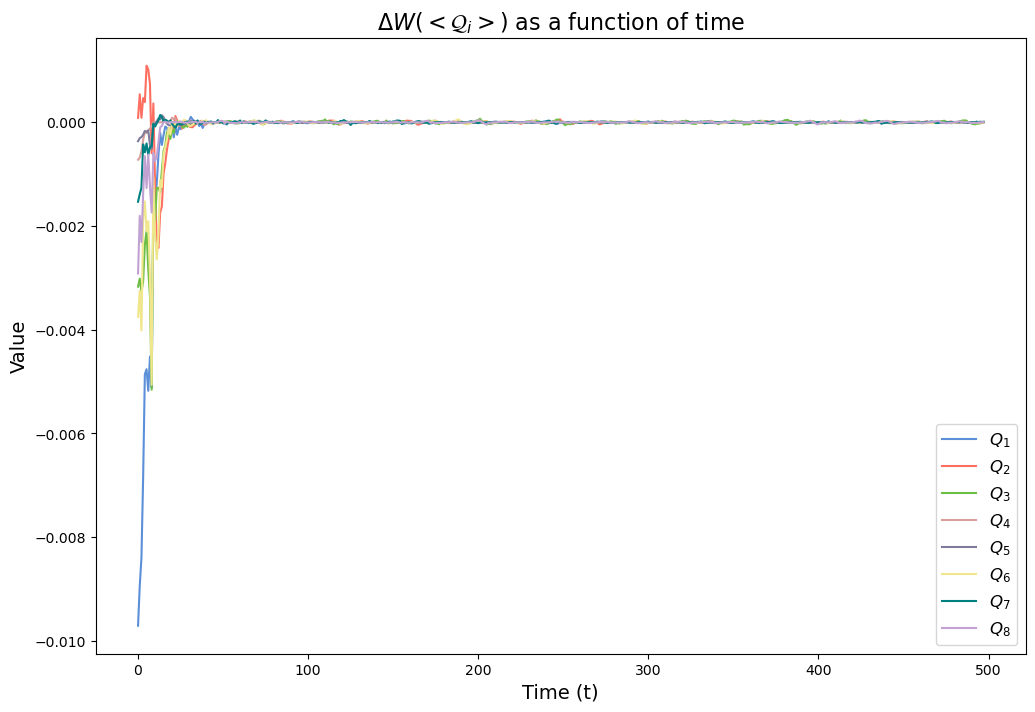

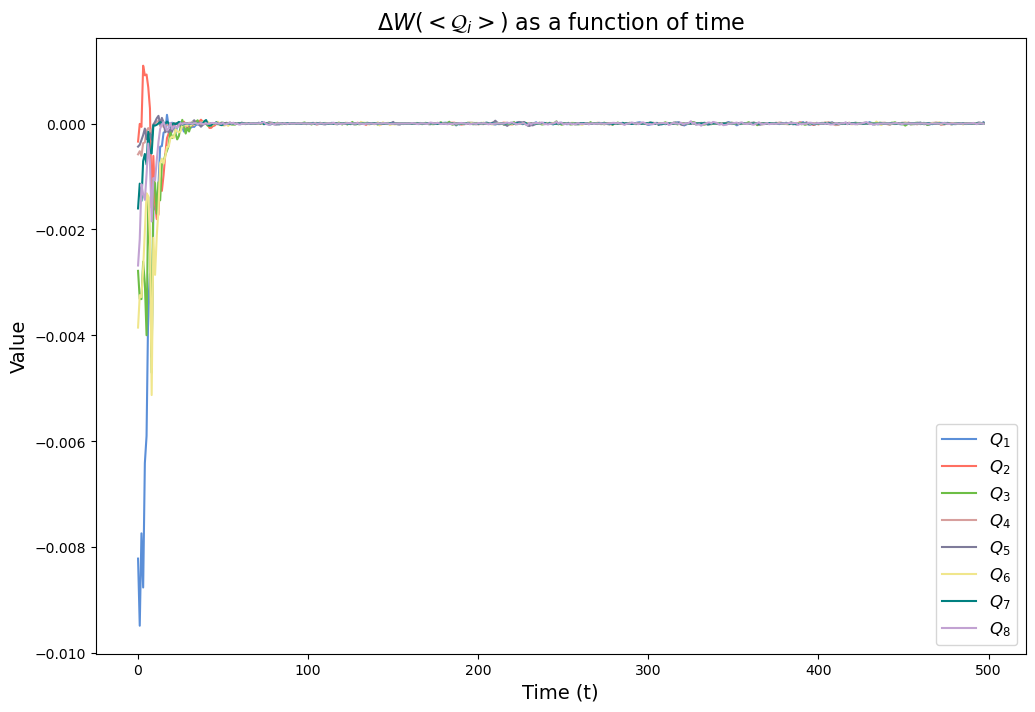

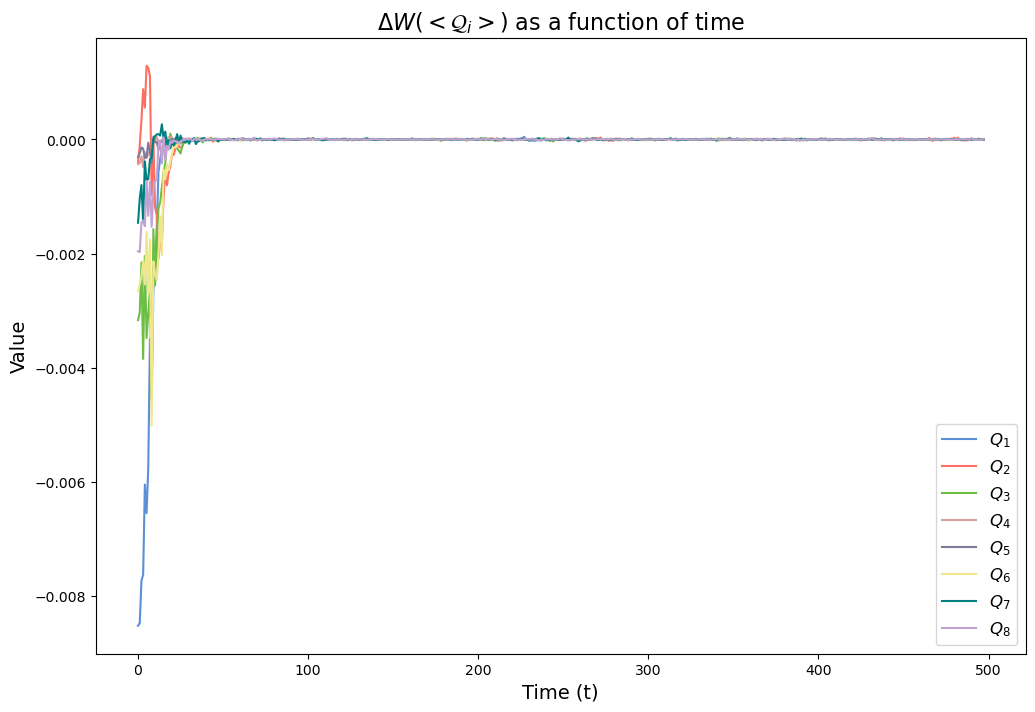

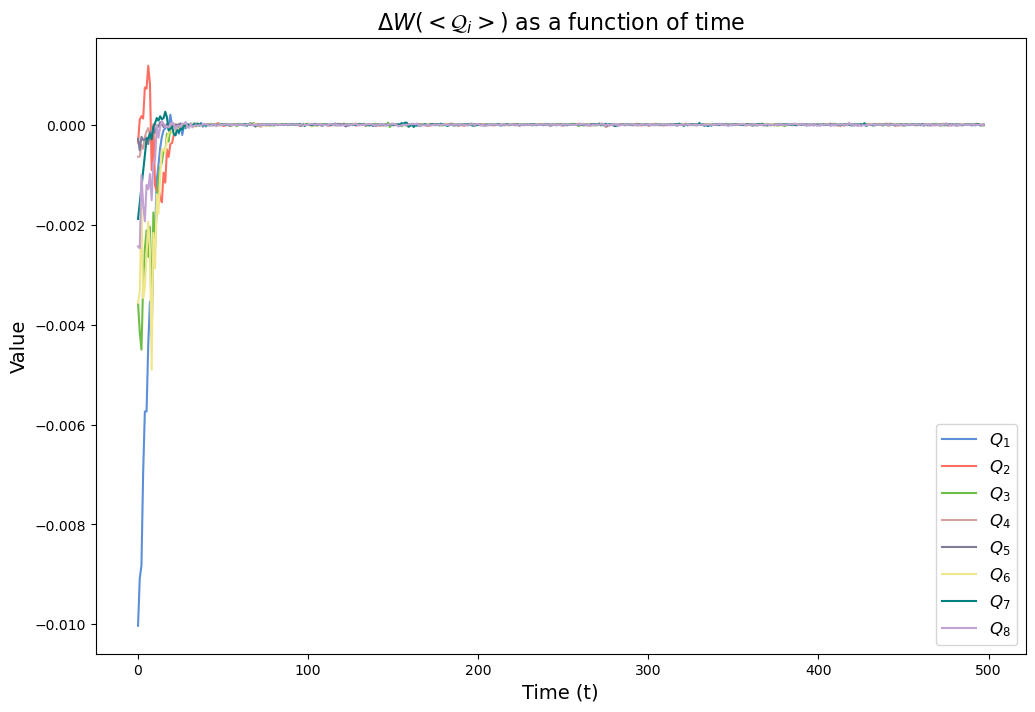

In [121]:
#landmax
# Define a list of colors (you can choose any color names or hex codes)
#for 8Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2']
#for 10 Q
colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF']
#for 12 Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C']
#for 14Q
#colors = ['#5B8FD8', '#FF6F61', '#6DBE45', '#D79F9D', '#7E7B9A','#F0E68C', '#008080', '#C2A2D2', '#D04E00', '#A8E6CF','#FFDAB9', '#B2B09C', '#C4BEB5', '#8E7BBA']
dataset_names = ['c2', 'c4', 'c5', 'c6', 'cn']  # Names corresponding to each dataset
datas=[change_in_ext_work_ens_avg_landscape_maximizes_c2,change_in_ext_work_ens_avg_landscape_maximizes_c4,change_in_ext_work_ens_avg_landscape_maximizes_c5,change_in_ext_work_ens_avg_landscape_maximizes_c6,change_in_ext_work_ens_avg_landscape_maximizes_cn]


for data,conn in zip(datas, dataset_names):
    num_time_steps = len(data)-1  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    
    data=np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]
    
    plt.figure(figsize=(12, 8))
    #change this when analyzing pure dataset
    #plt.axhline(y=ytherm10, color='r', linestyle='--', label=f'y = {ytherm10}')

    # Plot each number as a function of t with specified colors
    for i, y_values in enumerate(data_transposed):
        color = colors[i % len(colors)]  # Cycle through the color list
        plt.plot(t, y_values, label=f'$Q_{i+1}$', color=color)
    
    # Add labels and legend
    plt.xlabel('Time (t)',fontsize=14)
    plt.ylabel('Value',fontsize=14)
    plt.title('$\Delta W(<\mathcal{Q}_i >)$ as a function of time',fontsize=16)
    plt.legend(fontsize=12)
    
    # Show the plot
    plt.savefig(f'Change in extractable work of ensemble averaged network {num}q_conn_{conn}_rule_R4_{dataset_label}.pdf', format='pdf', bbox_inches='tight')

    plt.show()

In [ ]:
#HERE ON EVERYTHIN IS FOR ENSEMBLED AVERAGE NETWORK

In [ ]:
#Length of Delta W >0

In [122]:
#where list of lists is change in ext work for one trial
#index is qubit index
#Gives a list where first element is the total number of positive steps and the second is a list of when/length of the positive change
def count_positive_steps(list_of_lists, index):
    total_positive_steps = 0
    consecutive_positive_steps = 0
    consecutive_lengths = []  # List to store lengths of consecutive positive sequences
    for lst in list_of_lists:
        if lst[index] > 0:
            total_positive_steps += 1
            consecutive_positive_steps += 1
        else:
            consecutive_lengths.append(consecutive_positive_steps)  # Record length of consecutive positive sequence
            consecutive_positive_steps = 0  # Reset consecutive count if value becomes non-positive
            
    # Add the last consecutive count if the list ends with a positive value
    if consecutive_positive_steps > 0:
        consecutive_lengths.append(consecutive_positive_steps)
        
    return total_positive_steps, consecutive_lengths

In [123]:
#examples
count_positive_steps(change_in_ext_work_ens_avg_random_c2, 2)
count_positive_steps(change_in_ext_work_ens_avg_greedy_c2, 2)
count_positive_steps(change_in_ext_work_ens_avg_mimic_c2, 2)
count_positive_steps(change_in_ext_work_ens_avg_landscape_maximizes_c2, 2)

(229,
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  5,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  8,
  0,
  0,
  0,
  0,
  0,
  0,
  8,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,

In [124]:
#returns a dictionary of step length with positive change in extractable work and how many times it occurs
def tally_elements(lst):
    tally = {}
    for element in lst:
        tally[element] = tally.get(element, 0) + 1
    return tally

#Plots histogram using above tally dictionary
def plot_histogram(ax, tally, label):
    elements = list(tally.keys())
    counts = list(tally.values())

    ax.bar(elements, counts)
    ax.set_xlabel('Element')
    ax.set_ylabel('Frequency')
    ax.set_title(label)
    ax.legend(label)

#Get the total number of positive steps per qubit on the network as a list
def Num_steps_positive(change_in_ex_work):
    Num_steps_positive=[]
    for qubit_index in range(8):
        Num_steps_positive.append(count_positive_steps(change_in_ex_work,qubit_index)[0])
    return Num_steps_positive

#Get the list of when positive changes occur per qubit on the network as a list
def list_of_consecutive_positive_steps(change_in_ex_work):
    sum=[0]
    for qubit_id in range(8):
        sum = sum+count_positive_steps(change_in_ex_work,qubit_id)[1]
    return sum

In [125]:
#Gives the average length of interaval for which the qubit has positive change; does for each qubit and returns a list
def average_time_step_Q_positive(num_qubits,changein_Wex):
    average_time_positive = []
    for qubit_index in range(num_qubits):
        average_time_positive.append(np.mean(count_positive_steps(changein_Wex, qubit_index)[1]))
    return average_time_positive
    
#takes in a dictionary
def avg_time_step_positive(tally):
    num=0
    denom=0
    for key,values in tally.items():
        num = values*key+num
        denom=values+denom
    return num/denom

In [128]:
#examples
average_time_step_Q_positive(num,change_in_ext_work_ens_avg_random_c2)
#average_time_step_Q_positive(num,change_in_ext_work_ens_avg_greedy_c2)
#average_time_step_Q_positive(num,change_in_ext_work_ens_avg_mimic_c2)
#average_time_step_Q_positive(num,change_in_ext_work_ens_avg_landscape_maximizes_c2)

[1.036734693877551,
 0.9455252918287937,
 0.8867924528301887,
 0.9083969465648855,
 0.8939393939393939,
 0.94921875,
 0.968503937007874,
 0.8550185873605948]

In [129]:
#get average of the cumulative positive change in extractable work since this is the value you can extract at any point from the landscape as resource
def replace_negatives_with_zero(lst):
    for sublist in lst:
        for i in range(len(sublist)):
            if sublist[i] < 0:
                sublist[i] = 0
    return lst

def replace_consecutive_positives_with_cumulative_sum(list_of_lists):
    lst = [list(column) for column in zip(*list_of_lists)]
    for sublist in lst:
        cumulative_sum = 0
        consecutive_positive_count = 0
        for i in range(len(sublist)):
            if sublist[i] > 0:
                cumulative_sum += sublist[i]
                consecutive_positive_count += 1
                if i == len(sublist) - 1 or sublist[i + 1] == 0:
                    if consecutive_positive_count > 1:
                        for j in range(i - consecutive_positive_count + 1, i + 1):
                            sublist[j] = 0
                        sublist[i] = cumulative_sum
                    cumulative_sum = 0
                    consecutive_positive_count = 0
            else:
                cumulative_sum = 0
                consecutive_positive_count = 0
    return lst

def list_of_consec_positive_steps_no_zeros(change_in):
    listt=[]
    for ele in list_of_consecutive_positive_steps(change_in):
        if ele != 0:
            listt.append(ele)
    return listt

def consecutive_positives_with_cumulative_sum_no_zeores(change_in):
    list2=[]
    for ele in np.array(replace_consecutive_positives_with_cumulative_sum(replace_negatives_with_zero(change_in))).flatten():
        if ele!=0:
            list2.append(ele)
    return list2

In [130]:
#Examples
list_of_consec_positive_steps_no_zeros(change_in_ext_work_ens_avg_random_c2)
list_of_consec_positive_steps_no_zeros(change_in_ext_work_ens_avg_greedy_c2)
list_of_consec_positive_steps_no_zeros(change_in_ext_work_ens_avg_mimic_c2)
list_of_consec_positive_steps_no_zeros(change_in_ext_work_ens_avg_landscape_maximizes_c2)
#More examples
consecutive_positives_with_cumulative_sum_no_zeores(change_in_ext_work_ens_avg_random_c2)
consecutive_positives_with_cumulative_sum_no_zeores(change_in_ext_work_ens_avg_greedy_c2)
consecutive_positives_with_cumulative_sum_no_zeores(change_in_ext_work_ens_avg_mimic_c2)
consecutive_positives_with_cumulative_sum_no_zeores(change_in_ext_work_ens_avg_landscape_maximizes_c2)

[5.3831217003989546e-05,
 0.0023465914450987824,
 0.0019773226962278728,
 0.0020709812391712006,
 0.0020128185731551717,
 0.0019261860300020985,
 0.0020613319078729765,
 0.002075897111140272,
 0.0020655591393189056,
 0.002089728902545836,
 0.0019625824315251173,
 0.0020716979040833754,
 0.002071721025479418,
 0.0020717103064650725,
 0.002071705860760485,
 0.002071724463769545,
 0.0020717350676173513,
 0.0020717326275442997,
 0.0020717540013545374,
 0.0020717492054472967,
 0.002071750763963608,
 0.002071745659118293,
 0.0020717659263307605,
 0.002071781499231796,
 0.0020717631855938384,
 0.002071779302785784,
 0.0020717702713149086,
 0.0020717942526202984,
 0.0020717804034385725,
 0.0020717888664334694,
 0.002071806359788238,
 0.002071806622284369,
 0.0020718109036745045,
 0.0035416817080932694,
 0.0010783079794830421,
 0.00020325163376559013,
 1.0581595991428043e-05,
 0.0014464734276469259,
 0.0013070480579173702,
 0.0012685452094957582,
 0.0014295640981286178,
 0.0012160482352157292,


In [131]:
def average_ex_resource_landscape(change_in_ex_work):
    means=[]
    for qubit in range(8):
        means.append(np.mean(replace_consecutive_positives_with_cumulative_sum(replace_negatives_with_zero(change_in_ex_work))[qubit]))
    return np.mean(means)

def average_cumulative_Wex(num_qubits,changein_Wex):
    average_time_positive = []
    for qubit_index in range(num_qubits):
        average_time_positive.append(np.mean(count_positive_steps(changein_Wex, qubit_index)[1]))
    return average_time_positive
    
def total_wex(num_qubits,changein_Wex):
    total_wex = []
    for qubit_index in range(num_qubits):
        changein_Wex[0:99,qubit_index]
        total_wex.append(sum(changein_Wex[0:99,qubit_index]))
    return total_wex

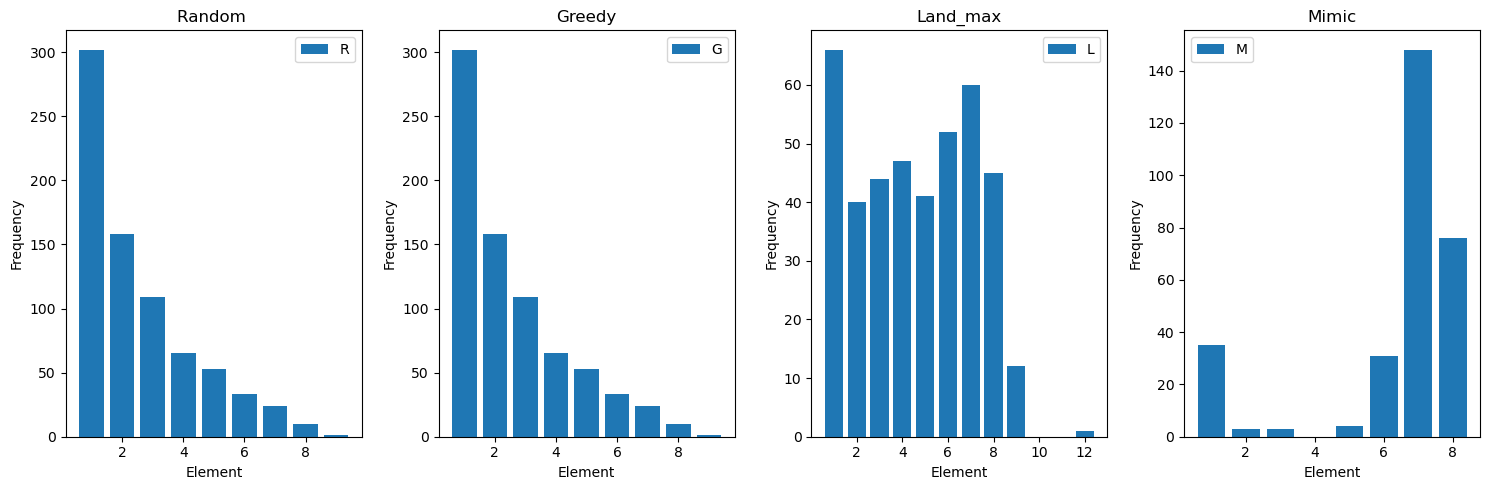

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


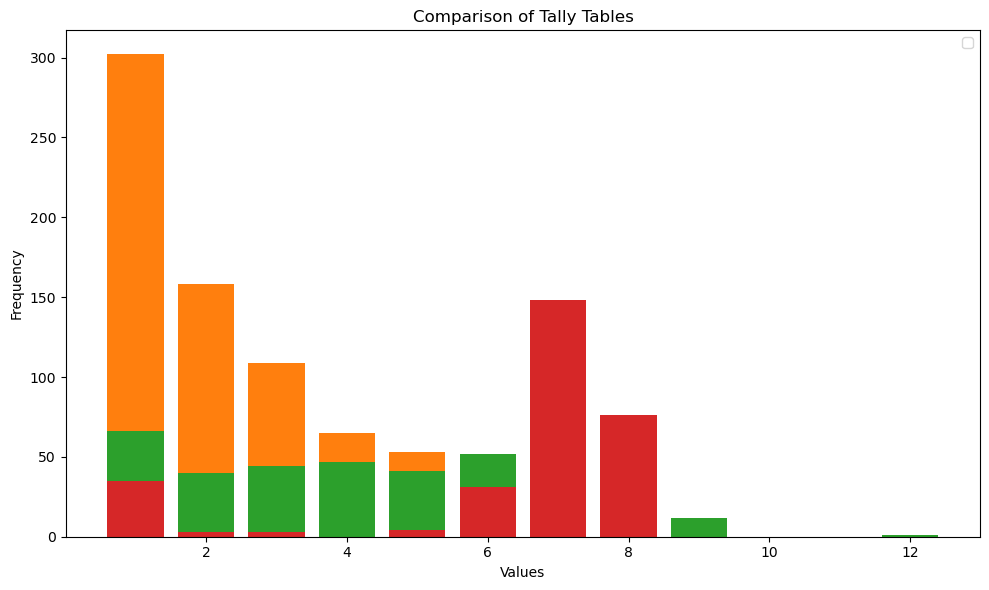

In [133]:
Num_steps_positive_random = Num_steps_positive(change_in_ext_work_ens_avg_random_c2)
Num_steps_positive_greedy = Num_steps_positive(change_in_ext_work_ens_avg_greedy_c2)
Num_steps_positive_mimic = Num_steps_positive(change_in_ext_work_ens_avg_mimic_c2)
Num_steps_positive_landmax = Num_steps_positive(change_in_ext_work_ens_avg_landscape_maximizes_c2)
        
tally_random=tally_elements(list_of_consecutive_positive_steps(change_in_ext_work_ens_avg_random_c2))
tally_greedy=tally_elements(list_of_consecutive_positive_steps(change_in_ext_work_ens_avg_greedy_c2))
tally_landmax=tally_elements(list_of_consecutive_positive_steps(change_in_ext_work_ens_avg_mimic_c2))
tally_mimic=tally_elements(list_of_consecutive_positive_steps(change_in_ext_work_ens_avg_landscape_maximizes_c2))
        
del tally_landmax[0]
del tally_random[0]
del tally_greedy[0]
del tally_mimic[0]
    
        
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
        
plot_histogram(axs[0], tally_random, 'Random ')
plot_histogram(axs[1], tally_greedy, 'Greedy')
plot_histogram(axs[2], tally_landmax, 'Land_max')
plot_histogram(axs[3], tally_mimic, 'Mimic')
        
plt.tight_layout()
#plt.savefig(histogram_freq.png)
plt.show()
        
fig, ax = plt.subplots(figsize=(10, 6))
        
# Call plot_histogram for each dataset with the desired color
plot_histogram(ax, tally_random, 'Random')
plot_histogram(ax, tally_greedy, 'Greedy')
plot_histogram(ax, tally_landmax, 'Land_max')
plot_histogram(ax, tally_mimic, 'Mimic')
        
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Comparison of Tally Tables')
        
# Show legend
plt.legend()
        
plt.tight_layout()
plt.savefig('histogram_freq_temp_var.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


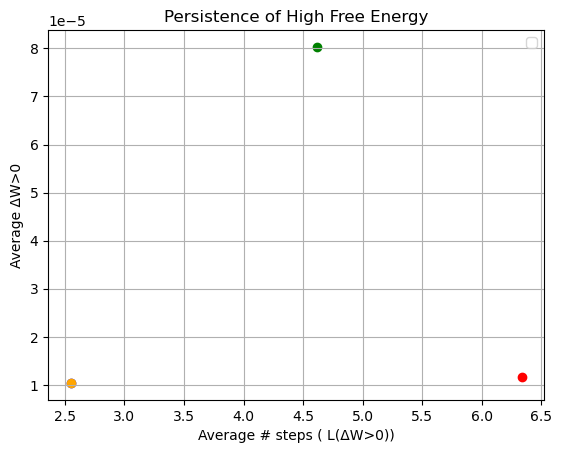

In [137]:
Num_steps_positive_random = Num_steps_positive(change_in_ext_work_ens_avg_random_c2)
Num_steps_positive_greedy = Num_steps_positive(change_in_ext_work_ens_avg_greedy_c2)
Num_steps_positive_mimic = Num_steps_positive(change_in_ext_work_ens_avg_mimic_c2)
Num_steps_positive_landmax = Num_steps_positive(change_in_ext_work_ens_avg_landscape_maximizes_c2)
        
tally_random=tally_elements(list_of_consecutive_positive_steps(change_in_ext_work_ens_avg_random_c2))
tally_greedy=tally_elements(list_of_consecutive_positive_steps(change_in_ext_work_ens_avg_greedy_c2))
tally_landmax=tally_elements(list_of_consecutive_positive_steps(change_in_ext_work_ens_avg_mimic_c2))
tally_mimic=tally_elements(list_of_consecutive_positive_steps(change_in_ext_work_ens_avg_landscape_maximizes_c2))
        
del tally_landmax[0]
del tally_random[0]
del tally_greedy[0]
del tally_mimic[0]
        
[avg_time_step_positive(tally_random),avg_time_step_positive(tally_greedy),avg_time_step_positive(tally_mimic),avg_time_step_positive(tally_landmax)]
        
pairs = [(avg_time_step_positive(tally_random), average_ex_resource_landscape(change_in_ext_work_ens_avg_random_c2),'blue'),(avg_time_step_positive(tally_greedy), average_ex_resource_landscape(change_in_ext_work_ens_avg_greedy_c2),'orange'),(avg_time_step_positive(tally_landmax), average_ex_resource_landscape(change_in_ext_work_ens_avg_landscape_maximizes_c2),'green'),(avg_time_step_positive(tally_mimic), average_ex_resource_landscape(change_in_ext_work_ens_avg_mimic_c2),'red')]
                    
for pair in pairs:
    plt.scatter(pair[0], pair[1], color=pair[2])
        
plt.xlabel('Average # steps ( L(ΔW>0))')
plt.ylabel('Average ΔW>0')
plt.title('Persistence of High Free Energy')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#example
count_positive_steps(change_in_ex_work_random[0][0:99],0)

In [138]:
def plot_cumulative_change_in_Wex(change_in_ex_work_list1,change_in_ex_work_list2,change_in_ex_work_list3,filename="plot.png"):# Calculate cumulative sum
    
    cumulative_sum1 = np.cumsum(change_in_ex_work_list1)
    cumulative_sum2 = np.cumsum(change_in_ex_work_list2)
    cumulative_sum3 = np.cumsum(change_in_ex_work_list3)


    # Set the figure size (adjust as needed)
    plt.figure(figsize=(15, 6))  # Width: 10 inches, Height: 6 inches
    
    # Plot cumulative sum as a function of step index
    plt.plot(range(1, 100), cumulative_sum1, marker='o', linestyle='-')
    plt.plot(range(1, 100), cumulative_sum2, marker='o', linestyle='-')
    plt.plot(range(1, 100), cumulative_sum3, marker='o', linestyle='-')

    
    # Add labels and title
    plt.xlabel('Step Index')
    plt.ylabel('Cumulative Sum')
    plt.title('Cumulative Sum as a Function of Step Index')

    plt.savefig(filename)
    # Show plot
    plt.grid(True)
    plt.show()

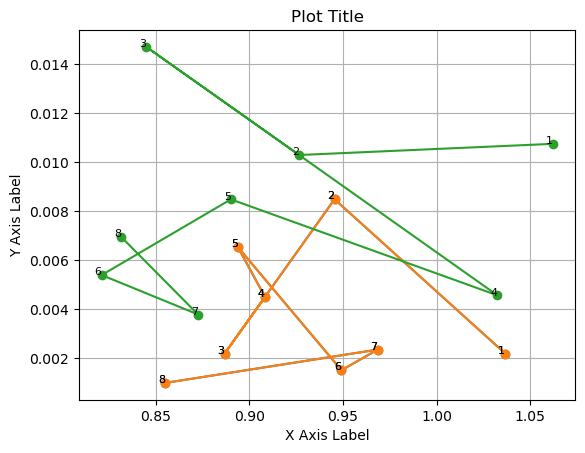

In [139]:
pairs_of_lists = [(average_time_step_Q_positive(8,change_in_ext_work_ens_avg_random_c2), total_wex(8,change_in_ext_work_ens_avg_random_c2)),(average_time_step_Q_positive(8,change_in_ext_work_ens_avg_greedy_c2), total_wex(8,change_in_ext_work_ens_avg_greedy_c2)),(average_time_step_Q_positive(8,change_in_ext_work_ens_avg_landscape_maximizes_c2), total_wex(8,change_in_ext_work_ens_avg_landscape_maximizes_c2))]
            
for x_values, y_values in pairs_of_lists:
    plt.plot(x_values, y_values, marker='o', linestyle='-')
    for i, (x, y) in enumerate(zip(x_values, y_values), 1):  # Start index from 1
        plt.text(x, y, f'{i}', fontsize=8, ha='right')

# Add labels and title
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Plot Title')

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
def moving_average(data, window_size=10):
    """
    Function to calculate the moving average of a given data array.
    
    Parameters:
    - data: The input data array.
    - window_size: The size of the moving average window.
    
    Returns:
    - moving_avg: The moving average array.
    """
    moving_avg = np.convolve(data, np.ones(window_size) / window_size, mode='valid')
    return moving_avg

def plot_four_stats_as_function_of_time(list1, list2, list3,list4, filename='plot.png',title='plotname'):
    # Assuming both lists have the same length (representing time steps)
    time_steps = range(1, len(list1) + 1)
    
    # Calculate moving averages for both lists
    moving_avg_list1 = moving_average(list1)
    moving_avg_list2 = moving_average(list2)
    moving_avg_list3 = moving_average(list3)
    moving_avg_list4 = moving_average(list4)
    
    # Set the figure size (adjust as needed)
    plt.figure(figsize=(15, 6))  # Width: 10 inches, Height: 6 inches
    
    # Plotting the lists and their moving averages
    plt.plot(time_steps, list1, color='blue', label='Random')
    plt.plot(time_steps, list2,color='orange', label='Greedy')
    plt.plot(time_steps, list3, color='red',label='Mimic')
    plt.plot(time_steps, list4, color='green',label='Landmax')
    plt.plot(time_steps[len(list1) - len(moving_avg_list1):], moving_avg_list1, linestyle='--', color='blue', label='Moving Average (Random)')
    plt.plot(time_steps[len(list2) - len(moving_avg_list2):], moving_avg_list2, linestyle='--', color='orange', label='Moving Average (Greedy)')
    plt.plot(time_steps[len(list3) - len(moving_avg_list3):], moving_avg_list3, linestyle='--', color='red', label='Moving Average (Mimic)')
    plt.plot(time_steps[len(list4) - len(moving_avg_list4):], moving_avg_list4, linestyle='--', color='green', label='Moving Average (Landmax)')    
    
    # Adding labels and title
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.title(title)
    
    # Adding legend
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
    
    # Display the plot
    plt.grid(True)
    
    # Save the plot with the desired filename
    #plt.savefig(filename)
    
    # Show the plot (optional)
    plt.show()